# Idea

Basically, I'd like to do some simple tests on "how can we establish the efficacy of our period-finding method?". I think it would be effective to do two simple things for now:

1. Try lots of different amplitudes (at a given frequency) and see how low we have to go before the period isn't readily identifiable
2. Try lots of different periods (at a given amplitude) and see what frequencies are recoverable and what aren't.

Then, eventually, we'll want to do a grid to see if these two things depend on each other. We'll also want to investigate the effects of "survey" (WSERV5 vs 7 vs 8), spatial location (esp. which footprint), and source brightness / photometric noise.

In [1]:
# for a simple object, let's load its data, inject signals, and see what happens.

In [1]:
# imports

from datetime import datetime, timedelta

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from astropy.timeseries import LombScargle

plt.style.use('seaborn-whitegrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
%run ../period_recovery.py

In [4]:
# WSERV7 is NGC 1333
wserv = 5

from wuvars.data import spreadsheet, photometry
from wuvars.analysis.variability_selection import sq0, sq1, sq2

dat = photometry.group_wserv_v2(photometry.load_wserv_v2(wserv))
spread = spreadsheet.load_wserv_v2(wserv)

# wserv_ids = [5, 7, 8, 11]
# n_min_list = [35, 80, 55, 65]
# n_max_list = [90, 160, 80, 100]

n_min = 35
n_max = 90

# min_Stetson_list = [3, 1.6, 1.6, 4]

# SFR_names = ["Orion Nebula Cluster", "NGC 1333", "IC 348", "Mon R2"]
# SFR_dict = {x: y for x, y in zip(wserv_ids, SFR_names)}

q0 = sq0(spread, n_min, n_max)
q1 = sq1(spread, n_min, n_max)
q2 = sq2(spread, n_min, n_max)

Loading WSERV5 photometry data... DONE (elapsed time: 0.24s)


In [5]:
q2_bright = (spread[q2]['mean']['KAPERMAG3'] < 15)
q2_bright_spread = spread[q2][q2_bright]

q2_bright_nonvariable  = (spread[q2]['mean']['KAPERMAG3'] < 15) & (spread[q2]['variability']['Stetson_JHK'] < 0.8) & (spread[q2]['variability']['Stetson_JHK'] > 0.0)
q2_bright_nonvariable_spread = spread[q2][q2_bright_nonvariable]


In [6]:
all_sids = np.unique(q2_bright_spread.index)

all_nonvariable_sids = np.unique(q2_bright_nonvariable_spread.index)

sids = np.random.choice(all_nonvariable_sids, 40)
print(sids)

[44199508535318 44199508514961 44199508545232 44199508525606
 44199508506919 44199508576489 44199508485015 44199508534786
 44199508477252 44199508536151 44199508483650 44199508536270
 44199508520789 44199508520259 44199508511980 44199508471085
 44199508574025 44199508470434 44199508461370 44199508461804
 44199508554542 44199508504985 44199508503493 44199508526040
 44199508474863 44199508536538 44199508537382 44199508514767
 44199508564925 44199508520650 44199508524726 44199508486676
 44199508496794 44199508507062 44199508512242 44199508487945
 44199508536109 44199508527106 44199508469732 44199508574612]


In [7]:
from datetime import datetime

periods6 = [1/23, 1/17, 1/11, 0.1, 1/7, 0.25, 0.307, 0.35, 0.407, 0.45, 0.507, 0.607, 0.707, 0.807, 0.907, 1.0, 1.107, 1.207, 1.3507, 1.5, 1.707, 2, 2.1, 2.207, 2.5, 3.07, 5.07]
amplitudes6 = [0.001, 0.003, 0.005, 0.0075, 0.01, 0.015, 0.02, 0.025, 0.03]

In [8]:
X, Y = np.meshgrid(periods6, amplitudes6)

[]

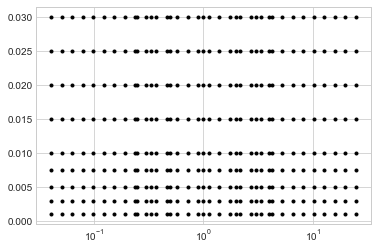

In [9]:
periods7 = np.logspace(np.log10(1/24.5), np.log10(24.5), 30)

extra_periods = (1/4, 1/3, 1/2, 1, 2, 3, 4)

periods7_append_sorted = np.sort(np.append(periods7, np.array(extra_periods)))

X7, Y7 = np.meshgrid(periods7_append_sorted, amplitudes6)

plt.plot(X7, Y7, 'k.')
plt.semilogx()

In [10]:
periods_denser_raw = np.logspace(np.log10(1/24.5), np.log10(24.5), 60)
extra_periods = (1/4, 1/3, 1/2, 1, 2, 3, 4)
periods_denser = np.sort(np.append(periods_denser_raw, np.array(extra_periods)))

amplitudes_denser = [0.001, 0.003, 0.005, 0.0075, 0.0085, 0.01, 0.0125, 0.015, 0.0175, 0.02, 0.025, 0.03]

In [11]:
print(periods_denser)

[ 0.04081633  0.04549088  0.05070078  0.05650736  0.06297895  0.07019171
  0.07823051  0.08718997  0.09717553  0.1083047   0.12070845  0.13453276
  0.14994032  0.16711245  0.18625124  0.20758193  0.23135555  0.25
  0.25785188  0.28738274  0.32029566  0.33333333  0.35697798  0.3978614
  0.44342705  0.49421117  0.5         0.55081142  0.61389389  0.68420097
  0.76256007  0.84989336  0.94722862  1.          1.05571134  1.1766182
  1.3113721   1.46155888  1.62894601  1.8155034   2.          2.02342654
  2.25516238  2.5134381   2.80129322  3.          3.12211536  3.47968011
  3.87819549  4.          4.32235141  4.81737493  5.36909173  5.98399469
  6.6693203   7.43313381  8.28442417  9.23320978 10.29065642 11.46920867
 12.7827363  14.24669759 15.87832114 17.69680874 19.72356124 21.98243049
 24.5       ]


In [14]:
startTime = datetime.now()
print(f"Starting at: {startTime}")
evals_per_sec = 02.14/4
expected_evals = len(sids) * len(periods_denser) * len(amplitudes_denser)
expected_runtime_secs = expected_evals*evals_per_sec
expected_runtime = timedelta(seconds=expected_runtime_secs)
expected_complete_time = startTime + expected_runtime

print(f"About to run {expected_evals} evals")
print(f"Estimated time: {expected_runtime}")
print(f"Estimated completion at: {expected_complete_time.strftime(format='%d/%m/%Y %H:%M:%S')}")

output_denser = recovery_score(dat, sids, periods_denser, amplitudes_denser)

print(f"elapsed time: ", datetime.now() - startTime)


Starting at: 2021-10-10 11:38:21.640027
About to run 32160 evals
Estimated time: 4:46:45.600000
Estimated completion at: 10/10/2021 16:25:07
A=0.00 mag. Incorrect period: 0.11 v. 0.04
A=0.00 mag. Aliased period: 0.0438 v. 0.0408
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.00 mag. Incorrect period: 0.12 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.00 mag. Incorrect period: 0.10 v. 0.04
A=0.00 mag. Incorrect period: 0.99 v. 0.04
A=0.00 mag. Incorrect period: 0.09 v. 0.04
A=0.00 mag. Incorrect period: 1.00 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.00 mag. Incorrect period: 0.10 v. 0.04
A=0.00 mag. Incorrect period: 0.06 v. 0.04
A=0.00 mag. Incorrect period: 0.21 v. 0.04
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.00 mag. Incorrect period: 0.33 v. 0.04
A=0.00 mag. Incorrect period: 1.00 v. 0.04
A=0.00 mag. Aliased period: 0.0438 v. 0.0408
A=0.00 mag. Incorrect period: 0.05 v. 0.04
A=0.00 mag. Incorrect period: 0.07 v. 0.04
A=0.00 mag. Incorrect period: 1.00 v. 

A=0.01 mag. Aliased period: 0.0426 v. 0.0408
A=0.01 mag. Incorrect period: 0.08 v. 0.04
A=0.01 mag. Aliased period: 0.0426 v. 0.0408
A=0.01 mag. Aliased period: 0.0426 v. 0.0408
A=0.01 mag. Incorrect period: 0.07 v. 0.04
A=0.01 mag. Aliased period: 0.0451 v. 0.0408
A=0.01 mag. Aliased period: 0.0426 v. 0.0408
A=0.01 mag. Aliased period: 0.0426 v. 0.0408
A=0.01 mag. Incorrect period: 0.15 v. 0.04
A=0.01 mag. Incorrect period: 0.23 v. 0.04
A=0.01 mag. Aliased period: 0.0424 v. 0.0408
A=0.01 mag. Incorrect period: 0.05 v. 0.04
A=0.01 mag. Incorrect period: 0.11 v. 0.04
A=0.01 mag. Incorrect period: 1.00 v. 0.04
A=0.01 mag. Aliased period: 0.0426 v. 0.0408
A=0.01 mag. Aliased period: 0.0426 v. 0.0408
A=0.01 mag. Aliased period: 0.0426 v. 0.0408
A=0.01 mag. Aliased period: 0.0426 v. 0.0408
A=0.01 mag. Aliased period: 0.0426 v. 0.0408
A=0.01 mag. Aliased period: 0.0426 v. 0.0408
A=0.01 mag. Incorrect period: 1.00 v. 0.04
A=0.01 mag. Aliased period: 0.0426 v. 0.0408
A=0.01 mag. Incorrect peri

A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag. Aliased period: 0.0426 v. 0.0408
A=0.02 mag

A=0.00 mag. Incorrect period: 0.11 v. 0.05
A=0.00 mag. Incorrect period: 0.39 v. 0.05
A=0.00 mag. Incorrect period: 0.05 v. 0.05
A=0.00 mag. Incorrect period: 0.15 v. 0.05
A=0.00 mag. Incorrect period: 0.10 v. 0.05
A=0.01 mag. Incorrect period: 0.11 v. 0.05
A=0.01 mag. Aliased period: 0.0438 v. 0.0455
A=0.01 mag. Incorrect period: 0.50 v. 0.05
A=0.01 mag. Aliased period: 0.0498 v. 0.0455
A=0.01 mag. Incorrect period: 0.75 v. 0.05
A=0.01 mag. Incorrect period: 0.10 v. 0.05
A=0.01 mag. Incorrect period: 0.99 v. 0.05
A=0.01 mag. Aliased period: 0.0432 v. 0.0455
A=0.01 mag. Incorrect period: 1.00 v. 0.05
A=0.01 mag. Incorrect period: 0.05 v. 0.05
A=0.01 mag. Aliased period: 0.0501 v. 0.0455
A=0.01 mag. Incorrect period: 0.12 v. 0.05
A=0.01 mag. Incorrect period: 0.09 v. 0.05
A=0.01 mag. Aliased period: 0.0481 v. 0.0455
A=0.01 mag. Incorrect period: 0.33 v. 0.05
A=0.01 mag. Incorrect period: 0.25 v. 0.05
A=0.01 mag. Incorrect period: 0.05 v. 0.05
A=0.01 mag. Aliased period: 0.0419 v. 0.0455

A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Aliased period: 0.0477 v. 0.0455
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Aliased period: 0.0435 v. 0.0455
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Aliased period: 0.0477 v. 0.0455
A=0.01 mag. Aliased period: 0.0477 v. 0.0455
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Aliased period: 0.0435 v. 0.0455
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Aliased period: 0.0477 v. 0.0455
A=0.01 mag. Aliased period: 0.0477 v. 0.0455
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Correct period: 0

A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.03 mag. Correct period: 0.05 v. 0.05
A=0.00 mag. Incorrect period: 0.11 v. 0.05
A=0.00 mag. Incorrect period: 0.04 v. 0.05
A=0.00 mag. Incorrect period: 0.05 v. 0.05
A=0.00 mag. Incorrect period: 0.12 v. 0.05
A=0.00 mag. Aliased period: 0.0477 v. 0.0507
A=0.00 mag. Aliased period: 0.1030 v. 0.0507
A=0.00 mag. Incorrect period: 0.99 v. 0.0

A=0.01 mag. Incorrect period: 7.56 v. 0.05
A=0.01 mag. Aliased period: 0.0482 v. 0.0507
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Incorrect period: 0.05 v. 0.05
A=0.01 mag. Incorrect period: 0.09 v. 0.05
A=0.01 mag. Incorrect period: 1.00 v. 0.05
A=0.01 mag. Incorrect period: 0.50 v. 0.05
A=0.01 mag. Incorrect period: 0.16 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Incorrect period: 1.00 v. 0.05
A=0.01 mag. Incorrect period: 1.00 v. 0.05
A=0.01 mag. Incorrect period: 0.50 v. 0.05
A=0.01 mag. Aliased period: 0.0482 v. 0.0507
A=0.01 mag. Aliased period: 0.0482 v. 0.0507
A=0.01 mag. Aliased period: 0.0564 v. 0.0507
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Incorrect period: 0.50 v. 0.05
A=0.01 mag. Incorrect period: 0.21 v. 0.05
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Aliased period: 0.0534 v. 0.0507
A=0.01 mag. Aliased period: 0.0534 v. 0.0507
A=0.01 mag. Correct period: 0.05 v. 0.05
A=0.01 mag. Incorrect period: 0.08 v. 0.05
A=0.01 ma

A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Aliased period: 0.0482 v. 0.0507
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Aliased period: 0.0534 v. 0.0507
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Aliased period: 0.0482 v. 0.0507
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Aliased period: 0.0534 v. 0.0507
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05
A=0.02 mag. Correct period: 0.05 v. 0.05


A=0.01 mag. Incorrect period: 0.06 v. 0.06
A=0.01 mag. Incorrect period: 0.08 v. 0.06
A=0.01 mag. Incorrect period: 1.00 v. 0.06
A=0.01 mag. Incorrect period: 0.06 v. 0.06
A=0.01 mag. Incorrect period: 1.00 v. 0.06
A=0.01 mag. Incorrect period: 0.52 v. 0.06
A=0.01 mag. Incorrect period: 0.04 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Aliased period: 0.0590 v. 0.0565
A=0.01 mag. Incorrect period: 0.05 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Incorrect period: 0.04 v. 0.06
A=0.01 mag. Incorrect period: 0.04 v. 0.06
A=0.01 mag. Incorrect period: 0.04 v. 0.06
A=0.01 mag. Incorrect period: 0.04 v. 0.06
A=0.01 mag. Incorrect period: 1.00 v. 0.06
A=0.01 mag. Incorrect period: 1.00 v. 0.06
A=0.01 mag. Incorrect period: 0.08 v. 0.06
A=0.01 mag. Incorrect period: 1.00 v. 0.06
A=0.01 mag. Incorrect period: 1.00 v. 0.06
A=0.01 mag. Incorrect period: 1.00 v. 0.06
A=0.01 mag. Incorrect period: 0.50 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Inc

A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Aliased period: 0.0599 v. 0.0565
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Aliased period: 0.0535 v. 0.0565
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Aliased period: 0.0535 v. 0.0565
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Aliased period: 0.0599 v. 0.0565
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06


A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.00 mag. Incorrect period: 0.10 v. 0.06
A=0.00 mag. Incorrect period: 0.04 v. 0.06
A=0.00 mag. Incorrect period: 0.05 v. 0.06
A=0.00 mag. Incorrect period: 0.12 v. 0.06
A=0.00 mag. Incorrect period: 0.05 v. 0.06
A=0.00 mag. Incorrect period: 0.10 v. 0.06
A=0.00 mag. Incorrect period: 0.99 v. 0.06
A=0.00 mag. Incorrect period: 0.09 v. 0.06
A=0.00 mag. Incorrect period: 1.00 v. 0.06
A=0.00 mag. Incorrect period: 0.05 v. 0.06
A=0.00 mag. Incorrect period: 0.09 v. 0.06
A=0.00 mag. Aliased period: 0.0591 v. 0.0630
A=0.00 mag. Incorrect period: 0.21 v. 0.06
A=0.00 mag. Incorrect period: 0.05 v. 0.06
A=0.00 mag. Incorrect period: 0.33 v. 0.06
A=0.00 mag. Incorrect period: 0.33 v. 0.06
A=0.00 mag. Incorrect period: 0.05 v. 0.06
A=0.00 mag. Aliased period: 0.0548 v. 0.0630
A=0.00 mag. Incorrect period: 0.04 v. 0.06
A=0.00 mag. Inc

A=0.01 mag. Incorrect period: 0.08 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Incorrect period: 0.26 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Aliased period: 0.0672 v. 0.0630
A=0.01 mag. Incorrect period: 0.04 v. 0.06
A=0.01 mag. Aliased period: 0.0672 v. 0.0630
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Aliased period: 0.0672 v. 0.0630
A=0.01 mag. Aliased period: 0.0672 v. 0.0630
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Incorrect period: 0.05 v. 0.06
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Aliased period: 0.0721 v. 0.0630
A=0.01 mag. Correct period: 0.06 v. 0.06
A=0.01 mag. Aliased period: 0.0672 v. 0.0630
A=0.01 mag. Incorrect period: 0.05 v. 0.06
A=0.01 mag. Aliased per

A=0.02 mag. Correct period: 0.06 v. 0.06
A=0.02 mag. Correct period: 0.06 v. 0.06
A=0.02 mag. Correct period: 0.06 v. 0.06
A=0.02 mag. Correct period: 0.06 v. 0.06
A=0.02 mag. Correct period: 0.06 v. 0.06
A=0.02 mag. Correct period: 0.06 v. 0.06
A=0.02 mag. Correct period: 0.06 v. 0.06
A=0.02 mag. Correct period: 0.06 v. 0.06
A=0.02 mag. Correct period: 0.06 v. 0.06
A=0.02 mag. Correct period: 0.06 v. 0.06
A=0.02 mag. Correct period: 0.06 v. 0.06
A=0.02 mag. Correct period: 0.06 v. 0.06
A=0.02 mag. Correct period: 0.06 v. 0.06
A=0.02 mag. Correct period: 0.06 v. 0.06
A=0.02 mag. Correct period: 0.06 v. 0.06
A=0.02 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. Aliased period: 0.0672 v. 0.0630
A=0.03 mag. Correct period: 0.06 v. 0.06
A=0.03 mag. 

A=0.01 mag. Incorrect period: 1.00 v. 0.07
A=0.01 mag. Incorrect period: 1.00 v. 0.07
A=0.01 mag. Incorrect period: 0.04 v. 0.07
A=0.01 mag. Incorrect period: 1.00 v. 0.07
A=0.01 mag. Incorrect period: 1.00 v. 0.07
A=0.01 mag. Incorrect period: 1.00 v. 0.07
A=0.01 mag. Incorrect period: 1.00 v. 0.07
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Incorrect period: 0.04 v. 0.07
A=0.01 mag. Incorrect period: 16.56 v. 0.07
A=0.01 mag. Incorrect period: 0.06 v. 0.07
A=0.01 mag. Incorrect period: 0.18 v. 0.07
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Incorrect period: 0.05 v. 0.07
A=0.01 mag. Incorrect period: 0.06 v. 0.07
A=0.01 mag. Incorrect period: 0.11 v. 0.07
A=0.01 mag. Incorrect period: 0.39 v. 0.07
A=0.01 mag. Incorrect period: 0.05 v. 0.07
A=0.01 mag. Aliased period: 0.0619 v. 0.0702
A=0.01 mag. Incorrect period: 0.06 v. 0.07
A=0.01 mag. Aliased period: 0.0656 v. 0.0702
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Co

A=0.01 mag. Aliased period: 0.0755 v. 0.0702
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Aliased period: 0.0755 v. 0.0702
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Aliased period: 0.0755 v. 0.0702
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Aliased period: 0.0755 v. 0.0702
A=0.01 mag. Aliased period: 0.0656 v. 0.0702
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Aliased period: 0.0656 v. 0.0702
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Aliased period: 0.0656 v. 0.0702
A=0.01 mag. Aliased period: 0.0656 v. 0.0702
A=0.01 mag. Correct period: 0.07 v. 0.07
A=0.01 mag. Aliased perio

A=0.00 mag. Aliased period: 0.0939 v. 0.0782
A=0.00 mag. Incorrect period: 1.00 v. 0.08
A=0.00 mag. Incorrect period: 0.05 v. 0.08
A=0.00 mag. Incorrect period: 0.10 v. 0.08
A=0.00 mag. Incorrect period: 0.06 v. 0.08
A=0.00 mag. Incorrect period: 0.21 v. 0.08
A=0.00 mag. Incorrect period: 0.05 v. 0.08
A=0.00 mag. Incorrect period: 0.33 v. 0.08
A=0.00 mag. Incorrect period: 1.00 v. 0.08
A=0.00 mag. Incorrect period: 0.05 v. 0.08
A=0.00 mag. Incorrect period: 0.05 v. 0.08
A=0.00 mag. Incorrect period: 0.04 v. 0.08
A=0.00 mag. Incorrect period: 1.00 v. 0.08
A=0.00 mag. Incorrect period: 0.50 v. 0.08
A=0.00 mag. Correct period: 0.08 v. 0.08
A=0.00 mag. Incorrect period: 1.00 v. 0.08
A=0.00 mag. Incorrect period: 1.00 v. 0.08
A=0.00 mag. Incorrect period: 1.00 v. 0.08
A=0.00 mag. Incorrect period: 0.50 v. 0.08
A=0.00 mag. Incorrect period: 0.07 v. 0.08
A=0.00 mag. Incorrect period: 0.24 v. 0.08
A=0.00 mag. Incorrect period: 0.04 v. 0.08
A=0.00 mag. Incorrect period: 16.56 v. 0.08
A=0.00 mag

A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Incorrect period: 1.24 v. 0.08
A=0.01 mag. Incorrect period: 0.05 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Incorrect period: 0.15 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Incorrect period: 0.52 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Incorrect period: 0.21 v. 0.08
A=0.01 mag. Incorrect period: 0.05 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Incorrect period: 0.11 v. 0.08
A=0.01 mag. Incorrect period: 1.00 v. 0.08
A=0.01 mag. Incorrect period: 0.33 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.08
A=0.01 mag. Correct period: 0.08 v. 0.0

A=0.02 mag. Correct period: 0.08 v. 0.08
A=0.02 mag. Correct period: 0.08 v. 0.08
A=0.02 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Correct period: 0.08 v. 0.08
A=0.03 mag. Corr

A=0.01 mag. Incorrect period: 0.18 v. 0.09
A=0.01 mag. Incorrect period: 0.25 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Incorrect period: 0.44 v. 0.09
A=0.01 mag. Incorrect period: 0.11 v. 0.09
A=0.01 mag. Aliased period: 0.0955 v. 0.0872
A=0.01 mag. Incorrect period: 0.05 v. 0.09
A=0.01 mag. Incorrect period: 0.05 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Incorrect period: 0.13 v. 0.09
A=0.01 mag. Incorrect period: 0.05 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Incorrect period: 0.05 v. 0.09
A=0.01 mag. Incorrect period: 0.25 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Aliased period: 0.0751 v. 0.0872
A=0.01 mag. Aliased period: 0.0939 v. 0.0872
A=0.01 mag. Aliased period: 0.0956 v. 0.0872
A=0.01 mag. Incorrect period: 0.05 v. 0.09
A=0.01 mag. Incorrect period: 0.10 v. 0.09
A=0.01 mag. Incorrect period: 0.05 v. 0.09
A=0.01 mag. Incorrect period: 0.08 v. 0.09
A=0.01 mag. Aliased period: 0.0802 v. 0.0872
A=0.01 ma

A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.01 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Correct period: 0.09 v. 0.09
A=0.02 mag. Alia

A=0.00 mag. Incorrect period: 1.00 v. 0.10
A=0.00 mag. Incorrect period: 0.50 v. 0.10
A=0.00 mag. Incorrect period: 0.07 v. 0.10
A=0.00 mag. Aliased period: 0.0829 v. 0.0972
A=0.00 mag. Incorrect period: 0.04 v. 0.10
A=0.00 mag. Incorrect period: 16.53 v. 0.10
A=0.00 mag. Incorrect period: 0.06 v. 0.10
A=0.00 mag. Incorrect period: 0.06 v. 0.10
A=0.00 mag. Incorrect period: 0.34 v. 0.10
A=0.00 mag. Incorrect period: 0.04 v. 0.10
A=0.00 mag. Incorrect period: 0.77 v. 0.10
A=0.00 mag. Incorrect period: 0.11 v. 0.10
A=0.00 mag. Incorrect period: 0.39 v. 0.10
A=0.00 mag. Incorrect period: 0.05 v. 0.10
A=0.00 mag. Incorrect period: 0.10 v. 0.10
A=0.00 mag. Incorrect period: 0.50 v. 0.10
A=0.00 mag. Correct period: 0.10 v. 0.10
A=0.00 mag. Incorrect period: 0.07 v. 0.10
A=0.00 mag. Correct period: 0.10 v. 0.10
A=0.00 mag. Incorrect period: 0.05 v. 0.10
A=0.00 mag. Aliased period: 0.0477 v. 0.0972
A=0.00 mag. Incorrect period: 0.27 v. 0.10
A=0.00 mag. Incorrect period: 1.00 v. 0.10
A=0.00 mag

A=0.01 mag. Aliased period: 0.1077 v. 0.0972
A=0.01 mag. Aliased period: 0.0885 v. 0.0972
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Aliased period: 0.0813 v. 0.0972
A=0.01 mag. Incorrect period: 0.24 v. 0.10
A=0.01 mag. Aliased period: 0.0885 v. 0.0972
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Incorrect period: 0.07 v. 0.10
A=0.01 mag. Incorrect period: 1.00 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Aliased period: 0.0813 v. 0.0972
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Aliased period: 0.1077 v. 0.0972
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Aliased period: 0.0813 v. 0.0972
A=0.01 mag. Correct period: 0.10 v. 0.10
A=0.01 mag. Correct per

A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Aliased period: 0.0885 v. 0.0972
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Aliased period: 0.0885 v. 0.0972
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 mag. Correct period: 0.10 v. 0.10
A=0.03 m

A=0.01 mag. Correct period: 0.11 v. 0.11
A=0.01 mag. Aliased period: 0.0977 v. 0.1083
A=0.01 mag. Incorrect period: 1.00 v. 0.11
A=0.01 mag. Correct period: 0.11 v. 0.11
A=0.01 mag. Incorrect period: 1.00 v. 0.11
A=0.01 mag. Incorrect period: 0.52 v. 0.11
A=0.01 mag. Aliased period: 0.1215 v. 0.1083
A=0.01 mag. Correct period: 0.11 v. 0.11
A=0.01 mag. Aliased period: 0.2130 v. 0.1083
A=0.01 mag. Aliased period: 0.0977 v. 0.1083
A=0.01 mag. Incorrect period: 0.06 v. 0.11
A=0.01 mag. Correct period: 0.11 v. 0.11
A=0.01 mag. Aliased period: 0.1215 v. 0.1083
A=0.01 mag. Aliased period: 0.0548 v. 0.1083
A=0.01 mag. Incorrect period: 0.04 v. 0.11
A=0.01 mag. Incorrect period: 1.00 v. 0.11
A=0.01 mag. Incorrect period: 0.33 v. 0.11
A=0.01 mag. Correct period: 0.11 v. 0.11
A=0.01 mag. Correct period: 0.11 v. 0.11
A=0.01 mag. Incorrect period: 1.00 v. 0.11
A=0.01 mag. Incorrect period: 1.00 v. 0.11
A=0.01 mag. Incorrect period: 1.00 v. 0.11
A=0.01 mag. Correct period: 0.11 v. 0.11
A=0.01 mag. I

A=0.01 mag. Correct period: 0.11 v. 0.11
A=0.01 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Aliased period: 0.0977 v. 0.1083
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Aliased period: 0.0977 v. 0.1083
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Aliased period: 0.1215 v. 0.1083
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.02 mag. Correct period: 0.11 v. 0.11
A=0.

A=0.00 mag. Incorrect period: 0.11 v. 0.12
A=0.00 mag. Incorrect period: 0.05 v. 0.12
A=0.00 mag. Incorrect period: 0.05 v. 0.12
A=0.00 mag. Incorrect period: 0.05 v. 0.12
A=0.00 mag. Incorrect period: 0.50 v. 0.12
A=0.00 mag. Aliased period: 0.0972 v. 0.1207
A=0.00 mag. Incorrect period: 0.07 v. 0.12
A=0.00 mag. Aliased period: 0.1077 v. 0.1207
A=0.00 mag. Incorrect period: 0.05 v. 0.12
A=0.00 mag. Incorrect period: 0.33 v. 0.12
A=0.00 mag. Incorrect period: 0.10 v. 0.12
A=0.00 mag. Incorrect period: 0.99 v. 0.12
A=0.00 mag. Incorrect period: 1.00 v. 0.12
A=0.00 mag. Incorrect period: 1.00 v. 0.12
A=0.00 mag. Incorrect period: 0.05 v. 0.12
A=0.00 mag. Incorrect period: 0.06 v. 0.12
A=0.00 mag. Incorrect period: 0.06 v. 0.12
A=0.00 mag. Incorrect period: 0.21 v. 0.12
A=0.00 mag. Incorrect period: 0.05 v. 0.12
A=0.00 mag. Incorrect period: 0.33 v. 0.12
A=0.00 mag. Incorrect period: 0.33 v. 0.12
A=0.00 mag. Incorrect period: 0.04 v. 0.12
A=0.00 mag. Incorrect period: 0.05 v. 0.12
A=0.00 

A=0.01 mag. Aliased period: 0.1077 v. 0.1207
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Aliased period: 0.1373 v. 0.1207
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Incorrect period: 0.18 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Aliased period: 0.1373 v. 0.1207
A=0.01 mag. Aliased period: 0.1077 v. 0.1207
A=0.01 mag. Aliased period: 0.1373 v. 0.1207
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Incorrect period: 0.05 v. 0.12
A=0.01 mag. Incorrect period: 0.33 v. 0.12
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Incorrect period: 0.13 v. 0.12
A=0.01 mag. Aliased period: 0.1373 v. 0.1207
A=0.01 mag. Correct period: 0.12 v. 0.12
A=0.01 mag. Incorrect per

A=0.03 mag. Correct period: 0.12 v. 0.12
A=0.03 mag. Correct period: 0.12 v. 0.12
A=0.03 mag. Correct period: 0.12 v. 0.12
A=0.03 mag. Correct period: 0.12 v. 0.12
A=0.03 mag. Correct period: 0.12 v. 0.12
A=0.03 mag. Correct period: 0.12 v. 0.12
A=0.03 mag. Correct period: 0.12 v. 0.12
A=0.03 mag. Correct period: 0.12 v. 0.12
A=0.03 mag. Correct period: 0.12 v. 0.12
A=0.03 mag. Correct period: 0.12 v. 0.12
A=0.03 mag. Correct period: 0.12 v. 0.12
A=0.03 mag. Correct period: 0.12 v. 0.12
A=0.03 mag. Correct period: 0.12 v. 0.12
A=0.03 mag. Correct period: 0.12 v. 0.12
A=0.03 mag. Correct period: 0.12 v. 0.12
A=0.03 mag. Correct period: 0.12 v. 0.12
A=0.03 mag. Correct period: 0.12 v. 0.12
A=0.03 mag. Correct period: 0.12 v. 0.12
A=0.03 mag. Correct period: 0.12 v. 0.12
A=0.03 mag. Correct period: 0.12 v. 0.12
A=0.03 mag. Correct period: 0.12 v. 0.12
A=0.03 mag. Aliased period: 0.1077 v. 0.1207
A=0.03 mag. Correct period: 0.12 v. 0.12
A=0.03 mag. Correct period: 0.12 v. 0.12
A=0.03 mag. 

A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Incorrect period: 0.05 v. 0.13
A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Incorrect period: 1.00 v. 0.13
A=0.01 mag. Aliased period: 0.1185 v. 0.1345
A=0.01 mag. Aliased period: 0.1555 v. 0.1345
A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Incorrect period: 1.00 v. 0.13
A=0.01 mag. Incorrect period: 1.00 v. 0.13
A=0.01 mag. Incorrect period: 0.50 v. 0.13
A=0.01 mag. Aliased period: 0.1555 v. 0.1345
A=0.01 mag. Incorrect period: 0.52 v. 0.13
A=0.01 mag. Aliased period: 0.1185 v. 0.1345
A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Incorrect period: 0.06 v. 0.13
A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Aliased period: 0.1186 v. 0.1345
A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Aliased period: 0.1555 v. 0.1345
A=0.01 mag. Correct period: 0.13 v. 0.13
A=0.01 mag. Aliased period: 0.1060 v. 0.1345
A=0.01 mag. Incorrect period: 0.06 v. 0.13
A=0.01 mag. Aliased period: 0.1555 v. 0.1345
A=0.01 ma

A=0.02 mag. Correct period: 0.13 v. 0.13
A=0.02 mag. Correct period: 0.13 v. 0.13
A=0.02 mag. Correct period: 0.13 v. 0.13
A=0.02 mag. Correct period: 0.13 v. 0.13
A=0.02 mag. Correct period: 0.13 v. 0.13
A=0.02 mag. Correct period: 0.13 v. 0.13
A=0.02 mag. Correct period: 0.13 v. 0.13
A=0.02 mag. Correct period: 0.13 v. 0.13
A=0.02 mag. Correct period: 0.13 v. 0.13
A=0.02 mag. Correct period: 0.13 v. 0.13
A=0.02 mag. Correct period: 0.13 v. 0.13
A=0.02 mag. Aliased period: 0.1185 v. 0.1345
A=0.02 mag. Correct period: 0.13 v. 0.13
A=0.02 mag. Correct period: 0.13 v. 0.13
A=0.02 mag. Correct period: 0.13 v. 0.13
A=0.02 mag. Correct period: 0.13 v. 0.13
A=0.02 mag. Correct period: 0.13 v. 0.13
A=0.02 mag. Aliased period: 0.1555 v. 0.1345
A=0.02 mag. Aliased period: 0.1555 v. 0.1345
A=0.02 mag. Aliased period: 0.1185 v. 0.1345
A=0.02 mag. Correct period: 0.13 v. 0.13
A=0.02 mag. Correct period: 0.13 v. 0.13
A=0.02 mag. Correct period: 0.13 v. 0.13
A=0.02 mag. Correct period: 0.13 v. 0.13


A=0.00 mag. Incorrect period: 0.99 v. 0.15
A=0.00 mag. Incorrect period: 0.09 v. 0.15
A=0.00 mag. Incorrect period: 1.00 v. 0.15
A=0.00 mag. Incorrect period: 0.05 v. 0.15
A=0.00 mag. Incorrect period: 0.10 v. 0.15
A=0.00 mag. Incorrect period: 0.08 v. 0.15
A=0.00 mag. Incorrect period: 0.15 v. 0.15
A=0.00 mag. Incorrect period: 0.05 v. 0.15
A=0.00 mag. Incorrect period: 0.04 v. 0.15
A=0.00 mag. Incorrect period: 0.50 v. 0.15
A=0.00 mag. Incorrect period: 0.05 v. 0.15
A=0.00 mag. Incorrect period: 0.04 v. 0.15
A=0.00 mag. Incorrect period: 0.04 v. 0.15
A=0.00 mag. Incorrect period: 1.00 v. 0.15
A=0.00 mag. Incorrect period: 0.50 v. 0.15
A=0.00 mag. Incorrect period: 0.06 v. 0.15
A=0.00 mag. Incorrect period: 1.00 v. 0.15
A=0.00 mag. Incorrect period: 1.00 v. 0.15
A=0.00 mag. Incorrect period: 1.00 v. 0.15
A=0.00 mag. Incorrect period: 0.50 v. 0.15
A=0.00 mag. Aliased period: 0.1303 v. 0.1499
A=0.00 mag. Incorrect period: 0.24 v. 0.15
A=0.00 mag. Incorrect period: 0.04 v. 0.15
A=0.00 ma

A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Aliased period: 0.1303 v. 0.1499
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Incorrect period: 0.06 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Incorrect period: 0.07 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Aliased period: 0.1765 v. 0.1499
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Incorrect period: 1.00 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=0.01 mag. Correct period: 0.15 v. 0.15
A=

A=0.03 mag. Correct period: 0.15 v. 0.15
A=0.03 mag. Correct period: 0.15 v. 0.15
A=0.03 mag. Correct period: 0.15 v. 0.15
A=0.03 mag. Correct period: 0.15 v. 0.15
A=0.03 mag. Correct period: 0.15 v. 0.15
A=0.03 mag. Correct period: 0.15 v. 0.15
A=0.03 mag. Correct period: 0.15 v. 0.15
A=0.03 mag. Correct period: 0.15 v. 0.15
A=0.03 mag. Correct period: 0.15 v. 0.15
A=0.03 mag. Correct period: 0.15 v. 0.15
A=0.03 mag. Correct period: 0.15 v. 0.15
A=0.03 mag. Correct period: 0.15 v. 0.15
A=0.03 mag. Correct period: 0.15 v. 0.15
A=0.03 mag. Correct period: 0.15 v. 0.15
A=0.03 mag. Correct period: 0.15 v. 0.15
A=0.03 mag. Correct period: 0.15 v. 0.15
A=0.03 mag. Correct period: 0.15 v. 0.15
A=0.03 mag. Correct period: 0.15 v. 0.15
A=0.03 mag. Correct period: 0.15 v. 0.15
A=0.03 mag. Correct period: 0.15 v. 0.15
A=0.03 mag. Correct period: 0.15 v. 0.15
A=0.03 mag. Correct period: 0.15 v. 0.15
A=0.03 mag. Correct period: 0.15 v. 0.15
A=0.03 mag. Correct period: 0.15 v. 0.15
A=0.03 mag. Corr

A=0.01 mag. Aliased period: 0.1431 v. 0.1671
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Incorrect period: 0.11 v. 0.17
A=0.01 mag. Aliased period: 0.2007 v. 0.1671
A=0.01 mag. Incorrect period: 0.07 v. 0.17
A=0.01 mag. Incorrect period: 0.13 v. 0.17
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Aliased period: 0.2007 v. 0.1671
A=0.01 mag. Incorrect period: 0.05 v. 0.17
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Aliased period: 0.2007 v. 0.1671
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Aliased period: 0.2008 v. 0.1671
A=0.01 mag. Incorrect period: 0.07 v. 0.17
A=0.01 mag. Aliased period: 0.1431 v. 0.1671
A=0.01 mag. Correct period: 0.17 v. 0.17
A=0.01 mag. Incorrect p

A=0.02 mag. Aliased period: 0.2008 v. 0.1671
A=0.02 mag. Correct period: 0.17 v. 0.17
A=0.02 mag. Correct period: 0.17 v. 0.17
A=0.02 mag. Correct period: 0.17 v. 0.17
A=0.02 mag. Correct period: 0.17 v. 0.17
A=0.02 mag. Correct period: 0.17 v. 0.17
A=0.02 mag. Correct period: 0.17 v. 0.17
A=0.02 mag. Correct period: 0.17 v. 0.17
A=0.02 mag. Correct period: 0.17 v. 0.17
A=0.02 mag. Correct period: 0.17 v. 0.17
A=0.02 mag. Correct period: 0.17 v. 0.17
A=0.02 mag. Correct period: 0.17 v. 0.17
A=0.02 mag. Correct period: 0.17 v. 0.17
A=0.02 mag. Correct period: 0.17 v. 0.17
A=0.02 mag. Correct period: 0.17 v. 0.17
A=0.02 mag. Correct period: 0.17 v. 0.17
A=0.02 mag. Correct period: 0.17 v. 0.17
A=0.02 mag. Correct period: 0.17 v. 0.17
A=0.02 mag. Correct period: 0.17 v. 0.17
A=0.02 mag. Correct period: 0.17 v. 0.17
A=0.02 mag. Aliased period: 0.2007 v. 0.1671
A=0.02 mag. Incorrect period: 0.05 v. 0.17
A=0.02 mag. Correct period: 0.17 v. 0.17
A=0.02 mag. Correct period: 0.17 v. 0.17
A=0.02

A=0.00 mag. Incorrect period: 0.50 v. 0.19
A=0.00 mag. Incorrect period: 0.05 v. 0.19
A=0.00 mag. Incorrect period: 1.00 v. 0.19
A=0.00 mag. Incorrect period: 1.00 v. 0.19
A=0.00 mag. Incorrect period: 1.00 v. 0.19
A=0.00 mag. Incorrect period: 0.50 v. 0.19
A=0.00 mag. Incorrect period: 0.07 v. 0.19
A=0.00 mag. Incorrect period: 0.08 v. 0.19
A=0.00 mag. Incorrect period: 0.04 v. 0.19
A=0.00 mag. Incorrect period: 16.56 v. 0.19
A=0.00 mag. Incorrect period: 0.06 v. 0.19
A=0.00 mag. Incorrect period: 0.06 v. 0.19
A=0.00 mag. Incorrect period: 0.13 v. 0.19
A=0.00 mag. Incorrect period: 1.01 v. 0.19
A=0.00 mag. Incorrect period: 0.77 v. 0.19
A=0.00 mag. Incorrect period: 0.11 v. 0.19
A=0.00 mag. Incorrect period: 0.06 v. 0.19
A=0.00 mag. Incorrect period: 0.05 v. 0.19
A=0.00 mag. Incorrect period: 0.62 v. 0.19
A=0.00 mag. Incorrect period: 0.10 v. 0.19
A=0.01 mag. Incorrect period: 0.11 v. 0.19
A=0.01 mag. Incorrect period: 0.04 v. 0.19
A=0.01 mag. Aliased period: 0.1569 v. 0.1863
A=0.01 m

A=0.01 mag. Aliased period: 0.1570 v. 0.1863
A=0.01 mag. Aliased period: 0.1569 v. 0.1863
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Incorrect period: 1.00 v. 0.19
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Incorrect period: 1.00 v. 0.19
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Aliased period: 0.2290 v. 0.1863
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Aliased period: 0.1569 v. 0.1863
A=0.01 mag. Aliased period: 0.1569 v. 0.1863
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Correct period: 0.19 v. 0.19
A=0.01 mag. Correct period: 0.19 

A=0.03 mag. Correct period: 0.19 v. 0.19
A=0.03 mag. Correct period: 0.19 v. 0.19
A=0.03 mag. Correct period: 0.19 v. 0.19
A=0.03 mag. Correct period: 0.19 v. 0.19
A=0.03 mag. Correct period: 0.19 v. 0.19
A=0.03 mag. Correct period: 0.19 v. 0.19
A=0.03 mag. Correct period: 0.19 v. 0.19
A=0.03 mag. Correct period: 0.19 v. 0.19
A=0.03 mag. Correct period: 0.19 v. 0.19
A=0.03 mag. Correct period: 0.19 v. 0.19
A=0.03 mag. Correct period: 0.19 v. 0.19
A=0.03 mag. Correct period: 0.19 v. 0.19
A=0.03 mag. Correct period: 0.19 v. 0.19
A=0.03 mag. Correct period: 0.19 v. 0.19
A=0.03 mag. Correct period: 0.19 v. 0.19
A=0.03 mag. Correct period: 0.19 v. 0.19
A=0.03 mag. Aliased period: 0.2290 v. 0.1863
A=0.03 mag. Correct period: 0.19 v. 0.19
A=0.03 mag. Correct period: 0.19 v. 0.19
A=0.03 mag. Correct period: 0.19 v. 0.19
A=0.03 mag. Correct period: 0.19 v. 0.19
A=0.03 mag. Correct period: 0.19 v. 0.19
A=0.03 mag. Correct period: 0.19 v. 0.19
A=0.03 mag. Correct period: 0.19 v. 0.19
A=0.03 mag. 

A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Incorrect period: 0.12 v. 0.21
A=0.01 mag. Incorrect period: 0.07 v. 0.21
A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Aliased period: 0.2622 v. 0.2076
A=0.01 mag. Aliased period: 0.2621 v. 0.2076
A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Aliased period: 0.2621 v. 0.2076
A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Aliased period: 0.2620 v. 0.2076
A=0.01 mag. Aliased period: 0.2621 v. 0.2076
A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Aliased period: 0.2621 v. 0.2076
A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Aliased period: 0.2621 v. 0.2076
A=0.01 mag. Aliased period: 0.2621 v. 0.2076
A=0.01 mag. Incorrect period: 1.00 v. 0.21
A=0.01 mag. Aliased period: 0.1718 v. 0.2076
A=0.01 mag. Aliased period: 0.2621 v. 0.2076
A=0.01 mag. Correct period: 0.21 v. 0.21
A=0.01 mag. Aliased period: 0.2621 v. 0.2076
A=0.01 mag. Incorrect period: 1.00 v. 0.21
A=0.0

A=0.02 mag. Correct period: 0.21 v. 0.21
A=0.02 mag. Correct period: 0.21 v. 0.21
A=0.02 mag. Correct period: 0.21 v. 0.21
A=0.02 mag. Correct period: 0.21 v. 0.21
A=0.02 mag. Correct period: 0.21 v. 0.21
A=0.02 mag. Correct period: 0.21 v. 0.21
A=0.02 mag. Correct period: 0.21 v. 0.21
A=0.02 mag. Aliased period: 0.1718 v. 0.2076
A=0.02 mag. Correct period: 0.21 v. 0.21
A=0.02 mag. Correct period: 0.21 v. 0.21
A=0.02 mag. Correct period: 0.21 v. 0.21
A=0.02 mag. Correct period: 0.21 v. 0.21
A=0.02 mag. Correct period: 0.21 v. 0.21
A=0.02 mag. Aliased period: 0.2621 v. 0.2076
A=0.02 mag. Correct period: 0.21 v. 0.21
A=0.02 mag. Correct period: 0.21 v. 0.21
A=0.02 mag. Aliased period: 0.2621 v. 0.2076
A=0.02 mag. Correct period: 0.21 v. 0.21
A=0.02 mag. Correct period: 0.21 v. 0.21
A=0.02 mag. Correct period: 0.21 v. 0.21
A=0.02 mag. Correct period: 0.21 v. 0.21
A=0.02 mag. Correct period: 0.21 v. 0.21
A=0.02 mag. Aliased period: 0.2621 v. 0.2076
A=0.02 mag. Correct period: 0.21 v. 0.21


A=0.00 mag. Incorrect period: 0.06 v. 0.23
A=0.00 mag. Incorrect period: 0.34 v. 0.23
A=0.00 mag. Incorrect period: 1.01 v. 0.23
A=0.00 mag. Incorrect period: 0.77 v. 0.23
A=0.00 mag. Incorrect period: 0.11 v. 0.23
A=0.00 mag. Incorrect period: 0.12 v. 0.23
A=0.00 mag. Incorrect period: 0.05 v. 0.23
A=0.00 mag. Incorrect period: 0.05 v. 0.23
A=0.00 mag. Incorrect period: 0.04 v. 0.23
A=0.01 mag. Incorrect period: 0.11 v. 0.23
A=0.01 mag. Incorrect period: 0.07 v. 0.23
A=0.01 mag. Incorrect period: 0.05 v. 0.23
A=0.01 mag. Aliased period: 0.1155 v. 0.2314
A=0.01 mag. Incorrect period: 0.11 v. 0.23
A=0.01 mag. Aliased period: 0.3013 v. 0.2314
A=0.01 mag. Incorrect period: 0.12 v. 0.23
A=0.01 mag. Aliased period: 0.0786 v. 0.2314
A=0.01 mag. Incorrect period: 1.00 v. 0.23
A=0.01 mag. Incorrect period: 0.52 v. 0.23
A=0.01 mag. Incorrect period: 0.10 v. 0.23
A=0.01 mag. Incorrect period: 0.06 v. 0.23
A=0.01 mag. Incorrect period: 0.15 v. 0.23
A=0.01 mag. Incorrect period: 0.05 v. 0.23
A=0.0

A=0.01 mag. Incorrect period: 1.00 v. 0.23
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Aliased period: 0.1878 v. 0.2314
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Aliased period: 0.1878 v. 0.2314
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Aliased period: 0.1878 v. 0.2314
A=0.01 mag. Aliased period: 0.1878 v. 0.2314
A=0.01 mag. Aliased period: 0.3012 v. 0.2314
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Aliased period: 0.1878 v. 0.2314
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Incorrect period: 0.11 v. 0.23
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Correct period: 0.23 v. 0.23
A=0.01 mag. Correct period: 0

A=0.03 mag. Correct period: 0.23 v. 0.23
A=0.03 mag. Correct period: 0.23 v. 0.23
A=0.03 mag. Correct period: 0.23 v. 0.23
A=0.03 mag. Correct period: 0.23 v. 0.23
A=0.03 mag. Correct period: 0.23 v. 0.23
A=0.03 mag. Correct period: 0.23 v. 0.23
A=0.03 mag. Correct period: 0.23 v. 0.23
A=0.03 mag. Correct period: 0.23 v. 0.23
A=0.03 mag. Correct period: 0.23 v. 0.23
A=0.03 mag. Correct period: 0.23 v. 0.23
A=0.03 mag. Correct period: 0.23 v. 0.23
A=0.03 mag. Correct period: 0.23 v. 0.23
A=0.03 mag. Correct period: 0.23 v. 0.23
A=0.03 mag. Correct period: 0.23 v. 0.23
A=0.03 mag. Correct period: 0.23 v. 0.23
A=0.03 mag. Correct period: 0.23 v. 0.23
A=0.03 mag. Correct period: 0.23 v. 0.23
A=0.00 mag. Incorrect period: 0.11 v. 0.25
A=0.00 mag. Incorrect period: 0.04 v. 0.25
A=0.00 mag. Incorrect period: 0.05 v. 0.25
A=0.00 mag. Incorrect period: 0.05 v. 0.25
A=0.00 mag. Incorrect period: 0.05 v. 0.25
A=0.00 mag. Incorrect period: 0.10 v. 0.25
A=0.00 mag. Incorrect period: 0.99 v. 0.25
A=

A=0.01 mag. Incorrect period: 0.22 v. 0.25
A=0.01 mag. Aliased period: 0.2000 v. 0.2500
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Incorrect period: 0.06 v. 0.25
A=0.01 mag. Incorrect period: 0.10 v. 0.25
A=0.01 mag. Aliased period: 0.2000 v. 0.2500
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Aliased period: 0.2000 v. 0.2500
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Incorrect period: 1.00 v. 0.25
A=0.01 mag. Incorrect period: 1.00 v. 0.25
A=0.01 mag. Aliased period: 0.3336 v. 0.2500
A=0.01 mag. Aliased period: 0.3338 v. 0.2500
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Incorrect period: 0.04 v. 0.25
A=0.01 mag. Aliased period: 0.3336 v. 0.2500
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Aliased period: 0.3336 v. 0.2500
A=0.01 mag. Incorrect period: 0.11 v. 0.25
A=0.01 mag. Correct period: 0.25 v. 0.25
A=0.01 mag. Ali

A=0.02 mag. Correct period: 0.25 v. 0.25
A=0.02 mag. Correct period: 0.25 v. 0.25
A=0.02 mag. Aliased period: 0.3336 v. 0.2500
A=0.02 mag. Correct period: 0.25 v. 0.25
A=0.02 mag. Correct period: 0.25 v. 0.25
A=0.02 mag. Correct period: 0.25 v. 0.25
A=0.02 mag. Correct period: 0.25 v. 0.25
A=0.02 mag. Correct period: 0.25 v. 0.25
A=0.02 mag. Correct period: 0.25 v. 0.25
A=0.02 mag. Aliased period: 0.1999 v. 0.2500
A=0.02 mag. Correct period: 0.25 v. 0.25
A=0.02 mag. Aliased period: 0.2000 v. 0.2500
A=0.02 mag. Correct period: 0.25 v. 0.25
A=0.02 mag. Correct period: 0.25 v. 0.25
A=0.02 mag. Correct period: 0.25 v. 0.25
A=0.02 mag. Correct period: 0.25 v. 0.25
A=0.02 mag. Correct period: 0.25 v. 0.25
A=0.02 mag. Correct period: 0.25 v. 0.25
A=0.02 mag. Correct period: 0.25 v. 0.25
A=0.02 mag. Correct period: 0.25 v. 0.25
A=0.02 mag. Correct period: 0.25 v. 0.25
A=0.02 mag. Correct period: 0.25 v. 0.25
A=0.02 mag. Aliased period: 0.1999 v. 0.2500
A=0.02 mag. Correct period: 0.25 v. 0.25


A=0.01 mag. Incorrect period: 0.05 v. 0.26
A=0.01 mag. Incorrect period: 0.33 v. 0.26
A=0.01 mag. Incorrect period: 0.05 v. 0.26
A=0.01 mag. Incorrect period: 1.00 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Incorrect period: 1.00 v. 0.26
A=0.01 mag. Incorrect period: 0.05 v. 0.26
A=0.01 mag. Incorrect period: 0.09 v. 0.26
A=0.01 mag. Aliased period: 0.3478 v. 0.2579
A=0.01 mag. Incorrect period: 0.21 v. 0.26
A=0.01 mag. Incorrect period: 0.05 v. 0.26
A=0.01 mag. Incorrect period: 0.05 v. 0.26
A=0.01 mag. Aliased period: 0.3478 v. 0.2579
A=0.01 mag. Incorrect period: 0.06 v. 0.26
A=0.01 mag. Incorrect period: 0.05 v. 0.26
A=0.01 mag. Aliased period: 0.3488 v. 0.2579
A=0.01 mag. Incorrect period: 1.00 v. 0.26
A=0.01 mag. Incorrect period: 1.00 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Incorrect period: 0.05 v. 0.26
A=0.01 mag. Incorrect period: 1.00 v. 0.26
A=0.01 mag. Incorrect period: 1.00 v. 0.26
A=0.01 mag. Incorrect period: 1.00 v. 0.26
A=0.01 ma

A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Aliased period: 0.3477 v. 0.2579
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Incorrect period: 0.08 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Aliased period: 0.3478 v. 0.2579
A=0.01 mag. Aliased period: 0.3477 v. 0.2579
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Correct period: 0.26 v. 0.26
A=0.01 mag. Incorrect period: 1.00 v. 0.26


A=0.03 mag. Correct period: 0.26 v. 0.26
A=0.03 mag. Correct period: 0.26 v. 0.26
A=0.03 mag. Correct period: 0.26 v. 0.26
A=0.03 mag. Correct period: 0.26 v. 0.26
A=0.03 mag. Correct period: 0.26 v. 0.26
A=0.00 mag. Aliased period: 0.0972 v. 0.2874
A=0.00 mag. Incorrect period: 0.04 v. 0.29
A=0.00 mag. Incorrect period: 0.05 v. 0.29
A=0.00 mag. Incorrect period: 0.12 v. 0.29
A=0.00 mag. Incorrect period: 0.05 v. 0.29
A=0.00 mag. Incorrect period: 0.08 v. 0.29
A=0.00 mag. Incorrect period: 0.99 v. 0.29
A=0.00 mag. Incorrect period: 0.09 v. 0.29
A=0.00 mag. Incorrect period: 1.00 v. 0.29
A=0.00 mag. Incorrect period: 0.05 v. 0.29
A=0.00 mag. Incorrect period: 0.09 v. 0.29
A=0.00 mag. Incorrect period: 0.06 v. 0.29
A=0.00 mag. Incorrect period: 0.21 v. 0.29
A=0.00 mag. Incorrect period: 0.05 v. 0.29
A=0.00 mag. Incorrect period: 0.33 v. 0.29
A=0.00 mag. Incorrect period: 1.00 v. 0.29
A=0.00 mag. Incorrect period: 0.04 v. 0.29
A=0.00 mag. Incorrect period: 0.05 v. 0.29
A=0.00 mag. Incorre

A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Aliased period: 0.2230 v. 0.2874
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Aliased period: 0.1835 v. 0.2874
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Aliased period: 0.2232 v. 0.2874
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Incorrect period: 0.04 v. 0.29
A=0.01 mag. Incorrect period: 0.04 v. 0.29
A=0.01 mag. Aliased period: 0.2231 v. 0.2874
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Aliased period: 0.4037 v. 0.2874
A=0.01 mag. Aliased period: 0.2231 v. 0.2874
A=0.01 mag. Incorrect period: 1.04 v. 0.29
A=0.01 mag. Incorrect period: 3.06 v. 0.29
A=0.01 mag. Aliased period: 0.4036 v. 0.2874
A=0.01 mag. Aliased period: 0.4038 v. 0.2874
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Correct period: 0.29 v. 0.29
A=0.01 mag. Incorrect period: 0.05 v. 0.29
A=0.01 mag. Cor

A=0.02 mag. Correct period: 0.29 v. 0.29
A=0.02 mag. Correct period: 0.29 v. 0.29
A=0.02 mag. Correct period: 0.29 v. 0.29
A=0.02 mag. Correct period: 0.29 v. 0.29
A=0.02 mag. Correct period: 0.29 v. 0.29
A=0.02 mag. Correct period: 0.29 v. 0.29
A=0.02 mag. Correct period: 0.29 v. 0.29
A=0.02 mag. Correct period: 0.29 v. 0.29
A=0.02 mag. Correct period: 0.29 v. 0.29
A=0.02 mag. Correct period: 0.29 v. 0.29
A=0.02 mag. Correct period: 0.29 v. 0.29
A=0.02 mag. Correct period: 0.29 v. 0.29
A=0.02 mag. Correct period: 0.29 v. 0.29
A=0.02 mag. Correct period: 0.29 v. 0.29
A=0.02 mag. Correct period: 0.29 v. 0.29
A=0.02 mag. Correct period: 0.29 v. 0.29
A=0.03 mag. Correct period: 0.29 v. 0.29
A=0.03 mag. Correct period: 0.29 v. 0.29
A=0.03 mag. Correct period: 0.29 v. 0.29
A=0.03 mag. Correct period: 0.29 v. 0.29
A=0.03 mag. Correct period: 0.29 v. 0.29
A=0.03 mag. Correct period: 0.29 v. 0.29
A=0.03 mag. Correct period: 0.29 v. 0.29
A=0.03 mag. Correct period: 0.29 v. 0.29
A=0.03 mag. Corr

A=0.01 mag. Incorrect period: 1.00 v. 0.32
A=0.01 mag. Incorrect period: 1.00 v. 0.32
A=0.01 mag. Incorrect period: 0.08 v. 0.32
A=0.01 mag. Incorrect period: 1.00 v. 0.32
A=0.01 mag. Incorrect period: 1.00 v. 0.32
A=0.01 mag. Incorrect period: 1.00 v. 0.32
A=0.01 mag. Incorrect period: 1.00 v. 0.32
A=0.01 mag. Aliased period: 0.4719 v. 0.3203
A=0.01 mag. Incorrect period: 1.08 v. 0.32
A=0.01 mag. Incorrect period: 0.04 v. 0.32
A=0.01 mag. Aliased period: 0.4718 v. 0.3203
A=0.01 mag. Incorrect period: 0.05 v. 0.32
A=0.01 mag. Incorrect period: 0.18 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Incorrect period: 0.04 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Incorrect period: 0.07 v. 0.32
A=0.01 mag. Incorrect period: 0.05 v. 0.32
A=0.01 mag. Incorrect period: 0.06 v. 0.32
A=0.01 mag. Incorrect period: 0.05 v. 0.32
A=0.01 mag. Aliased period: 0.2424 v. 0.3203
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. C

A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Aliased period: 0.2424 v. 0.3203
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Aliased period: 0.2425 v. 0.3203
A=0.01 mag. Aliased period: 0.2423 v. 0.3203
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Aliased period: 0.1950 v. 0.3203
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Aliased period: 0.2425 v. 0.3203
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0.32
A=0.01 mag. Correct period: 0.32 v. 0

A=0.00 mag. Incorrect period: 0.06 v. 0.33
A=0.00 mag. Incorrect period: 0.21 v. 0.33
A=0.00 mag. Incorrect period: 0.05 v. 0.33
A=0.00 mag. Aliased period: 0.4994 v. 0.3333
A=0.00 mag. Correct period: 0.33 v. 0.33
A=0.00 mag. Incorrect period: 0.04 v. 0.33
A=0.00 mag. Incorrect period: 0.05 v. 0.33
A=0.00 mag. Incorrect period: 0.04 v. 0.33
A=0.00 mag. Aliased period: 0.9993 v. 0.3333
A=0.00 mag. Aliased period: 0.4999 v. 0.3333
A=0.00 mag. Incorrect period: 0.08 v. 0.33
A=0.00 mag. Aliased period: 0.9992 v. 0.3333
A=0.00 mag. Aliased period: 0.9962 v. 0.3333
A=0.00 mag. Aliased period: 0.9967 v. 0.3333
A=0.00 mag. Aliased period: 0.4994 v. 0.3333
A=0.00 mag. Incorrect period: 0.07 v. 0.33
A=0.00 mag. Incorrect period: 0.08 v. 0.33
A=0.00 mag. Aliased period: 0.9997 v. 0.3333
A=0.00 mag. Incorrect period: 16.53 v. 0.33
A=0.00 mag. Aliased period: 0.5006 v. 0.3333
A=0.00 mag. Incorrect period: 0.06 v. 0.33
A=0.00 mag. Aliased period: 0.2519 v. 0.3333
A=0.00 mag. Incorrect period: 0.04 

A=0.01 mag. Correct period: 0.33 v. 0.33
A=0.01 mag. Aliased period: 0.4999 v. 0.3333
A=0.01 mag. Correct period: 0.33 v. 0.33
A=0.01 mag. Correct period: 0.33 v. 0.33
A=0.01 mag. Incorrect period: 0.05 v. 0.33
A=0.01 mag. Aliased period: 1.0021 v. 0.3333
A=0.01 mag. Aliased period: 1.0015 v. 0.3333
A=0.01 mag. Aliased period: 1.0006 v. 0.3333
A=0.01 mag. Aliased period: 1.0024 v. 0.3333
A=0.01 mag. Aliased period: 1.0026 v. 0.3333
A=0.01 mag. Correct period: 0.33 v. 0.33
A=0.01 mag. Correct period: 0.33 v. 0.33
A=0.01 mag. Aliased period: 0.1997 v. 0.3333
A=0.01 mag. Aliased period: 0.5000 v. 0.3333
A=0.01 mag. Aliased period: 0.2499 v. 0.3333
A=0.01 mag. Correct period: 0.33 v. 0.33
A=0.01 mag. Correct period: 0.33 v. 0.33
A=0.01 mag. Correct period: 0.33 v. 0.33
A=0.01 mag. Correct period: 0.33 v. 0.33
A=0.01 mag. Aliased period: 0.9993 v. 0.3333
A=0.01 mag. Correct period: 0.33 v. 0.33
A=0.01 mag. Correct period: 0.33 v. 0.33
A=0.01 mag. Aliased period: 0.5001 v. 0.3333
A=0.01 mag.

A=0.02 mag. Correct period: 0.33 v. 0.33
A=0.02 mag. Correct period: 0.33 v. 0.33
A=0.02 mag. Aliased period: 0.2498 v. 0.3333
A=0.02 mag. Correct period: 0.33 v. 0.33
A=0.02 mag. Correct period: 0.33 v. 0.33
A=0.02 mag. Correct period: 0.33 v. 0.33
A=0.02 mag. Correct period: 0.33 v. 0.33
A=0.03 mag. Correct period: 0.33 v. 0.33
A=0.03 mag. Correct period: 0.33 v. 0.33
A=0.03 mag. Correct period: 0.33 v. 0.33
A=0.03 mag. Correct period: 0.33 v. 0.33
A=0.03 mag. Aliased period: 0.2499 v. 0.3333
A=0.03 mag. Correct period: 0.33 v. 0.33
A=0.03 mag. Correct period: 0.33 v. 0.33
A=0.03 mag. Correct period: 0.33 v. 0.33
A=0.03 mag. Correct period: 0.33 v. 0.33
A=0.03 mag. Aliased period: 0.5000 v. 0.3333
A=0.03 mag. Correct period: 0.33 v. 0.33
A=0.03 mag. Correct period: 0.33 v. 0.33
A=0.03 mag. Correct period: 0.33 v. 0.33
A=0.03 mag. Correct period: 0.33 v. 0.33
A=0.03 mag. Correct period: 0.33 v. 0.33
A=0.03 mag. Correct period: 0.33 v. 0.33
A=0.03 mag. Correct period: 0.33 v. 0.33
A=0.

A=0.01 mag. Incorrect period: 0.08 v. 0.36
A=0.01 mag. Incorrect period: 0.04 v. 0.36
A=0.01 mag. Incorrect period: 16.58 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Incorrect period: 0.18 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Incorrect period: 0.04 v. 0.36
A=0.01 mag. Aliased period: 0.2080 v. 0.3570
A=0.01 mag. Incorrect period: 0.11 v. 0.36
A=0.01 mag. Incorrect period: 1.88 v. 0.36
A=0.01 mag. Incorrect period: 0.05 v. 0.36
A=0.01 mag. Incorrect period: 0.05 v. 0.36
A=0.01 mag. Incorrect period: 0.12 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Incorrect period: 3.05 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Incorrect period: 0.05 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Incorrect period: 0.05 v. 0.36
A=0.01 mag. Correct period

A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Aliased period: 0.5560 v. 0.3570
A=0.01 mag. Aliased period: 0.5558 v. 0.3570
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Aliased period: 0.5555 v. 0.3570
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.01 mag. Correct period: 0.36 v. 0.36
A=0.02 mag. Correct period: 0.36 v. 0.36
A=0.02 mag. Correct period: 0.36 v. 0.36
A=0.02 mag. Correct period: 0.36 v. 0.36
A=0.02 mag. Correct period: 0.36 v. 0.36
A=0.02 mag. Incorrect period: 0.75 v. 0.36
A=0.02 mag. Correct period: 0.36 v. 0.36
A=

A=0.00 mag. Incorrect period: 0.50 v. 0.40
A=0.00 mag. Incorrect period: 0.08 v. 0.40
A=0.00 mag. Incorrect period: 1.00 v. 0.40
A=0.00 mag. Incorrect period: 1.00 v. 0.40
A=0.00 mag. Incorrect period: 1.00 v. 0.40
A=0.00 mag. Incorrect period: 0.50 v. 0.40
A=0.00 mag. Incorrect period: 0.07 v. 0.40
A=0.00 mag. Incorrect period: 0.08 v. 0.40
A=0.00 mag. Incorrect period: 0.04 v. 0.40
A=0.00 mag. Incorrect period: 16.56 v. 0.40
A=0.00 mag. Incorrect period: 0.06 v. 0.40
A=0.00 mag. Incorrect period: 0.06 v. 0.40
A=0.00 mag. Incorrect period: 0.25 v. 0.40
A=0.00 mag. Incorrect period: 0.04 v. 0.40
A=0.00 mag. Incorrect period: 0.77 v. 0.40
A=0.00 mag. Incorrect period: 0.11 v. 0.40
A=0.00 mag. Incorrect period: 0.39 v. 0.40
A=0.00 mag. Incorrect period: 0.05 v. 0.40
A=0.00 mag. Incorrect period: 0.05 v. 0.40
A=0.00 mag. Incorrect period: 0.50 v. 0.40
A=0.00 mag. Incorrect period: 0.04 v. 0.40
A=0.00 mag. Incorrect period: 0.04 v. 0.40
A=0.00 mag. Incorrect period: 0.50 v. 0.40
A=0.00 mag

A=0.01 mag. Aliased period: 1.9669 v. 0.3979
A=0.01 mag. Correct period: 0.40 v. 0.40
A=0.01 mag. Correct period: 0.40 v. 0.40
A=0.01 mag. Correct period: 0.40 v. 0.40
A=0.01 mag. Correct period: 0.40 v. 0.40
A=0.01 mag. Incorrect period: 0.09 v. 0.40
A=0.01 mag. Correct period: 0.40 v. 0.40
A=0.01 mag. Incorrect period: 1.00 v. 0.40
A=0.01 mag. Correct period: 0.40 v. 0.40
A=0.01 mag. Aliased period: 0.6619 v. 0.3979
A=0.01 mag. Correct period: 0.40 v. 0.40
A=0.01 mag. Incorrect period: 0.06 v. 0.40
A=0.01 mag. Incorrect period: 1.00 v. 0.40
A=0.01 mag. Correct period: 0.40 v. 0.40
A=0.01 mag. Aliased period: 0.2844 v. 0.3979
A=0.01 mag. Aliased period: 0.6612 v. 0.3979
A=0.01 mag. Correct period: 0.40 v. 0.40
A=0.01 mag. Correct period: 0.40 v. 0.40
A=0.01 mag. Correct period: 0.40 v. 0.40
A=0.01 mag. Incorrect period: 0.06 v. 0.40
A=0.01 mag. Correct period: 0.40 v. 0.40
A=0.01 mag. Correct period: 0.40 v. 0.40
A=0.01 mag. Aliased period: 0.6619 v. 0.3979
A=0.01 mag. Aliased period:

A=0.03 mag. Correct period: 0.40 v. 0.40
A=0.03 mag. Correct period: 0.40 v. 0.40
A=0.03 mag. Correct period: 0.40 v. 0.40
A=0.03 mag. Correct period: 0.40 v. 0.40
A=0.03 mag. Correct period: 0.40 v. 0.40
A=0.03 mag. Correct period: 0.40 v. 0.40
A=0.03 mag. Correct period: 0.40 v. 0.40
A=0.03 mag. Correct period: 0.40 v. 0.40
A=0.03 mag. Correct period: 0.40 v. 0.40
A=0.03 mag. Correct period: 0.40 v. 0.40
A=0.03 mag. Correct period: 0.40 v. 0.40
A=0.03 mag. Correct period: 0.40 v. 0.40
A=0.03 mag. Correct period: 0.40 v. 0.40
A=0.03 mag. Correct period: 0.40 v. 0.40
A=0.03 mag. Correct period: 0.40 v. 0.40
A=0.03 mag. Correct period: 0.40 v. 0.40
A=0.03 mag. Correct period: 0.40 v. 0.40
A=0.03 mag. Correct period: 0.40 v. 0.40
A=0.03 mag. Correct period: 0.40 v. 0.40
A=0.03 mag. Correct period: 0.40 v. 0.40
A=0.03 mag. Correct period: 0.40 v. 0.40
A=0.03 mag. Correct period: 0.40 v. 0.40
A=0.03 mag. Correct period: 0.40 v. 0.40
A=0.03 mag. Correct period: 0.40 v. 0.40
A=0.03 mag. Corr

A=0.01 mag. Incorrect period: 0.12 v. 0.44
A=0.01 mag. Incorrect period: 0.06 v. 0.44
A=0.01 mag. Incorrect period: 0.47 v. 0.44
A=0.01 mag. Incorrect period: 0.08 v. 0.44
A=0.01 mag. Aliased period: 0.7977 v. 0.4434
A=0.01 mag. Incorrect period: 1.00 v. 0.44
A=0.01 mag. Incorrect period: 0.05 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Incorrect period: 0.34 v. 0.44
A=0.01 mag. Incorrect period: 0.08 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Aliased period: 0.2346 v. 0.4434
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Incorrect period: 0.04 v. 0.44
A=0.01 mag. Incorrect period: 0.06 v. 0.44
A=0.01 mag. Incorrect period: 1.00 v. 0.44
A=0.01 mag. Incorrect period: 0.05 v. 0.44
A=0.01 mag. Aliased period: 0.7985 v. 0.4434
A=0.01 mag. Incorrect period: 1.00 v. 0.44
A=0.01 mag. Incorrect period: 0.52 v. 0.44
A=0.01 mag. Incorrect period: 1.00 v. 0.44
A=0.01 mag. Incorrect period: 1.00 v. 0.44
A=0.01 mag. A

A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.01 mag. Correct period: 0.44 v. 0.44
A=0.02 mag. Correct period: 0.44 v. 0.44
A=0.02 mag. Correct period: 0.44 v. 0.44
A=0.02 mag. Correct period: 0.44 v. 0.44
A=0.02 mag. Correct period: 0.44 v. 0.44
A=0.02 mag. Correct period: 0.44 v. 0.44
A=0.02 mag. Correct period: 0.44 v. 0.44
A=0.02 mag. Correct period: 0.44 v. 0.44
A=0.02 mag. Correct period: 0.44 v. 0.44
A=0.02 mag. Correct period: 0.44 v. 0.44
A=0.02 mag. Correct period: 0.44 v. 0.44
A=0.02 mag. Correct period: 0.44 v. 0.44
A=0.02 mag. Correct period: 0.44 v. 0.44
A=0.02 mag. Correct period: 0.44 v. 0.44
A=0.02 mag. Correct period: 0.44 v. 0.44
A=0.02 mag. Correct period: 0.44 v. 0.44
A=0.02 mag. Correct period: 0.44 v. 0.44
A=0.02 mag. Correct period: 0.44 v. 0.44
A=0.02 mag. Correct period: 0.44 v. 0.44
A=0.02 mag. Correct period: 0.44 v. 0.44
A=0.02 mag. Correct period: 0.44 v. 0.44
A=0.02 mag. Correct period: 0.44 v. 0.44
A=0.02 mag. Corr

A=0.00 mag. Incorrect period: 0.11 v. 0.49
A=0.00 mag. Incorrect period: 0.15 v. 0.49
A=0.00 mag. Incorrect period: 0.05 v. 0.49
A=0.00 mag. Incorrect period: 0.05 v. 0.49
A=0.00 mag. Correct period: 0.50 v. 0.49
A=0.00 mag. Incorrect period: 0.04 v. 0.49
A=0.00 mag. Incorrect period: 0.04 v. 0.49
A=0.00 mag. Correct period: 0.50 v. 0.49
A=0.00 mag. Incorrect period: 0.12 v. 0.49
A=0.00 mag. Aliased period: 0.2460 v. 0.4942
A=0.00 mag. Incorrect period: 0.10 v. 0.49
A=0.00 mag. Aliased period: 0.9923 v. 0.4942
A=0.00 mag. Incorrect period: 0.09 v. 0.49
A=0.00 mag. Aliased period: 1.0003 v. 0.4942
A=0.00 mag. Incorrect period: 0.05 v. 0.49
A=0.00 mag. Incorrect period: 0.04 v. 0.49
A=0.00 mag. Incorrect period: 0.06 v. 0.49
A=0.00 mag. Incorrect period: 0.15 v. 0.49
A=0.00 mag. Incorrect period: 0.05 v. 0.49
A=0.00 mag. Incorrect period: 0.05 v. 0.49
A=0.00 mag. Correct period: 0.50 v. 0.49
A=0.00 mag. Incorrect period: 0.05 v. 0.49
A=0.00 mag. Incorrect period: 0.05 v. 0.49
A=0.00 mag.

A=0.01 mag. Aliased period: 0.3305 v. 0.4942
A=0.01 mag. Aliased period: 0.9789 v. 0.4942
A=0.01 mag. Correct period: 0.49 v. 0.49
A=0.01 mag. Correct period: 0.49 v. 0.49
A=0.01 mag. Incorrect period: 0.05 v. 0.49
A=0.01 mag. Aliased period: 0.3305 v. 0.4942
A=0.01 mag. Aliased period: 0.9786 v. 0.4942
A=0.01 mag. Correct period: 0.49 v. 0.49
A=0.01 mag. Correct period: 0.49 v. 0.49
A=0.01 mag. Correct period: 0.49 v. 0.49
A=0.01 mag. Aliased period: 0.9797 v. 0.4942
A=0.01 mag. Correct period: 0.49 v. 0.49
A=0.01 mag. Correct period: 0.49 v. 0.49
A=0.01 mag. Correct period: 0.49 v. 0.49
A=0.01 mag. Aliased period: 0.3306 v. 0.4942
A=0.01 mag. Correct period: 0.49 v. 0.49
A=0.01 mag. Aliased period: 0.9791 v. 0.4942
A=0.01 mag. Correct period: 0.49 v. 0.49
A=0.01 mag. Correct period: 0.49 v. 0.49
A=0.01 mag. Aliased period: 0.3305 v. 0.4942
A=0.01 mag. Correct period: 0.49 v. 0.49
A=0.01 mag. Correct period: 0.49 v. 0.49
A=0.01 mag. Correct period: 0.49 v. 0.49
A=0.01 mag. Correct per

A=0.03 mag. Correct period: 0.49 v. 0.49
A=0.03 mag. Correct period: 0.49 v. 0.49
A=0.03 mag. Correct period: 0.49 v. 0.49
A=0.03 mag. Correct period: 0.49 v. 0.49
A=0.03 mag. Correct period: 0.49 v. 0.49
A=0.03 mag. Correct period: 0.49 v. 0.49
A=0.03 mag. Correct period: 0.49 v. 0.49
A=0.03 mag. Correct period: 0.49 v. 0.49
A=0.03 mag. Correct period: 0.49 v. 0.49
A=0.03 mag. Correct period: 0.49 v. 0.49
A=0.03 mag. Correct period: 0.49 v. 0.49
A=0.03 mag. Correct period: 0.49 v. 0.49
A=0.03 mag. Correct period: 0.49 v. 0.49
A=0.03 mag. Correct period: 0.49 v. 0.49
A=0.03 mag. Correct period: 0.49 v. 0.49
A=0.03 mag. Correct period: 0.49 v. 0.49
A=0.03 mag. Correct period: 0.49 v. 0.49
A=0.03 mag. Correct period: 0.49 v. 0.49
A=0.03 mag. Correct period: 0.49 v. 0.49
A=0.03 mag. Correct period: 0.49 v. 0.49
A=0.03 mag. Correct period: 0.49 v. 0.49
A=0.03 mag. Correct period: 0.49 v. 0.49
A=0.03 mag. Correct period: 0.49 v. 0.49
A=0.03 mag. Correct period: 0.49 v. 0.49
A=0.03 mag. Corr

A=0.01 mag. Incorrect period: 0.05 v. 0.50
A=0.01 mag. Incorrect period: 0.07 v. 0.50
A=0.01 mag. Incorrect period: 0.10 v. 0.50
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Incorrect period: 0.06 v. 0.50
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Incorrect period: 0.06 v. 0.50
A=0.01 mag. Aliased period: 0.9993 v. 0.5000
A=0.01 mag. Aliased period: 1.0001 v. 0.5000
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Aliased period: 1.0006 v. 0.5000
A=0.01 mag. Incorrect period: 0.06 v. 0.50
A=0.01 mag. Aliased period: 0.9999 v. 0.5000
A=0.01 mag. Aliased period: 1.0053 v. 0.5000
A=0.01 mag. Incorrect period: 0.18 v. 0.50
A=0.01 mag. Aliased period: 0.9999 v. 0.5000
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Correct period: 0.50 v. 0.50
A=0.01 mag. Incorrect period: 0.11 v. 0.50
A=0.01 mag. Incorrect period: 0.04 v. 0.50
A=0.01 mag. Aliased period: 1.0029 v. 0.5000
A=0.01 mag. Incorrect period: 0.11 v. 0.50
A=0.01 mag. Incorrect period: 0.10 v. 0.50
A=0.01 

A=0.02 mag. Correct period: 0.50 v. 0.50
A=0.02 mag. Aliased period: 0.3331 v. 0.5000
A=0.02 mag. Aliased period: 1.0012 v. 0.5000
A=0.02 mag. Correct period: 0.50 v. 0.50
A=0.02 mag. Aliased period: 0.9998 v. 0.5000
A=0.02 mag. Correct period: 0.50 v. 0.50
A=0.02 mag. Aliased period: 1.0012 v. 0.5000
A=0.02 mag. Correct period: 0.50 v. 0.50
A=0.02 mag. Correct period: 0.50 v. 0.50
A=0.02 mag. Correct period: 0.50 v. 0.50
A=0.02 mag. Correct period: 0.50 v. 0.50
A=0.02 mag. Correct period: 0.50 v. 0.50
A=0.02 mag. Correct period: 0.50 v. 0.50
A=0.02 mag. Aliased period: 1.0001 v. 0.5000
A=0.02 mag. Correct period: 0.50 v. 0.50
A=0.02 mag. Correct period: 0.50 v. 0.50
A=0.02 mag. Aliased period: 0.9994 v. 0.5000
A=0.02 mag. Correct period: 0.50 v. 0.50
A=0.02 mag. Correct period: 0.50 v. 0.50
A=0.02 mag. Aliased period: 1.0006 v. 0.5000
A=0.02 mag. Aliased period: 1.0003 v. 0.5000
A=0.02 mag. Aliased period: 1.0000 v. 0.5000
A=0.02 mag. Correct period: 0.50 v. 0.50
A=0.02 mag. Aliased p

A=0.00 mag. Incorrect period: 0.04 v. 0.55
A=0.00 mag. Incorrect period: 0.05 v. 0.55
A=0.00 mag. Incorrect period: 0.12 v. 0.55
A=0.00 mag. Incorrect period: 0.05 v. 0.55
A=0.00 mag. Incorrect period: 0.14 v. 0.55
A=0.00 mag. Incorrect period: 0.99 v. 0.55
A=0.00 mag. Incorrect period: 0.09 v. 0.55
A=0.00 mag. Incorrect period: 1.00 v. 0.55
A=0.00 mag. Incorrect period: 0.52 v. 0.55
A=0.00 mag. Incorrect period: 0.04 v. 0.55
A=0.00 mag. Incorrect period: 0.06 v. 0.55
A=0.00 mag. Incorrect period: 0.21 v. 0.55
A=0.00 mag. Incorrect period: 0.05 v. 0.55
A=0.00 mag. Incorrect period: 0.04 v. 0.55
A=0.00 mag. Incorrect period: 0.05 v. 0.55
A=0.00 mag. Incorrect period: 0.04 v. 0.55
A=0.00 mag. Incorrect period: 0.04 v. 0.55
A=0.00 mag. Incorrect period: 0.04 v. 0.55
A=0.00 mag. Incorrect period: 1.00 v. 0.55
A=0.00 mag. Incorrect period: 0.50 v. 0.55
A=0.00 mag. Incorrect period: 0.08 v. 0.55
A=0.00 mag. Incorrect period: 1.00 v. 0.55
A=0.00 mag. Incorrect period: 1.00 v. 0.55
A=0.00 mag.

A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Aliased period: 1.2308 v. 0.5508
A=0.01 mag. Incorrect period: 5.26 v. 0.55
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Aliased period: 1.2303 v. 0.5508
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Aliased period: 1.2300 v. 0.5508
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Aliased period: 1.2286 v. 0.5508
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Aliased period: 1.2302 v. 0.5508
A=0.01 mag. Aliased period: 1.2302 v. 0.5508
A=0.01 mag. Aliased period: 1.2293 v. 0.5508
A=0.01 mag. Correct period: 0.55 v. 0.55
A=0.01 mag. Correct period:

A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Aliased period: 1.2297 v. 0.5508
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Aliased period: 1.2303 v. 0.5508
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.03 mag. Aliased period: 1.2285 v. 0.5508
A=0.03 mag. Correct period: 0.55 v. 0.55
A=0.

A=0.01 mag. Incorrect period: 0.50 v. 0.61
A=0.01 mag. Incorrect period: 0.14 v. 0.61
A=0.01 mag. Incorrect period: 1.00 v. 0.61
A=0.01 mag. Incorrect period: 1.00 v. 0.61
A=0.01 mag. Incorrect period: 1.00 v. 0.61
A=0.01 mag. Aliased period: 0.2759 v. 0.6139
A=0.01 mag. Correct period: 0.61 v. 0.61
A=0.01 mag. Incorrect period: 0.24 v. 0.61
A=0.01 mag. Correct period: 0.61 v. 0.61
A=0.01 mag. Correct period: 0.61 v. 0.61
A=0.01 mag. Incorrect period: 0.06 v. 0.61
A=0.01 mag. Incorrect period: 0.10 v. 0.61
A=0.01 mag. Aliased period: 1.5946 v. 0.6139
A=0.01 mag. Incorrect period: 0.20 v. 0.61
A=0.01 mag. Aliased period: 1.5964 v. 0.6139
A=0.01 mag. Incorrect period: 0.11 v. 0.61
A=0.01 mag. Correct period: 0.61 v. 0.61
A=0.01 mag. Aliased period: 0.3812 v. 0.6139
A=0.01 mag. Aliased period: 0.2751 v. 0.6139
A=0.01 mag. Aliased period: 0.3801 v. 0.6139
A=0.01 mag. Aliased period: 0.3800 v. 0.6139
A=0.01 mag. Correct period: 0.61 v. 0.61
A=0.01 mag. Correct period: 0.61 v. 0.61
A=0.01 ma

A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Aliased period: 0.3800 v. 0.6139
A=0.02 mag. Aliased period: 0.3800 v. 0.6139
A=0.02 mag. Aliased period: 0.3800 v. 0.6139
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Aliased period: 0.3800 v. 0.6139
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61
A=0.02 mag. Correct period: 0.61 v. 0.61


A=0.00 mag. Incorrect period: 0.10 v. 0.68
A=0.00 mag. Incorrect period: 0.06 v. 0.68
A=0.00 mag. Incorrect period: 0.21 v. 0.68
A=0.00 mag. Incorrect period: 0.05 v. 0.68
A=0.00 mag. Incorrect period: 0.04 v. 0.68
A=0.00 mag. Incorrect period: 1.00 v. 0.68
A=0.00 mag. Incorrect period: 0.05 v. 0.68
A=0.00 mag. Incorrect period: 0.04 v. 0.68
A=0.00 mag. Incorrect period: 0.04 v. 0.68
A=0.00 mag. Incorrect period: 1.00 v. 0.68
A=0.00 mag. Incorrect period: 0.50 v. 0.68
A=0.00 mag. Incorrect period: 0.08 v. 0.68
A=0.00 mag. Incorrect period: 1.00 v. 0.68
A=0.00 mag. Incorrect period: 1.00 v. 0.68
A=0.00 mag. Incorrect period: 1.00 v. 0.68
A=0.00 mag. Incorrect period: 0.50 v. 0.68
A=0.00 mag. Incorrect period: 0.07 v. 0.68
A=0.00 mag. Incorrect period: 0.05 v. 0.68
A=0.00 mag. Incorrect period: 0.04 v. 0.68
A=0.00 mag. Incorrect period: 16.53 v. 0.68
A=0.00 mag. Incorrect period: 0.50 v. 0.68
A=0.00 mag. Incorrect period: 0.06 v. 0.68
A=0.00 mag. Incorrect period: 0.25 v. 0.68
A=0.00 mag

A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Aliased period: 2.1654 v. 0.6842
A=0.01 mag. Aliased period: 2.1805 v. 0.6842
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Aliased period: 2.1796 v. 0.6842
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Aliased period: 0.4057 v. 0.6842
A=0.01 mag. Aliased period: 0.4058 v. 0.6842
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Correct period: 0.68 v. 0.68
A=0.01 mag. Aliased period: 2.1791 v.

A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Correct period: 0.68 v. 0.68
A=0.03 mag. Corr

A=0.01 mag. Aliased period: 0.4321 v. 0.7626
A=0.01 mag. Aliased period: 0.3015 v. 0.7626
A=0.01 mag. Incorrect period: 0.13 v. 0.76
A=0.01 mag. Correct period: 0.76 v. 0.76
A=0.01 mag. Correct period: 0.76 v. 0.76
A=0.01 mag. Incorrect period: 0.11 v. 0.76
A=0.01 mag. Correct period: 0.76 v. 0.76
A=0.01 mag. Aliased period: 0.4321 v. 0.7626
A=0.01 mag. Incorrect period: 0.12 v. 0.76
A=0.01 mag. Incorrect period: 0.11 v. 0.76
A=0.01 mag. Aliased period: 0.4323 v. 0.7626
A=0.01 mag. Aliased period: 3.2362 v. 0.7626
A=0.01 mag. Correct period: 0.76 v. 0.76
A=0.01 mag. Aliased period: 3.2394 v. 0.7626
A=0.01 mag. Incorrect period: 0.05 v. 0.76
A=0.01 mag. Correct period: 0.76 v. 0.76
A=0.01 mag. Aliased period: 0.4321 v. 0.7626
A=0.01 mag. Incorrect period: 0.06 v. 0.76
A=0.01 mag. Correct period: 0.76 v. 0.76
A=0.01 mag. Incorrect period: 0.52 v. 0.76
A=0.01 mag. Correct period: 0.76 v. 0.76
A=0.01 mag. Aliased period: 3.2310 v. 0.7626
A=0.01 mag. Incorrect period: 0.05 v. 0.76
A=0.01 ma

A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Aliased period: 0.4321 v. 0.7626
A=0.02 mag. Aliased period: 0.4321 v. 0.7626
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.02 mag. Aliased period: 0.4321 v. 0.7626
A=0.02 mag. Correct period: 0.76 v. 0.76
A=0.

A=0.00 mag. Incorrect period: 0.07 v. 0.85
A=0.00 mag. Incorrect period: 0.08 v. 0.85
A=0.00 mag. Incorrect period: 0.04 v. 0.85
A=0.00 mag. Incorrect period: 16.53 v. 0.85
A=0.00 mag. Incorrect period: 0.06 v. 0.85
A=0.00 mag. Incorrect period: 0.09 v. 0.85
A=0.00 mag. Incorrect period: 0.34 v. 0.85
A=0.00 mag. Incorrect period: 1.01 v. 0.85
A=0.00 mag. Incorrect period: 0.77 v. 0.85
A=0.00 mag. Incorrect period: 0.11 v. 0.85
A=0.00 mag. Incorrect period: 0.15 v. 0.85
A=0.00 mag. Incorrect period: 0.07 v. 0.85
A=0.00 mag. Incorrect period: 0.11 v. 0.85
A=0.00 mag. Incorrect period: 0.04 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Incorrect period: 0.11 v. 0.85
A=0.01 mag. Incorrect period: 0.30 v. 0.85
A=0.01 mag. Incorrect period: 0.05 v. 0.85
A=0.01 mag. Incorrect period: 0.06 v. 0.85
A=0.01 mag. Incorrect period: 0.14 v. 0.85
A=0.01 mag. Incorrect period: 0.55 v. 0.85
A=0.01 mag. Incorrect period: 0.04 v. 0.85
A=0.01 mag. Incorrect period: 1.00 v. 0.85
A=0.01 mag. 

A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Aliased period: 0.4588 v. 0.8499
A=0.01 mag. Incorrect period: 1.00 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Aliased period: 5.7405 v. 0.8499
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Aliased period: 5.7012 v. 0.8499
A=0.01 mag. Aliased period: 5.7504 v. 0.8499
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Aliased period: 5.7438 v. 0.8499
A=0.01 mag. Aliased period: 5.7504 v. 0.8499
A=0.01 mag. Aliased period: 5.7471 v. 0.8499
A=0.01 mag. Correct period: 0.85 v. 0.85
A=0.01 mag. Correct period:

A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Correct period: 0.85 v. 0.85
A=0.03 mag. Corr

A=0.01 mag. Correct period: 0.95 v. 0.95
A=0.01 mag. Incorrect period: 18.76 v. 0.95
A=0.01 mag. Incorrect period: 18.69 v. 0.95
A=0.01 mag. Correct period: 0.95 v. 0.95
A=0.01 mag. Aliased period: 0.4858 v. 0.9472
A=0.01 mag. Incorrect period: 0.16 v. 0.95
A=0.01 mag. Aliased period: 0.4858 v. 0.9472
A=0.01 mag. Aliased period: 1.0545 v. 0.9472
A=0.01 mag. Correct period: 0.95 v. 0.95
A=0.01 mag. Incorrect period: 18.55 v. 0.95
A=0.01 mag. Incorrect period: 0.34 v. 0.95
A=0.01 mag. Correct period: 0.95 v. 0.95
A=0.01 mag. Incorrect period: 1.00 v. 0.95
A=0.01 mag. Correct period: 0.95 v. 0.95
A=0.01 mag. Correct period: 0.95 v. 0.95
A=0.01 mag. Correct period: 0.95 v. 0.95
A=0.01 mag. Aliased period: 0.4860 v. 0.9472
A=0.01 mag. Incorrect period: 1.00 v. 0.95
A=0.01 mag. Incorrect period: 1.00 v. 0.95
A=0.01 mag. Incorrect period: 19.68 v. 0.95
A=0.01 mag. Correct period: 0.95 v. 0.95
A=0.01 mag. Aliased period: 0.4860 v. 0.9472
A=0.01 mag. Correct period: 0.95 v. 0.95
A=0.01 mag. Cor

A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Incorrect period: 18.83 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Aliased period: 0.4858 v. 0.9472
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Aliased period: 0.4859 v. 0.9472
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.02 mag. Correct period: 0.95 v. 0.95
A=0.0

A=0.00 mag. Aliased period: 0.5005 v. 1.0000
A=0.01 mag. Incorrect period: 0.11 v. 1.00
A=0.01 mag. Incorrect period: 0.06 v. 1.00
A=0.01 mag. Aliased period: 0.4954 v. 1.0000
A=0.01 mag. Incorrect period: 0.12 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Incorrect period: 0.10 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Incorrect period: 0.52 v. 1.00
A=0.01 mag. Incorrect period: 0.09 v. 1.00
A=0.01 mag. Incorrect period: 0.12 v. 1.00
A=0.01 mag. Incorrect period: 0.21 v. 1.00
A=0.01 mag. Incorrect period: 0.05 v. 1.00
A=0.01 mag. Aliased period: 0.4994 v. 1.0000
A=0.01 mag. Aliased period: 0.3327 v. 1.0000
A=0.01 mag. Incorrect period: 0.05 v. 1.00
A=0.01 mag. Incorrect period: 0.04 v. 1.00
A=0.01 mag. Incorrect period: 38.31 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Incorrect period: 0.26 v. 1.00
A=0.01 mag. Incorrect period: 0.08 v. 1.00
A=0.01 mag. 

A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Aliased period: 0.4994 v. 1.0000
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Aliased period: 0.3330 v. 1.0000
A=0.01 mag. Incorrect period: 0.05 v. 1.00
A=0.01 mag. Aliased period: 0.4993 v. 1.0000
A=0.01 mag. Aliased period: 0.5003 v. 1.0000
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Incorrect period: 0.04 v. 1.00
A=0.01 mag. Correct period: 1.00 v. 1.00
A=0.01 mag. Aliased period: 0.4997 v. 1.0000
A=0.01 mag. Aliased period: 0.499

A=0.03 mag. Correct period: 1.00 v. 1.00
A=0.03 mag. Correct period: 1.00 v. 1.00
A=0.03 mag. Correct period: 1.00 v. 1.00
A=0.03 mag. Correct period: 1.00 v. 1.00
A=0.03 mag. Correct period: 1.00 v. 1.00
A=0.03 mag. Correct period: 1.00 v. 1.00
A=0.03 mag. Correct period: 1.00 v. 1.00
A=0.03 mag. Aliased period: 0.4993 v. 1.0000
A=0.03 mag. Correct period: 1.00 v. 1.00
A=0.03 mag. Correct period: 1.00 v. 1.00
A=0.00 mag. Incorrect period: 0.11 v. 1.06
A=0.00 mag. Incorrect period: 0.04 v. 1.06
A=0.00 mag. Incorrect period: 0.05 v. 1.06
A=0.00 mag. Incorrect period: 0.12 v. 1.06
A=0.00 mag. Incorrect period: 0.05 v. 1.06
A=0.00 mag. Incorrect period: 0.10 v. 1.06
A=0.00 mag. Incorrect period: 1.00 v. 1.06
A=0.00 mag. Incorrect period: 0.09 v. 1.06
A=0.00 mag. Incorrect period: 1.00 v. 1.06
A=0.00 mag. Aliased period: 0.5153 v. 1.0557
A=0.00 mag. Incorrect period: 0.09 v. 1.06
A=0.00 mag. Incorrect period: 0.06 v. 1.06
A=0.00 mag. Incorrect period: 0.21 v. 1.06
A=0.00 mag. Incorrect per

A=0.01 mag. Correct period: 1.06 v. 1.06
A=0.01 mag. Correct period: 1.06 v. 1.06
A=0.01 mag. Correct period: 1.06 v. 1.06
A=0.01 mag. Incorrect period: 1.00 v. 1.06
A=0.01 mag. Incorrect period: 1.00 v. 1.06
A=0.01 mag. Correct period: 1.06 v. 1.06
A=0.01 mag. Correct period: 1.06 v. 1.06
A=0.01 mag. Correct period: 1.06 v. 1.06
A=0.01 mag. Correct period: 1.06 v. 1.06
A=0.01 mag. Incorrect period: 0.50 v. 1.06
A=0.01 mag. Incorrect period: 0.06 v. 1.06
A=0.01 mag. Correct period: 1.06 v. 1.06
A=0.01 mag. Correct period: 1.05 v. 1.06
A=0.01 mag. Correct period: 1.06 v. 1.06
A=0.01 mag. Incorrect period: 0.11 v. 1.06
A=0.01 mag. Incorrect period: 0.39 v. 1.06
A=0.01 mag. Incorrect period: 17.15 v. 1.06
A=0.01 mag. Correct period: 1.06 v. 1.06
A=0.01 mag. Aliased period: 0.5129 v. 1.0557
A=0.01 mag. Aliased period: 0.5128 v. 1.0557
A=0.01 mag. Correct period: 1.06 v. 1.06
A=0.01 mag. Incorrect period: 18.08 v. 1.06
A=0.01 mag. Incorrect period: 0.12 v. 1.06
A=0.01 mag. Correct period: 1

A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.02 mag. Correct period: 1.06 v. 1.06
A=0.03 mag. Corr

A=0.01 mag. Incorrect period: 0.06 v. 1.18
A=0.01 mag. Incorrect period: 0.21 v. 1.18
A=0.01 mag. Incorrect period: 0.05 v. 1.18
A=0.01 mag. Incorrect period: 0.11 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Incorrect period: 0.12 v. 1.18
A=0.01 mag. Incorrect period: 0.26 v. 1.18
A=0.01 mag. Incorrect period: 0.04 v. 1.18
A=0.01 mag. Incorrect period: 1.00 v. 1.18
A=0.01 mag. Incorrect period: 0.50 v. 1.18
A=0.01 mag. Aliased period: 6.5445 v. 1.1766
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Incorrect period: 1.00 v. 1.18
A=0.01 mag. Incorrect period: 1.00 v. 1.18
A=0.01 mag. Incorrect period: 0.50 v. 1.18
A=0.01 mag. Aliased period: 6.5402 v. 1.1766
A=0.01 mag. Incorrect period: 0.24 v. 1.18
A=0.01 mag. Incorrect period: 0.05 v. 1.18
A=0.01 mag. Incorrect period: 16.56 v. 1.18
A=0.01 mag. Incorrect period: 0.06 v. 1.18
A=0.01 mag. Incorrect period: 0.06 v. 1.18
A=0.01 mag. Incorrect period: 0.08 v. 1.18
A=0.01 mag. Incorrect period: 1.01 v. 1.18
A=0.01 mag

A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.17 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Aliased period: 6.5402 v. 1.1766
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Aliased period: 0.5398 v. 1.1766
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Incorrect period: 0.10 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.17 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01 mag. Correct period: 1.18 v. 1.18
A=0.01

A=0.00 mag. Incorrect period: 0.04 v. 1.31
A=0.00 mag. Incorrect period: 0.05 v. 1.31
A=0.00 mag. Incorrect period: 0.05 v. 1.31
A=0.00 mag. Incorrect period: 0.06 v. 1.31
A=0.00 mag. Incorrect period: 0.10 v. 1.31
A=0.00 mag. Incorrect period: 0.99 v. 1.31
A=0.00 mag. Incorrect period: 0.09 v. 1.31
A=0.00 mag. Incorrect period: 1.00 v. 1.31
A=0.00 mag. Incorrect period: 0.05 v. 1.31
A=0.00 mag. Incorrect period: 0.09 v. 1.31
A=0.00 mag. Incorrect period: 0.06 v. 1.31
A=0.00 mag. Incorrect period: 0.21 v. 1.31
A=0.00 mag. Incorrect period: 0.05 v. 1.31
A=0.00 mag. Incorrect period: 0.33 v. 1.31
A=0.00 mag. Incorrect period: 0.25 v. 1.31
A=0.00 mag. Incorrect period: 0.04 v. 1.31
A=0.00 mag. Incorrect period: 0.04 v. 1.31
A=0.00 mag. Incorrect period: 0.07 v. 1.31
A=0.00 mag. Incorrect period: 1.00 v. 1.31
A=0.00 mag. Incorrect period: 1.00 v. 1.31
A=0.00 mag. Incorrect period: 0.08 v. 1.31
A=0.00 mag. Incorrect period: 1.00 v. 1.31
A=0.00 mag. Incorrect period: 1.00 v. 1.31
A=0.00 mag.

A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Aliased period: 0.3616 v. 1.3114
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Aliased period: 4.1614 v. 1.3114
A=0.01 mag. Aliased period: 0.5664 v. 1.3114
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Incorrect period: 1.00 v. 1.31
A=0.01 mag. Incorrect period: 0.06 v. 1.31
A=0.01 mag. Aliased period: 4.1788 v. 1.3114
A=0.01 mag. Correct period: 1.32 v. 1.31
A=0.01 mag. Aliased period: 0.5664 v. 1.3114
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Incorrect period: 0.10 v. 1.31
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Aliased period: 4.1614 v. 1.3114
A=0.01 mag. Correct period: 1.31 v. 1.31
A=0.01 mag. Aliased period: 0.5667 v. 1.3114
A=0.01 mag. Correct per

A=0.02 mag. Correct period: 1.31 v. 1.31
A=0.02 mag. Correct period: 1.31 v. 1.31
A=0.02 mag. Correct period: 1.31 v. 1.31
A=0.02 mag. Correct period: 1.31 v. 1.31
A=0.02 mag. Correct period: 1.31 v. 1.31
A=0.02 mag. Correct period: 1.31 v. 1.31
A=0.02 mag. Correct period: 1.31 v. 1.31
A=0.02 mag. Correct period: 1.31 v. 1.31
A=0.02 mag. Correct period: 1.31 v. 1.31
A=0.02 mag. Correct period: 1.31 v. 1.31
A=0.02 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Correct period: 1.31 v. 1.31
A=0.03 mag. Corr

A=0.01 mag. Incorrect period: 1.00 v. 1.46
A=0.01 mag. Incorrect period: 1.00 v. 1.46
A=0.01 mag. Aliased period: 0.5924 v. 1.4616
A=0.01 mag. Incorrect period: 0.05 v. 1.46
A=0.01 mag. Incorrect period: 0.06 v. 1.46
A=0.01 mag. Incorrect period: 16.50 v. 1.46
A=0.01 mag. Incorrect period: 0.05 v. 1.46
A=0.01 mag. Incorrect period: 0.27 v. 1.46
A=0.01 mag. Incorrect period: 0.20 v. 1.46
A=0.01 mag. Incorrect period: 0.04 v. 1.46
A=0.01 mag. Incorrect period: 0.44 v. 1.46
A=0.01 mag. Incorrect period: 0.05 v. 1.46
A=0.01 mag. Incorrect period: 0.30 v. 1.46
A=0.01 mag. Incorrect period: 0.04 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Aliased period: 3.1348 v. 1.4616
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Incorrect period: 0.06 v. 1.46
A=0.01 mag. Incorrect period: 0.05 v. 1.46
A=0.01 mag. Incorrect period: 0.05 v. 1.46
A=0.01 mag. Incorrect period: 1.00 v. 1.46
A=0.01 mag. Co

A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Incorrect period: 0.09 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Aliased period: 0.5928 v. 1.4616
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Aliased period: 3.1437 v. 1.4616
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Aliased period: 3.1387 v. 1.4616
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.01 mag. Correct period: 1.46 v. 1.46
A=0.02 mag. Correct period: 1.46 v. 1.46
A=0.02 mag. Correct period: 1.46 v. 1.46
A=

A=0.00 mag. Incorrect period: 0.05 v. 1.63
A=0.00 mag. Incorrect period: 0.07 v. 1.63
A=0.00 mag. Incorrect period: 1.00 v. 1.63
A=0.00 mag. Incorrect period: 1.00 v. 1.63
A=0.00 mag. Incorrect period: 0.08 v. 1.63
A=0.00 mag. Incorrect period: 1.00 v. 1.63
A=0.00 mag. Incorrect period: 1.00 v. 1.63
A=0.00 mag. Incorrect period: 1.00 v. 1.63
A=0.00 mag. Incorrect period: 1.00 v. 1.63
A=0.00 mag. Incorrect period: 0.07 v. 1.63
A=0.00 mag. Incorrect period: 0.08 v. 1.63
A=0.00 mag. Incorrect period: 0.04 v. 1.63
A=0.00 mag. Incorrect period: 16.53 v. 1.63
A=0.00 mag. Incorrect period: 0.06 v. 1.63
A=0.00 mag. Incorrect period: 0.06 v. 1.63
A=0.00 mag. Incorrect period: 0.25 v. 1.63
A=0.00 mag. Incorrect period: 0.04 v. 1.63
A=0.00 mag. Incorrect period: 0.44 v. 1.63
A=0.00 mag. Incorrect period: 0.11 v. 1.63
A=0.00 mag. Aliased period: 0.3877 v. 1.6289
A=0.00 mag. Incorrect period: 0.05 v. 1.63
A=0.00 mag. Incorrect period: 0.05 v. 1.63
A=0.00 mag. Incorrect period: 0.50 v. 1.63
A=0.00 m

A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Incorrect period: 0.06 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Incorrect period: 0.05 v. 1.63
A=0.01 mag. Aliased period: 0.6186 v. 1.6289
A=0.01 mag. Incorrect period: 1.00 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Incorrect period: 1.00 v. 1.63
A=0.01 mag. Incorrect period: 1.00 v. 1.63
A=0.01 mag. Aliased period: 2.5621 v. 1.6289
A=0.01 mag. Aliased period: 0.6185 v. 1.6289
A=0.01 mag. Aliased period: 0.6186 v. 1.6289
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Incorrect period: 0.10 v. 1.63
A=0.01 mag. Correct period: 1.63 v. 1.63
A=0.01 mag. Correct period: 1

A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Correct period: 1.63 v. 1.63
A=0.03 mag. Corr

A=0.01 mag. Aliased period: 2.2197 v. 1.8155
A=0.01 mag. Correct period: 1.81 v. 1.82
A=0.01 mag. Incorrect period: 0.05 v. 1.82
A=0.01 mag. Incorrect period: 0.25 v. 1.82
A=0.01 mag. Incorrect period: 0.11 v. 1.82
A=0.01 mag. Incorrect period: 0.04 v. 1.82
A=0.01 mag. Aliased period: 2.2134 v. 1.8155
A=0.01 mag. Incorrect period: 1.00 v. 1.82
A=0.01 mag. Incorrect period: 0.43 v. 1.82
A=0.01 mag. Aliased period: 0.6442 v. 1.8155
A=0.01 mag. Correct period: 1.82 v. 1.82
A=0.01 mag. Incorrect period: 0.21 v. 1.82
A=0.01 mag. Incorrect period: 0.05 v. 1.82
A=0.01 mag. Incorrect period: 0.13 v. 1.82
A=0.01 mag. Correct period: 1.82 v. 1.82
A=0.01 mag. Correct period: 1.82 v. 1.82
A=0.01 mag. Incorrect period: 0.10 v. 1.82
A=0.01 mag. Incorrect period: 0.13 v. 1.82
A=0.01 mag. Incorrect period: 1.00 v. 1.82
A=0.01 mag. Incorrect period: 0.33 v. 1.82
A=0.01 mag. Incorrect period: 0.06 v. 1.82
A=0.01 mag. Incorrect period: 1.00 v. 1.82
A=0.01 mag. Incorrect period: 0.06 v. 1.82
A=0.01 mag. I

A=0.01 mag. Correct period: 1.82 v. 1.82
A=0.01 mag. Correct period: 1.82 v. 1.82
A=0.01 mag. Correct period: 1.82 v. 1.82
A=0.01 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Correct period: 1.81 v. 1.82
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Correct period: 1.81 v. 1.82
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Correct period: 1.81 v. 1.82
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Aliased period: 2.2129 v. 1.8155
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Correct period: 1.82 v. 1.82
A=0.02 mag. Aliased period: 0.6437 v. 1.8155
A=0.02 m

A=0.00 mag. Incorrect period: 0.44 v. 2.00
A=0.00 mag. Incorrect period: 0.11 v. 2.00
A=0.00 mag. Incorrect period: 0.15 v. 2.00
A=0.00 mag. Incorrect period: 0.05 v. 2.00
A=0.00 mag. Incorrect period: 0.05 v. 2.00
A=0.00 mag. Incorrect period: 0.50 v. 2.00
A=0.00 mag. Incorrect period: 0.11 v. 2.00
A=0.00 mag. Incorrect period: 0.04 v. 2.00
A=0.00 mag. Incorrect period: 0.05 v. 2.00
A=0.00 mag. Incorrect period: 0.06 v. 2.00
A=0.00 mag. Incorrect period: 0.06 v. 2.00
A=0.00 mag. Incorrect period: 0.10 v. 2.00
A=0.00 mag. Aliased period: 1.0031 v. 2.0000
A=0.00 mag. Incorrect period: 0.04 v. 2.00
A=0.00 mag. Aliased period: 1.0003 v. 2.0000
A=0.00 mag. Incorrect period: 0.05 v. 2.00
A=0.00 mag. Incorrect period: 0.04 v. 2.00
A=0.00 mag. Incorrect period: 0.06 v. 2.00
A=0.00 mag. Correct period: 2.00 v. 2.00
A=0.00 mag. Incorrect period: 0.05 v. 2.00
A=0.00 mag. Incorrect period: 0.33 v. 2.00
A=0.00 mag. Incorrect period: 2.05 v. 2.00
A=0.00 mag. Incorrect period: 0.05 v. 2.00
A=0.00 ma

A=0.01 mag. Correct period: 2.01 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Aliased period: 0.6655 v. 2.0000
A=0.01 mag. Correct period: 1.99 v. 2.00
A=0.01 mag. Correct period: 1.99 v. 2.00
A=0.01 mag. Correct period: 1.99 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Aliased period: 0.6660 v. 2.0000
A=0.01 mag. Correct period: 1.99 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 1.99 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 mag. Correct period: 2.01 v. 2.00
A=0.01 mag. Correct period: 1.99 v. 2.00
A=0.01 mag. Correct period: 2.00 v. 2.00
A=0.01 m

A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 1.99 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Correct period: 2.00 v. 2.00
A=0.03 mag. Corr

A=0.01 mag. Incorrect period: 0.05 v. 2.02
A=0.01 mag. Incorrect period: 0.04 v. 2.02
A=0.01 mag. Aliased period: 0.9993 v. 2.0234
A=0.01 mag. Aliased period: 1.0014 v. 2.0234
A=0.01 mag. Incorrect period: 0.08 v. 2.02
A=0.01 mag. Aliased period: 1.9732 v. 2.0234
A=0.01 mag. Aliased period: 1.9685 v. 2.0234
A=0.01 mag. Aliased period: 0.9979 v. 2.0234
A=0.01 mag. Aliased period: 1.0002 v. 2.0234
A=0.01 mag. Aliased period: 1.9619 v. 2.0234
A=0.01 mag. Incorrect period: 0.17 v. 2.02
A=0.01 mag. Correct period: 2.02 v. 2.02
A=0.01 mag. Aliased period: 0.6684 v. 2.0234
A=0.01 mag. Correct period: 2.02 v. 2.02
A=0.01 mag. Incorrect period: 0.07 v. 2.02
A=0.01 mag. Correct period: 2.02 v. 2.02
A=0.01 mag. Correct period: 2.02 v. 2.02
A=0.01 mag. Aliased period: 0.6687 v. 2.0234
A=0.01 mag. Incorrect period: 0.11 v. 2.02
A=0.01 mag. Incorrect period: 0.06 v. 2.02
A=0.01 mag. Correct period: 2.02 v. 2.02
A=0.01 mag. Aliased period: 1.9666 v. 2.0234
A=0.01 mag. Aliased period: 1.9724 v. 2.0234

A=0.02 mag. Correct period: 2.03 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Aliased period: 1.9681 v. 2.0234
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. Correct period: 2.02 v. 2.02
A=0.02 mag. 

A=0.00 mag. Incorrect period: 0.04 v. 2.26
A=0.00 mag. Incorrect period: 0.06 v. 2.26
A=0.00 mag. Incorrect period: 0.21 v. 2.26
A=0.00 mag. Incorrect period: 0.05 v. 2.26
A=0.00 mag. Incorrect period: 0.04 v. 2.26
A=0.00 mag. Incorrect period: 0.50 v. 2.26
A=0.00 mag. Incorrect period: 0.10 v. 2.26
A=0.00 mag. Incorrect period: 0.05 v. 2.26
A=0.00 mag. Incorrect period: 0.07 v. 2.26
A=0.00 mag. Incorrect period: 1.00 v. 2.26
A=0.00 mag. Incorrect period: 1.00 v. 2.26
A=0.00 mag. Incorrect period: 0.05 v. 2.26
A=0.00 mag. Incorrect period: 1.00 v. 2.26
A=0.00 mag. Incorrect period: 1.00 v. 2.26
A=0.00 mag. Incorrect period: 1.00 v. 2.26
A=0.00 mag. Incorrect period: 0.50 v. 2.26
A=0.00 mag. Incorrect period: 0.07 v. 2.26
A=0.00 mag. Incorrect period: 0.24 v. 2.26
A=0.00 mag. Incorrect period: 0.04 v. 2.26
A=0.00 mag. Incorrect period: 16.56 v. 2.26
A=0.00 mag. Incorrect period: 0.06 v. 2.26
A=0.00 mag. Incorrect period: 0.08 v. 2.26
A=0.00 mag. Incorrect period: 0.05 v. 2.26
A=0.00 mag

A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Incorrect period: 0.12 v. 2.26
A=0.01 mag. Correct period: 2.25 v. 2.26
A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Incorrect period: 0.05 v. 2.26
A=0.01 mag. Correct period: 2.25 v. 2.26
A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Correct period: 2.25 v. 2.26
A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Incorrect period: 0.05 v. 2.26
A=0.01 mag. Correct period: 2.25 v. 2.26
A=0.01 mag. Incorrect period: 1.00 v. 2.26
A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Correct period: 2.26 v. 2.26
A=0.01 mag. Correct period: 2.25 v. 2.26
A=0.01 mag. Correct period: 2.27 v. 2.26
A=0.01 mag. Incorrect period: 1.00 v. 2.26
A=0.01 mag. Aliased period: 1.7841 v. 2.2552
A=0.01 mag. Aliased period: 0.6915 v. 2.255

A=0.03 mag. Correct period: 2.26 v. 2.26
A=0.03 mag. Correct period: 2.26 v. 2.26
A=0.03 mag. Correct period: 2.26 v. 2.26
A=0.03 mag. Correct period: 2.25 v. 2.26
A=0.03 mag. Correct period: 2.26 v. 2.26
A=0.03 mag. Correct period: 2.26 v. 2.26
A=0.03 mag. Correct period: 2.26 v. 2.26
A=0.03 mag. Correct period: 2.26 v. 2.26
A=0.03 mag. Correct period: 2.25 v. 2.26
A=0.03 mag. Correct period: 2.26 v. 2.26
A=0.03 mag. Correct period: 2.26 v. 2.26
A=0.03 mag. Correct period: 2.26 v. 2.26
A=0.03 mag. Correct period: 2.25 v. 2.26
A=0.03 mag. Correct period: 2.26 v. 2.26
A=0.03 mag. Correct period: 2.26 v. 2.26
A=0.03 mag. Correct period: 2.26 v. 2.26
A=0.03 mag. Correct period: 2.26 v. 2.26
A=0.03 mag. Correct period: 2.25 v. 2.26
A=0.03 mag. Correct period: 2.26 v. 2.26
A=0.03 mag. Correct period: 2.26 v. 2.26
A=0.03 mag. Correct period: 2.26 v. 2.26
A=0.03 mag. Correct period: 2.25 v. 2.26
A=0.03 mag. Correct period: 2.26 v. 2.26
A=0.03 mag. Correct period: 2.25 v. 2.26
A=0.03 mag. Corr

A=0.01 mag. Incorrect period: 0.06 v. 2.51
A=0.01 mag. Incorrect period: 0.05 v. 2.51
A=0.01 mag. Incorrect period: 0.05 v. 2.51
A=0.01 mag. Correct period: 2.51 v. 2.51
A=0.01 mag. Correct period: 2.52 v. 2.51
A=0.01 mag. Incorrect period: 0.09 v. 2.51
A=0.01 mag. Correct period: 2.51 v. 2.51
A=0.01 mag. Incorrect period: 70.92 v. 2.51
A=0.01 mag. Incorrect period: 0.07 v. 2.51
A=0.01 mag. Incorrect period: 0.05 v. 2.51
A=0.01 mag. Aliased period: 0.7140 v. 2.5134
A=0.01 mag. Incorrect period: 0.99 v. 2.51
A=0.01 mag. Aliased period: 0.7132 v. 2.5134
A=0.01 mag. Correct period: 2.52 v. 2.51
A=0.01 mag. Incorrect period: 0.05 v. 2.51
A=0.01 mag. Correct period: 2.51 v. 2.51
A=0.01 mag. Aliased period: 0.7140 v. 2.5134
A=0.01 mag. Incorrect period: 0.21 v. 2.51
A=0.01 mag. Incorrect period: 0.05 v. 2.51
A=0.01 mag. Aliased period: 1.6559 v. 2.5134
A=0.01 mag. Correct period: 2.51 v. 2.51
A=0.01 mag. Correct period: 2.52 v. 2.51
A=0.01 mag. Incorrect period: 0.05 v. 2.51
A=0.01 mag. Alia

A=0.02 mag. Correct period: 2.51 v. 2.51
A=0.02 mag. Correct period: 2.51 v. 2.51
A=0.02 mag. Correct period: 2.51 v. 2.51
A=0.02 mag. Aliased period: 0.7140 v. 2.5134
A=0.02 mag. Correct period: 2.51 v. 2.51
A=0.02 mag. Correct period: 2.51 v. 2.51
A=0.02 mag. Correct period: 2.51 v. 2.51
A=0.02 mag. Correct period: 2.52 v. 2.51
A=0.02 mag. Correct period: 2.51 v. 2.51
A=0.02 mag. Correct period: 2.51 v. 2.51
A=0.02 mag. Correct period: 2.51 v. 2.51
A=0.02 mag. Correct period: 2.51 v. 2.51
A=0.02 mag. Correct period: 2.51 v. 2.51
A=0.02 mag. Correct period: 2.51 v. 2.51
A=0.02 mag. Correct period: 2.51 v. 2.51
A=0.02 mag. Correct period: 2.51 v. 2.51
A=0.02 mag. Correct period: 2.51 v. 2.51
A=0.02 mag. Correct period: 2.51 v. 2.51
A=0.02 mag. Correct period: 2.51 v. 2.51
A=0.02 mag. Correct period: 2.51 v. 2.51
A=0.02 mag. Correct period: 2.52 v. 2.51
A=0.02 mag. Correct period: 2.51 v. 2.51
A=0.02 mag. Correct period: 2.51 v. 2.51
A=0.02 mag. Correct period: 2.51 v. 2.51
A=0.02 mag. 

A=0.00 mag. Incorrect period: 16.53 v. 2.80
A=0.00 mag. Incorrect period: 0.06 v. 2.80
A=0.00 mag. Incorrect period: 0.06 v. 2.80
A=0.00 mag. Incorrect period: 0.34 v. 2.80
A=0.00 mag. Incorrect period: 0.05 v. 2.80
A=0.00 mag. Incorrect period: 0.77 v. 2.80
A=0.00 mag. Incorrect period: 0.11 v. 2.80
A=0.00 mag. Incorrect period: 0.05 v. 2.80
A=0.00 mag. Incorrect period: 0.05 v. 2.80
A=0.00 mag. Incorrect period: 0.05 v. 2.80
A=0.00 mag. Incorrect period: 0.50 v. 2.80
A=0.01 mag. Incorrect period: 0.09 v. 2.80
A=0.01 mag. Incorrect period: 0.07 v. 2.80
A=0.01 mag. Incorrect period: 0.05 v. 2.80
A=0.01 mag. Incorrect period: 0.05 v. 2.80
A=0.01 mag. Incorrect period: 0.06 v. 2.80
A=0.01 mag. Incorrect period: 0.08 v. 2.80
A=0.01 mag. Incorrect period: 0.16 v. 2.80
A=0.01 mag. Incorrect period: 0.29 v. 2.80
A=0.01 mag. Incorrect period: 1.00 v. 2.80
A=0.01 mag. Incorrect period: 0.05 v. 2.80
A=0.01 mag. Incorrect period: 0.10 v. 2.80
A=0.01 mag. Incorrect period: 0.09 v. 2.80
A=0.01 mag

A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01 mag. Correct period: 2.79 v. 2.80
A=0.01 mag. Correct period: 2.79 v. 2.80
A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01 mag. Aliased period: 1.5485 v. 2.8013
A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01 mag. Aliased period: 0.7353 v. 2.8013
A=0.01 mag. Aliased period: 0.7353 v. 2.8013
A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01 mag. Aliased period: 0.7355 v. 2.8013
A=0.01 mag. Correct period: 2.79 v. 2.80
A=0.01 mag. Aliased period: 0.7355 v. 2.8013
A=0.01 mag. Aliased period: 1.5485 v. 2.8013
A=0.01 mag. Aliased period: 0.7354 v. 2.8013
A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01 mag. Aliased period: 0.7353 v. 2.8013
A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01 mag. Correct period: 2.80 v. 2.80
A=0.01 mag. Aliased perio

A=0.03 mag. Correct period: 2.80 v. 2.80
A=0.03 mag. Correct period: 2.80 v. 2.80
A=0.03 mag. Correct period: 2.80 v. 2.80
A=0.03 mag. Correct period: 2.80 v. 2.80
A=0.03 mag. Correct period: 2.80 v. 2.80
A=0.03 mag. Correct period: 2.80 v. 2.80
A=0.03 mag. Correct period: 2.80 v. 2.80
A=0.03 mag. Correct period: 2.80 v. 2.80
A=0.03 mag. Correct period: 2.80 v. 2.80
A=0.03 mag. Correct period: 2.80 v. 2.80
A=0.03 mag. Correct period: 2.80 v. 2.80
A=0.03 mag. Correct period: 2.80 v. 2.80
A=0.03 mag. Correct period: 2.80 v. 2.80
A=0.03 mag. Correct period: 2.80 v. 2.80
A=0.03 mag. Correct period: 2.80 v. 2.80
A=0.03 mag. Correct period: 2.80 v. 2.80
A=0.03 mag. Correct period: 2.80 v. 2.80
A=0.03 mag. Correct period: 2.80 v. 2.80
A=0.03 mag. Correct period: 2.80 v. 2.80
A=0.03 mag. Correct period: 2.80 v. 2.80
A=0.03 mag. Correct period: 2.80 v. 2.80
A=0.03 mag. Correct period: 2.80 v. 2.80
A=0.00 mag. Incorrect period: 0.11 v. 3.00
A=0.00 mag. Incorrect period: 0.04 v. 3.00
A=0.00 mag. 

A=0.01 mag. Aliased period: 1.4966 v. 3.0000
A=0.01 mag. Incorrect period: 0.10 v. 3.00
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Aliased period: 0.7485 v. 3.0000
A=0.01 mag. Incorrect period: 0.04 v. 3.00
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Aliased period: 1.4983 v. 3.0000
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Incorrect period: 0.07 v. 3.00
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Aliased period: 0.9993 v. 3.0000
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Correct period: 2.99 v. 3.00
A=0.01 mag. Correct period: 3.01 v. 3.00
A=0.01 mag. Aliased period: 0.9993 v. 3.0000
A=0.01 mag. Incorrect period: 0.50 v. 3.00
A=0.01 mag. Aliased period: 1.4939 v. 3.0000
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Correct period: 3.00 v. 3.00
A=0.01 mag. Aliased period: 1.4934 v. 3.0000
A=0.01 mag. Aliased p

A=0.02 mag. Aliased period: 0.7484 v. 3.0000
A=0.02 mag. Correct period: 3.00 v. 3.00
A=0.02 mag. Aliased period: 0.7486 v. 3.0000
A=0.02 mag. Correct period: 3.00 v. 3.00
A=0.02 mag. Correct period: 3.00 v. 3.00
A=0.02 mag. Correct period: 3.00 v. 3.00
A=0.02 mag. Correct period: 3.00 v. 3.00
A=0.02 mag. Correct period: 3.00 v. 3.00
A=0.02 mag. Correct period: 3.00 v. 3.00
A=0.02 mag. Correct period: 3.00 v. 3.00
A=0.02 mag. Correct period: 3.00 v. 3.00
A=0.02 mag. Correct period: 3.00 v. 3.00
A=0.02 mag. Correct period: 3.00 v. 3.00
A=0.02 mag. Correct period: 3.00 v. 3.00
A=0.02 mag. Correct period: 3.00 v. 3.00
A=0.02 mag. Correct period: 3.00 v. 3.00
A=0.02 mag. Correct period: 3.00 v. 3.00
A=0.02 mag. Correct period: 3.00 v. 3.00
A=0.02 mag. Correct period: 3.00 v. 3.00
A=0.02 mag. Correct period: 3.01 v. 3.00
A=0.02 mag. Correct period: 3.00 v. 3.00
A=0.02 mag. Correct period: 3.00 v. 3.00
A=0.02 mag. Correct period: 3.00 v. 3.00
A=0.02 mag. Correct period: 3.00 v. 3.00
A=0.02 m

A=0.01 mag. Incorrect period: 0.11 v. 3.12
A=0.01 mag. Incorrect period: 0.07 v. 3.12
A=0.01 mag. Incorrect period: 0.15 v. 3.12
A=0.01 mag. Incorrect period: 0.12 v. 3.12
A=0.01 mag. Incorrect period: 0.05 v. 3.12
A=0.01 mag. Incorrect period: 0.05 v. 3.12
A=0.01 mag. Incorrect period: 0.08 v. 3.12
A=0.01 mag. Incorrect period: 0.04 v. 3.12
A=0.01 mag. Incorrect period: 1.00 v. 3.12
A=0.01 mag. Incorrect period: 0.52 v. 3.12
A=0.01 mag. Incorrect period: 0.04 v. 3.12
A=0.01 mag. Incorrect period: 0.06 v. 3.12
A=0.01 mag. Incorrect period: 0.17 v. 3.12
A=0.01 mag. Incorrect period: 0.06 v. 3.12
A=0.01 mag. Incorrect period: 0.04 v. 3.12
A=0.01 mag. Aliased period: 1.4654 v. 3.1221
A=0.01 mag. Incorrect period: 0.15 v. 3.12
A=0.01 mag. Incorrect period: 0.05 v. 3.12
A=0.01 mag. Incorrect period: 0.04 v. 3.12
A=0.01 mag. Incorrect period: 1.00 v. 3.12
A=0.01 mag. Incorrect period: 0.50 v. 3.12
A=0.01 mag. Incorrect period: 0.06 v. 3.12
A=0.01 mag. Incorrect period: 1.00 v. 3.12
A=0.01 ma

A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Aliased period: 0.7559 v. 3.1221
A=0.01 mag. Incorrect period: 0.05 v. 3.12
A=0.01 mag. Aliased period: 0.7559 v. 3.1221
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Aliased period: 0.7559 v. 3.1221
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Correct period: 3.12 v. 3.12
A=0.01 mag. Aliased period: 1.4650 v. 3.1221
A=0.01 mag. Correct period: 3.12 v. 3.1

A=0.03 mag. Correct period: 3.12 v. 3.12
A=0.03 mag. Correct period: 3.12 v. 3.12
A=0.03 mag. Correct period: 3.12 v. 3.12
A=0.03 mag. Correct period: 3.12 v. 3.12
A=0.03 mag. Correct period: 3.12 v. 3.12
A=0.03 mag. Correct period: 3.12 v. 3.12
A=0.03 mag. Correct period: 3.12 v. 3.12
A=0.03 mag. Correct period: 3.12 v. 3.12
A=0.03 mag. Correct period: 3.12 v. 3.12
A=0.03 mag. Correct period: 3.12 v. 3.12
A=0.00 mag. Incorrect period: 0.11 v. 3.48
A=0.00 mag. Incorrect period: 0.04 v. 3.48
A=0.00 mag. Incorrect period: 0.05 v. 3.48
A=0.00 mag. Incorrect period: 0.05 v. 3.48
A=0.00 mag. Incorrect period: 0.05 v. 3.48
A=0.00 mag. Incorrect period: 0.10 v. 3.48
A=0.00 mag. Incorrect period: 0.99 v. 3.48
A=0.00 mag. Incorrect period: 0.09 v. 3.48
A=0.00 mag. Incorrect period: 1.00 v. 3.48
A=0.00 mag. Incorrect period: 0.05 v. 3.48
A=0.00 mag. Incorrect period: 0.09 v. 3.48
A=0.00 mag. Incorrect period: 0.06 v. 3.48
A=0.00 mag. Incorrect period: 0.21 v. 3.48
A=0.00 mag. Incorrect period: 0

A=0.01 mag. Aliased period: 1.3994 v. 3.4797
A=0.01 mag. Incorrect period: 1.00 v. 3.48
A=0.01 mag. Incorrect period: 1.00 v. 3.48
A=0.01 mag. Incorrect period: 1.00 v. 3.48
A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Incorrect period: 0.24 v. 3.48
A=0.01 mag. Aliased period: 0.7751 v. 3.4797
A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Incorrect period: 0.05 v. 3.48
A=0.01 mag. Incorrect period: 0.09 v. 3.48
A=0.01 mag. Correct period: 3.49 v. 3.48
A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Aliased period: 0.7744 v. 3.4797
A=0.01 mag. Incorrect period: 0.19 v. 3.48
A=0.01 mag. Correct period: 3.49 v. 3.48
A=0.01 mag. Incorrect period: 0.06 v. 3.48
A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Correct period: 3.46 v. 3.48
A=0.01 mag. Correct period: 3.48 v. 3.48
A=0.01 mag. Correct period: 3.50 v. 3.48
A=0.01 mag. Incorrect period: 0.06 v. 3.48
A=0.01 mag. Incorrect period: 0.07 v. 3.48
A=0.01 mag. Correct perio

A=0.02 mag. Correct period: 3.48 v. 3.48
A=0.02 mag. Correct period: 3.48 v. 3.48
A=0.02 mag. Correct period: 3.48 v. 3.48
A=0.02 mag. Correct period: 3.48 v. 3.48
A=0.02 mag. Correct period: 3.46 v. 3.48
A=0.02 mag. Correct period: 3.48 v. 3.48
A=0.02 mag. Correct period: 3.48 v. 3.48
A=0.02 mag. Correct period: 3.48 v. 3.48
A=0.02 mag. Correct period: 3.48 v. 3.48
A=0.02 mag. Correct period: 3.48 v. 3.48
A=0.02 mag. Correct period: 3.48 v. 3.48
A=0.02 mag. Correct period: 3.48 v. 3.48
A=0.02 mag. Correct period: 3.48 v. 3.48
A=0.02 mag. Correct period: 3.48 v. 3.48
A=0.02 mag. Correct period: 3.48 v. 3.48
A=0.02 mag. Correct period: 3.48 v. 3.48
A=0.02 mag. Correct period: 3.50 v. 3.48
A=0.02 mag. Correct period: 3.48 v. 3.48
A=0.02 mag. Aliased period: 0.7752 v. 3.4797
A=0.02 mag. Correct period: 3.48 v. 3.48
A=0.02 mag. Correct period: 3.48 v. 3.48
A=0.03 mag. Correct period: 3.48 v. 3.48
A=0.03 mag. Correct period: 3.48 v. 3.48
A=0.03 mag. Correct period: 3.48 v. 3.48
A=0.03 mag. 

A=0.01 mag. Incorrect period: 0.33 v. 3.88
A=0.01 mag. Incorrect period: 0.05 v. 3.88
A=0.01 mag. Incorrect period: 0.04 v. 3.88
A=0.01 mag. Incorrect period: 0.05 v. 3.88
A=0.01 mag. Incorrect period: 0.04 v. 3.88
A=0.01 mag. Incorrect period: 1.00 v. 3.88
A=0.01 mag. Incorrect period: 0.50 v. 3.88
A=0.01 mag. Incorrect period: 0.08 v. 3.88
A=0.01 mag. Correct period: 3.90 v. 3.88
A=0.01 mag. Incorrect period: 1.00 v. 3.88
A=0.01 mag. Incorrect period: 1.00 v. 3.88
A=0.01 mag. Incorrect period: 1.00 v. 3.88
A=0.01 mag. Aliased period: 1.3394 v. 3.8782
A=0.01 mag. Aliased period: 1.3421 v. 3.8782
A=0.01 mag. Incorrect period: 0.04 v. 3.88
A=0.01 mag. Incorrect period: 0.94 v. 3.88
A=0.01 mag. Aliased period: 0.7934 v. 3.8782
A=0.01 mag. Incorrect period: 0.06 v. 3.88
A=0.01 mag. Aliased period: 1.3428 v. 3.8782
A=0.01 mag. Incorrect period: 0.04 v. 3.88
A=0.01 mag. Correct period: 3.90 v. 3.88
A=0.01 mag. Incorrect period: 0.11 v. 3.88
A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 ma

A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 mag. Correct period: 3.87 v. 3.88
A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 mag. Aliased period: 1.3425 v. 3.8782
A=0.01 mag. Incorrect period: 1.00 v. 3.88
A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 mag. Aliased period: 1.3423 v. 3.8782
A=0.01 mag. Correct period: 3.89 v. 3.88
A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01 mag. Correct period: 3.88 v. 3.88
A=0.01

A=0.00 mag. Incorrect period: 0.09 v. 4.00
A=0.00 mag. Incorrect period: 1.00 v. 4.00
A=0.00 mag. Incorrect period: 0.05 v. 4.00
A=0.00 mag. Incorrect period: 0.09 v. 4.00
A=0.00 mag. Incorrect period: 0.06 v. 4.00
A=0.00 mag. Incorrect period: 0.21 v. 4.00
A=0.00 mag. Incorrect period: 0.05 v. 4.00
A=0.00 mag. Incorrect period: 0.04 v. 4.00
A=0.00 mag. Incorrect period: 1.00 v. 4.00
A=0.00 mag. Incorrect period: 0.04 v. 4.00
A=0.00 mag. Incorrect period: 0.05 v. 4.00
A=0.00 mag. Incorrect period: 0.07 v. 4.00
A=0.00 mag. Incorrect period: 1.00 v. 4.00
A=0.00 mag. Incorrect period: 1.00 v. 4.00
A=0.00 mag. Incorrect period: 0.08 v. 4.00
A=0.00 mag. Incorrect period: 1.00 v. 4.00
A=0.00 mag. Incorrect period: 1.00 v. 4.00
A=0.00 mag. Incorrect period: 1.00 v. 4.00
A=0.00 mag. Incorrect period: 0.50 v. 4.00
A=0.00 mag. Incorrect period: 0.07 v. 4.00
A=0.00 mag. Incorrect period: 0.08 v. 4.00
A=0.00 mag. Incorrect period: 0.04 v. 4.00
A=0.00 mag. Incorrect period: 16.56 v. 4.00
A=0.00 mag

A=0.01 mag. Aliased period: 1.3303 v. 4.0000
A=0.01 mag. Aliased period: 1.3287 v. 4.0000
A=0.01 mag. Incorrect period: 0.09 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Aliased period: 1.3240 v. 4.0000
A=0.01 mag. Aliased period: 0.5729 v. 4.0000
A=0.01 mag. Correct period: 4.01 v. 4.00
A=0.01 mag. Incorrect period: 0.07 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Incorrect period: 0.07 v. 4.00
A=0.01 mag. Correct period: 3.99 v. 4.00
A=0.01 mag. Aliased period: 0.7983 v. 4.0000
A=0.01 mag. Correct period: 3.99 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Correct period: 3.99 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Correct period: 4.02 v. 4.00
A=0.01 mag. Incorrect period: 0.05 v. 4.00
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Incorrect period: 1.00 v. 4.00
A=0.01 mag. Aliased period: 1.3285 v. 4.0000
A=0.01 mag. Correct period: 4.00 v. 4.00
A=0.01 mag. Correct per

A=0.02 mag. Correct period: 4.00 v. 4.00
A=0.02 mag. Correct period: 4.00 v. 4.00
A=0.02 mag. Correct period: 4.00 v. 4.00
A=0.03 mag. Correct period: 4.00 v. 4.00
A=0.03 mag. Correct period: 4.00 v. 4.00
A=0.03 mag. Correct period: 4.00 v. 4.00
A=0.03 mag. Correct period: 4.00 v. 4.00
A=0.03 mag. Correct period: 4.00 v. 4.00
A=0.03 mag. Correct period: 4.01 v. 4.00
A=0.03 mag. Correct period: 4.00 v. 4.00
A=0.03 mag. Correct period: 4.00 v. 4.00
A=0.03 mag. Correct period: 4.00 v. 4.00
A=0.03 mag. Correct period: 4.00 v. 4.00
A=0.03 mag. Correct period: 4.00 v. 4.00
A=0.03 mag. Correct period: 4.00 v. 4.00
A=0.03 mag. Correct period: 4.00 v. 4.00
A=0.03 mag. Correct period: 4.00 v. 4.00
A=0.03 mag. Correct period: 4.00 v. 4.00
A=0.03 mag. Correct period: 4.00 v. 4.00
A=0.03 mag. Correct period: 4.00 v. 4.00
A=0.03 mag. Correct period: 4.00 v. 4.00
A=0.03 mag. Correct period: 4.00 v. 4.00
A=0.03 mag. Correct period: 4.00 v. 4.00
A=0.03 mag. Correct period: 4.00 v. 4.00
A=0.03 mag. Corr

A=0.01 mag. Aliased period: 0.8096 v. 4.3224
A=0.01 mag. Incorrect period: 1.01 v. 4.32
A=0.01 mag. Correct period: 4.30 v. 4.32
A=0.01 mag. Incorrect period: 0.11 v. 4.32
A=0.01 mag. Incorrect period: 0.08 v. 4.32
A=0.01 mag. Incorrect period: 0.07 v. 4.32
A=0.01 mag. Incorrect period: 0.11 v. 4.32
A=0.01 mag. Incorrect period: 0.10 v. 4.32
A=0.01 mag. Correct period: 4.32 v. 4.32
A=0.01 mag. Correct period: 4.32 v. 4.32
A=0.01 mag. Aliased period: 1.2985 v. 4.3224
A=0.01 mag. Incorrect period: 0.06 v. 4.32
A=0.01 mag. Aliased period: 0.5636 v. 4.3224
A=0.01 mag. Correct period: 4.33 v. 4.32
A=0.01 mag. Aliased period: 0.5641 v. 4.3224
A=0.01 mag. Correct period: 4.32 v. 4.32
A=0.01 mag. Correct period: 4.32 v. 4.32
A=0.01 mag. Incorrect period: 0.04 v. 4.32
A=0.01 mag. Correct period: 4.32 v. 4.32
A=0.01 mag. Correct period: 4.35 v. 4.32
A=0.01 mag. Incorrect period: 0.10 v. 4.32
A=0.01 mag. Incorrect period: 0.06 v. 4.32
A=0.01 mag. Incorrect period: 0.07 v. 4.32
A=0.01 mag. Aliased

A=0.01 mag. Aliased period: 1.2965 v. 4.3224
A=0.01 mag. Correct period: 4.32 v. 4.32
A=0.01 mag. Correct period: 4.33 v. 4.32
A=0.01 mag. Correct period: 4.32 v. 4.32
A=0.01 mag. Correct period: 4.32 v. 4.32
A=0.01 mag. Correct period: 4.32 v. 4.32
A=0.01 mag. Correct period: 4.32 v. 4.32
A=0.01 mag. Correct period: 4.32 v. 4.32
A=0.01 mag. Correct period: 4.30 v. 4.32
A=0.01 mag. Aliased period: 1.2987 v. 4.3224
A=0.01 mag. Correct period: 4.32 v. 4.32
A=0.01 mag. Aliased period: 0.8103 v. 4.3224
A=0.01 mag. Correct period: 4.32 v. 4.32
A=0.01 mag. Correct period: 4.32 v. 4.32
A=0.02 mag. Correct period: 4.32 v. 4.32
A=0.02 mag. Correct period: 4.32 v. 4.32
A=0.02 mag. Correct period: 4.32 v. 4.32
A=0.02 mag. Correct period: 4.32 v. 4.32
A=0.02 mag. Aliased period: 1.2962 v. 4.3224
A=0.02 mag. Correct period: 4.33 v. 4.32
A=0.02 mag. Aliased period: 1.2985 v. 4.3224
A=0.02 mag. Correct period: 4.32 v. 4.32
A=0.02 mag. Correct period: 4.32 v. 4.32
A=0.02 mag. Correct period: 4.32 v. 4

A=0.00 mag. Incorrect period: 1.00 v. 4.82
A=0.00 mag. Incorrect period: 0.50 v. 4.82
A=0.00 mag. Incorrect period: 0.07 v. 4.82
A=0.00 mag. Incorrect period: 0.08 v. 4.82
A=0.00 mag. Incorrect period: 0.04 v. 4.82
A=0.00 mag. Incorrect period: 16.53 v. 4.82
A=0.00 mag. Incorrect period: 0.06 v. 4.82
A=0.00 mag. Incorrect period: 0.06 v. 4.82
A=0.00 mag. Incorrect period: 0.25 v. 4.82
A=0.00 mag. Incorrect period: 0.04 v. 4.82
A=0.00 mag. Incorrect period: 0.44 v. 4.82
A=0.00 mag. Incorrect period: 0.11 v. 4.82
A=0.00 mag. Incorrect period: 0.39 v. 4.82
A=0.00 mag. Incorrect period: 0.05 v. 4.82
A=0.00 mag. Incorrect period: 0.05 v. 4.82
A=0.00 mag. Incorrect period: 0.50 v. 4.82
A=0.00 mag. Incorrect period: 0.26 v. 4.82
A=0.00 mag. Incorrect period: 0.05 v. 4.82
A=0.00 mag. Incorrect period: 0.50 v. 4.82
A=0.00 mag. Incorrect period: 0.12 v. 4.82
A=0.00 mag. Incorrect period: 0.05 v. 4.82
A=0.00 mag. Incorrect period: 0.10 v. 4.82
A=0.00 mag. Incorrect period: 0.99 v. 4.82
A=0.00 mag

A=0.01 mag. Correct period: 4.79 v. 4.82
A=0.01 mag. Correct period: 4.82 v. 4.82
A=0.01 mag. Aliased period: 0.8263 v. 4.8174
A=0.01 mag. Aliased period: 1.2596 v. 4.8174
A=0.01 mag. Incorrect period: 0.24 v. 4.82
A=0.01 mag. Correct period: 4.84 v. 4.82
A=0.01 mag. Aliased period: 0.8266 v. 4.8174
A=0.01 mag. Correct period: 4.85 v. 4.82
A=0.01 mag. Aliased period: 1.2547 v. 4.8174
A=0.01 mag. Incorrect period: 1.00 v. 4.82
A=0.01 mag. Incorrect period: 0.50 v. 4.82
A=0.01 mag. Correct period: 4.81 v. 4.82
A=0.01 mag. Correct period: 4.82 v. 4.82
A=0.01 mag. Correct period: 4.84 v. 4.82
A=0.01 mag. Correct period: 4.82 v. 4.82
A=0.01 mag. Aliased period: 1.2571 v. 4.8174
A=0.01 mag. Incorrect period: 0.08 v. 4.82
A=0.01 mag. Correct period: 4.82 v. 4.82
A=0.01 mag. Correct period: 4.81 v. 4.82
A=0.01 mag. Correct period: 4.78 v. 4.82
A=0.01 mag. Incorrect period: 0.15 v. 4.82
A=0.01 mag. Correct period: 4.81 v. 4.82
A=0.01 mag. Aliased period: 1.2534 v. 4.8174
A=0.01 mag. Correct per

A=0.03 mag. Correct period: 4.82 v. 4.82
A=0.03 mag. Correct period: 4.82 v. 4.82
A=0.03 mag. Correct period: 4.82 v. 4.82
A=0.03 mag. Correct period: 4.82 v. 4.82
A=0.03 mag. Correct period: 4.82 v. 4.82
A=0.03 mag. Correct period: 4.82 v. 4.82
A=0.03 mag. Correct period: 4.82 v. 4.82
A=0.03 mag. Correct period: 4.82 v. 4.82
A=0.03 mag. Correct period: 4.82 v. 4.82
A=0.03 mag. Correct period: 4.82 v. 4.82
A=0.03 mag. Correct period: 4.82 v. 4.82
A=0.03 mag. Correct period: 4.81 v. 4.82
A=0.03 mag. Correct period: 4.82 v. 4.82
A=0.03 mag. Correct period: 4.82 v. 4.82
A=0.03 mag. Correct period: 4.82 v. 4.82
A=0.03 mag. Correct period: 4.83 v. 4.82
A=0.03 mag. Correct period: 4.82 v. 4.82
A=0.03 mag. Correct period: 4.82 v. 4.82
A=0.03 mag. Correct period: 4.82 v. 4.82
A=0.03 mag. Correct period: 4.82 v. 4.82
A=0.03 mag. Correct period: 4.82 v. 4.82
A=0.03 mag. Correct period: 4.82 v. 4.82
A=0.03 mag. Correct period: 4.81 v. 4.82
A=0.03 mag. Correct period: 4.81 v. 4.82
A=0.03 mag. Corr

A=0.01 mag. Aliased period: 0.8415 v. 5.3691
A=0.01 mag. Aliased period: 1.2246 v. 5.3691
A=0.01 mag. Incorrect period: 0.52 v. 5.37
A=0.01 mag. Correct period: 5.36 v. 5.37
A=0.01 mag. Aliased period: 0.8422 v. 5.3691
A=0.01 mag. Correct period: 5.37 v. 5.37
A=0.01 mag. Aliased period: 0.8415 v. 5.3691
A=0.01 mag. Aliased period: 0.8415 v. 5.3691
A=0.01 mag. Correct period: 5.37 v. 5.37
A=0.01 mag. Aliased period: 1.2253 v. 5.3691
A=0.01 mag. Incorrect period: 0.04 v. 5.37
A=0.01 mag. Aliased period: 1.2229 v. 5.3691
A=0.01 mag. Incorrect period: 1.00 v. 5.37
A=0.01 mag. Aliased period: 1.2238 v. 5.3691
A=0.01 mag. Correct period: 5.37 v. 5.37
A=0.01 mag. Aliased period: 0.4567 v. 5.3691
A=0.01 mag. Aliased period: 0.8409 v. 5.3691
A=0.01 mag. Incorrect period: 1.00 v. 5.37
A=0.01 mag. Incorrect period: 0.50 v. 5.37
A=0.01 mag. Correct period: 5.37 v. 5.37
A=0.01 mag. Incorrect period: 0.13 v. 5.37
A=0.01 mag. Aliased period: 0.8403 v. 5.3691
A=0.01 mag. Correct period: 5.38 v. 5.37
A

A=0.02 mag. Correct period: 5.37 v. 5.37
A=0.02 mag. Correct period: 5.37 v. 5.37
A=0.02 mag. Aliased period: 1.2252 v. 5.3691
A=0.02 mag. Aliased period: 1.2252 v. 5.3691
A=0.02 mag. Correct period: 5.38 v. 5.37
A=0.02 mag. Correct period: 5.37 v. 5.37
A=0.02 mag. Correct period: 5.36 v. 5.37
A=0.02 mag. Correct period: 5.37 v. 5.37
A=0.02 mag. Aliased period: 0.8421 v. 5.3691
A=0.02 mag. Correct period: 5.37 v. 5.37
A=0.02 mag. Correct period: 5.37 v. 5.37
A=0.02 mag. Correct period: 5.37 v. 5.37
A=0.02 mag. Aliased period: 0.8413 v. 5.3691
A=0.02 mag. Correct period: 5.37 v. 5.37
A=0.02 mag. Correct period: 5.37 v. 5.37
A=0.02 mag. Correct period: 5.37 v. 5.37
A=0.02 mag. Correct period: 5.36 v. 5.37
A=0.02 mag. Correct period: 5.37 v. 5.37
A=0.02 mag. Correct period: 5.36 v. 5.37
A=0.02 mag. Correct period: 5.39 v. 5.37
A=0.02 mag. Correct period: 5.37 v. 5.37
A=0.02 mag. Correct period: 5.36 v. 5.37
A=0.02 mag. Correct period: 5.36 v. 5.37
A=0.02 mag. Correct period: 5.37 v. 5.37


A=0.00 mag. Incorrect period: 0.50 v. 5.98
A=0.00 mag. Incorrect period: 0.11 v. 5.98
A=0.00 mag. Incorrect period: 0.04 v. 5.98
A=0.00 mag. Incorrect period: 0.43 v. 5.98
A=0.00 mag. Incorrect period: 0.12 v. 5.98
A=0.00 mag. Incorrect period: 0.05 v. 5.98
A=0.00 mag. Incorrect period: 0.10 v. 5.98
A=0.00 mag. Incorrect period: 1.00 v. 5.98
A=0.00 mag. Incorrect period: 0.06 v. 5.98
A=0.00 mag. Incorrect period: 1.00 v. 5.98
A=0.00 mag. Incorrect period: 0.05 v. 5.98
A=0.00 mag. Incorrect period: 0.09 v. 5.98
A=0.00 mag. Incorrect period: 0.24 v. 5.98
A=0.00 mag. Incorrect period: 0.21 v. 5.98
A=0.00 mag. Incorrect period: 0.05 v. 5.98
A=0.00 mag. Incorrect period: 0.33 v. 5.98
A=0.00 mag. Incorrect period: 0.50 v. 5.98
A=0.00 mag. Incorrect period: 0.05 v. 5.98
A=0.00 mag. Incorrect period: 0.04 v. 5.98
A=0.00 mag. Incorrect period: 0.04 v. 5.98
A=0.00 mag. Incorrect period: 1.00 v. 5.98
A=0.00 mag. Incorrect period: 1.00 v. 5.98
A=0.00 mag. Incorrect period: 0.08 v. 5.98
A=0.00 mag.

A=0.01 mag. Correct period: 5.99 v. 5.98
A=0.01 mag. Correct period: 5.93 v. 5.98
A=0.01 mag. Correct period: 5.98 v. 5.98
A=0.01 mag. Correct period: 5.98 v. 5.98
A=0.01 mag. Aliased period: 1.1966 v. 5.9840
A=0.01 mag. Incorrect period: 0.05 v. 5.98
A=0.01 mag. Aliased period: 1.1967 v. 5.9840
A=0.01 mag. Correct period: 5.99 v. 5.98
A=0.01 mag. Correct period: 5.98 v. 5.98
A=0.01 mag. Correct period: 5.93 v. 5.98
A=0.01 mag. Correct period: 5.98 v. 5.98
A=0.01 mag. Correct period: 6.00 v. 5.98
A=0.01 mag. Incorrect period: 0.05 v. 5.98
A=0.01 mag. Correct period: 5.97 v. 5.98
A=0.01 mag. Correct period: 5.99 v. 5.98
A=0.01 mag. Correct period: 5.99 v. 5.98
A=0.01 mag. Correct period: 5.98 v. 5.98
A=0.01 mag. Correct period: 5.98 v. 5.98
A=0.01 mag. Aliased period: 1.1963 v. 5.9840
A=0.01 mag. Correct period: 5.98 v. 5.98
A=0.01 mag. Aliased period: 0.8557 v. 5.9840
A=0.01 mag. Correct period: 5.98 v. 5.98
A=0.01 mag. Correct period: 5.98 v. 5.98
A=0.01 mag. Aliased period: 1.1967 v.

A=0.03 mag. Aliased period: 1.1969 v. 5.9840
A=0.03 mag. Correct period: 5.99 v. 5.98
A=0.03 mag. Correct period: 5.98 v. 5.98
A=0.03 mag. Correct period: 5.98 v. 5.98
A=0.03 mag. Correct period: 5.98 v. 5.98
A=0.03 mag. Correct period: 5.98 v. 5.98
A=0.03 mag. Correct period: 5.98 v. 5.98
A=0.03 mag. Correct period: 5.98 v. 5.98
A=0.03 mag. Correct period: 5.99 v. 5.98
A=0.03 mag. Correct period: 5.98 v. 5.98
A=0.03 mag. Correct period: 5.98 v. 5.98
A=0.03 mag. Correct period: 5.98 v. 5.98
A=0.03 mag. Correct period: 5.99 v. 5.98
A=0.03 mag. Correct period: 5.98 v. 5.98
A=0.03 mag. Correct period: 5.98 v. 5.98
A=0.03 mag. Correct period: 5.98 v. 5.98
A=0.03 mag. Correct period: 5.98 v. 5.98
A=0.03 mag. Correct period: 5.98 v. 5.98
A=0.03 mag. Correct period: 5.98 v. 5.98
A=0.03 mag. Correct period: 5.99 v. 5.98
A=0.03 mag. Correct period: 5.98 v. 5.98
A=0.03 mag. Correct period: 6.00 v. 5.98
A=0.03 mag. Correct period: 5.98 v. 5.98
A=0.03 mag. Correct period: 5.98 v. 5.98
A=0.03 mag. 

A=0.01 mag. Incorrect period: 1.00 v. 6.67
A=0.01 mag. Incorrect period: 0.50 v. 6.67
A=0.01 mag. Correct period: 6.68 v. 6.67
A=0.01 mag. Incorrect period: 0.08 v. 6.67
A=0.01 mag. Correct period: 6.68 v. 6.67
A=0.01 mag. Correct period: 6.66 v. 6.67
A=0.01 mag. Incorrect period: 0.06 v. 6.67
A=0.01 mag. Incorrect period: 0.05 v. 6.67
A=0.01 mag. Correct period: 6.65 v. 6.67
A=0.01 mag. Correct period: 6.79 v. 6.67
A=0.01 mag. Correct period: 6.74 v. 6.67
A=0.01 mag. Aliased period: 1.1723 v. 6.6693
A=0.01 mag. Incorrect period: 0.10 v. 6.67
A=0.01 mag. Incorrect period: 0.05 v. 6.67
A=0.01 mag. Incorrect period: 0.05 v. 6.67
A=0.01 mag. Aliased period: 0.8674 v. 6.6693
A=0.01 mag. Aliased period: 0.8676 v. 6.6693
A=0.01 mag. Correct period: 6.67 v. 6.67
A=0.01 mag. Correct period: 6.71 v. 6.67
A=0.01 mag. Incorrect period: 0.12 v. 6.67
A=0.01 mag. Incorrect period: 0.05 v. 6.67
A=0.01 mag. Correct period: 6.68 v. 6.67
A=0.01 mag. Correct period: 6.68 v. 6.67
A=0.01 mag. Correct perio

A=0.02 mag. Correct period: 6.68 v. 6.67
A=0.02 mag. Correct period: 6.67 v. 6.67
A=0.02 mag. Correct period: 6.68 v. 6.67
A=0.02 mag. Correct period: 6.72 v. 6.67
A=0.02 mag. Correct period: 6.67 v. 6.67
A=0.02 mag. Correct period: 6.67 v. 6.67
A=0.02 mag. Correct period: 6.67 v. 6.67
A=0.02 mag. Correct period: 6.61 v. 6.67
A=0.02 mag. Correct period: 6.68 v. 6.67
A=0.02 mag. Correct period: 6.66 v. 6.67
A=0.02 mag. Correct period: 6.66 v. 6.67
A=0.02 mag. Correct period: 6.67 v. 6.67
A=0.02 mag. Correct period: 6.66 v. 6.67
A=0.02 mag. Correct period: 6.68 v. 6.67
A=0.02 mag. Correct period: 6.68 v. 6.67
A=0.02 mag. Correct period: 6.68 v. 6.67
A=0.02 mag. Correct period: 6.72 v. 6.67
A=0.02 mag. Correct period: 6.67 v. 6.67
A=0.02 mag. Correct period: 6.67 v. 6.67
A=0.02 mag. Correct period: 6.66 v. 6.67
A=0.02 mag. Correct period: 6.67 v. 6.67
A=0.02 mag. Correct period: 6.67 v. 6.67
A=0.02 mag. Correct period: 6.68 v. 6.67
A=0.02 mag. Correct period: 6.66 v. 6.67
A=0.02 mag. Corr

A=0.00 mag. Incorrect period: 0.05 v. 7.43
A=0.00 mag. Aliased period: 0.8804 v. 7.4331
A=0.00 mag. Incorrect period: 1.00 v. 7.43
A=0.00 mag. Incorrect period: 1.00 v. 7.43
A=0.00 mag. Incorrect period: 0.08 v. 7.43
A=0.00 mag. Incorrect period: 1.00 v. 7.43
A=0.00 mag. Incorrect period: 1.00 v. 7.43
A=0.00 mag. Incorrect period: 1.00 v. 7.43
A=0.00 mag. Incorrect period: 1.00 v. 7.43
A=0.00 mag. Incorrect period: 0.07 v. 7.43
A=0.00 mag. Incorrect period: 0.08 v. 7.43
A=0.00 mag. Incorrect period: 0.05 v. 7.43
A=0.00 mag. Incorrect period: 16.56 v. 7.43
A=0.00 mag. Incorrect period: 0.05 v. 7.43
A=0.00 mag. Incorrect period: 0.06 v. 7.43
A=0.00 mag. Incorrect period: 0.34 v. 7.43
A=0.00 mag. Incorrect period: 0.04 v. 7.43
A=0.00 mag. Incorrect period: 0.77 v. 7.43
A=0.00 mag. Incorrect period: 0.11 v. 7.43
A=0.00 mag. Incorrect period: 0.15 v. 7.43
A=0.00 mag. Incorrect period: 0.06 v. 7.43
A=0.00 mag. Incorrect period: 0.05 v. 7.43
A=0.00 mag. Aliased period: 1.1514 v. 7.4331
A=0.01

A=0.01 mag. Correct period: 7.43 v. 7.43
A=0.01 mag. Correct period: 7.49 v. 7.43
A=0.01 mag. Correct period: 7.43 v. 7.43
A=0.01 mag. Aliased period: 0.8797 v. 7.4331
A=0.01 mag. Correct period: 7.45 v. 7.43
A=0.01 mag. Correct period: 7.44 v. 7.43
A=0.01 mag. Correct period: 7.43 v. 7.43
A=0.01 mag. Correct period: 7.46 v. 7.43
A=0.01 mag. Correct period: 7.43 v. 7.43
A=0.01 mag. Correct period: 7.51 v. 7.43
A=0.01 mag. Aliased period: 0.8793 v. 7.4331
A=0.01 mag. Aliased period: 1.1521 v. 7.4331
A=0.01 mag. Correct period: 7.43 v. 7.43
A=0.01 mag. Correct period: 7.40 v. 7.43
A=0.01 mag. Correct period: 7.41 v. 7.43
A=0.01 mag. Correct period: 7.42 v. 7.43
A=0.01 mag. Correct period: 7.43 v. 7.43
A=0.01 mag. Correct period: 7.43 v. 7.43
A=0.01 mag. Incorrect period: 0.08 v. 7.43
A=0.01 mag. Correct period: 7.47 v. 7.43
A=0.01 mag. Correct period: 7.45 v. 7.43
A=0.01 mag. Aliased period: 1.1518 v. 7.4331
A=0.01 mag. Aliased period: 0.8793 v. 7.4331
A=0.01 mag. Correct period: 7.41 v.

A=0.03 mag. Correct period: 7.43 v. 7.43
A=0.03 mag. Correct period: 7.43 v. 7.43
A=0.03 mag. Correct period: 7.43 v. 7.43
A=0.03 mag. Correct period: 7.43 v. 7.43
A=0.03 mag. Correct period: 7.43 v. 7.43
A=0.03 mag. Correct period: 7.44 v. 7.43
A=0.03 mag. Correct period: 7.43 v. 7.43
A=0.03 mag. Correct period: 7.43 v. 7.43
A=0.03 mag. Correct period: 7.43 v. 7.43
A=0.03 mag. Correct period: 7.45 v. 7.43
A=0.03 mag. Correct period: 7.43 v. 7.43
A=0.03 mag. Correct period: 7.43 v. 7.43
A=0.03 mag. Correct period: 7.43 v. 7.43
A=0.03 mag. Correct period: 7.45 v. 7.43
A=0.03 mag. Correct period: 7.43 v. 7.43
A=0.03 mag. Correct period: 7.43 v. 7.43
A=0.03 mag. Correct period: 7.41 v. 7.43
A=0.03 mag. Correct period: 7.43 v. 7.43
A=0.03 mag. Correct period: 7.43 v. 7.43
A=0.03 mag. Correct period: 7.43 v. 7.43
A=0.03 mag. Correct period: 7.43 v. 7.43
A=0.03 mag. Correct period: 7.43 v. 7.43
A=0.03 mag. Correct period: 7.44 v. 7.43
A=0.03 mag. Correct period: 7.43 v. 7.43
A=0.03 mag. Corr

A=0.01 mag. Correct period: 8.23 v. 8.28
A=0.01 mag. Correct period: 8.28 v. 8.28
A=0.01 mag. Correct period: 8.26 v. 8.28
A=0.01 mag. Correct period: 8.31 v. 8.28
A=0.01 mag. Incorrect period: 0.05 v. 8.28
A=0.01 mag. Incorrect period: 0.06 v. 8.28
A=0.01 mag. Incorrect period: 0.10 v. 8.28
A=0.01 mag. Incorrect period: 0.08 v. 8.28
A=0.01 mag. Correct period: 8.24 v. 8.28
A=0.01 mag. Correct period: 8.38 v. 8.28
A=0.01 mag. Aliased period: 0.8912 v. 8.2844
A=0.01 mag. Aliased period: 1.1334 v. 8.2844
A=0.01 mag. Correct period: 8.28 v. 8.28
A=0.01 mag. Correct period: 8.22 v. 8.28
A=0.01 mag. Aliased period: 0.8905 v. 8.2844
A=0.01 mag. Aliased period: 0.8981 v. 8.2844
A=0.01 mag. Correct period: 8.28 v. 8.28
A=0.01 mag. Aliased period: 1.1346 v. 8.2844
A=0.01 mag. Incorrect period: 0.04 v. 8.28
A=0.01 mag. Correct period: 8.28 v. 8.28
A=0.01 mag. Incorrect period: 1.00 v. 8.28
A=0.01 mag. Correct period: 8.29 v. 8.28
A=0.01 mag. Correct period: 8.26 v. 8.28
A=0.01 mag. Correct perio

A=0.02 mag. Correct period: 8.28 v. 8.28
A=0.02 mag. Correct period: 8.29 v. 8.28
A=0.02 mag. Correct period: 8.28 v. 8.28
A=0.02 mag. Correct period: 8.29 v. 8.28
A=0.02 mag. Correct period: 8.26 v. 8.28
A=0.02 mag. Correct period: 8.28 v. 8.28
A=0.02 mag. Correct period: 8.27 v. 8.28
A=0.02 mag. Correct period: 8.28 v. 8.28
A=0.02 mag. Correct period: 8.27 v. 8.28
A=0.02 mag. Incorrect period: 0.14 v. 8.28
A=0.02 mag. Correct period: 8.29 v. 8.28
A=0.02 mag. Correct period: 8.28 v. 8.28
A=0.02 mag. Correct period: 8.28 v. 8.28
A=0.02 mag. Correct period: 8.28 v. 8.28
A=0.02 mag. Correct period: 8.28 v. 8.28
A=0.02 mag. Aliased period: 1.1335 v. 8.2844
A=0.02 mag. Correct period: 8.28 v. 8.28
A=0.02 mag. Correct period: 8.23 v. 8.28
A=0.02 mag. Correct period: 8.29 v. 8.28
A=0.02 mag. Correct period: 8.30 v. 8.28
A=0.02 mag. Correct period: 8.28 v. 8.28
A=0.02 mag. Correct period: 8.28 v. 8.28
A=0.02 mag. Correct period: 8.28 v. 8.28
A=0.02 mag. Correct period: 8.28 v. 8.28
A=0.02 mag

A=0.00 mag. Incorrect period: 0.06 v. 9.23
A=0.00 mag. Incorrect period: 0.04 v. 9.23
A=0.00 mag. Incorrect period: 0.44 v. 9.23
A=0.00 mag. Incorrect period: 0.11 v. 9.23
A=0.00 mag. Incorrect period: 0.39 v. 9.23
A=0.00 mag. Incorrect period: 0.07 v. 9.23
A=0.00 mag. Incorrect period: 0.06 v. 9.23
A=0.00 mag. Incorrect period: 0.50 v. 9.23
A=0.01 mag. Incorrect period: 0.11 v. 9.23
A=0.01 mag. Incorrect period: 0.05 v. 9.23
A=0.01 mag. Incorrect period: 0.12 v. 9.23
A=0.01 mag. Incorrect period: 0.12 v. 9.23
A=0.01 mag. Incorrect period: 0.33 v. 9.23
A=0.01 mag. Incorrect period: 0.08 v. 9.23
A=0.01 mag. Incorrect period: 0.99 v. 9.23
A=0.01 mag. Incorrect period: 0.09 v. 9.23
A=0.01 mag. Incorrect period: 1.00 v. 9.23
A=0.01 mag. Incorrect period: 0.52 v. 9.23
A=0.01 mag. Incorrect period: 0.06 v. 9.23
A=0.01 mag. Incorrect period: 0.12 v. 9.23
A=0.01 mag. Incorrect period: 0.21 v. 9.23
A=0.01 mag. Incorrect period: 0.05 v. 9.23
A=0.01 mag. Incorrect period: 0.04 v. 9.23
A=0.01 mag.

A=0.01 mag. Correct period: 9.23 v. 9.23
A=0.01 mag. Correct period: 9.24 v. 9.23
A=0.01 mag. Aliased period: 1.1178 v. 9.2332
A=0.01 mag. Correct period: 9.24 v. 9.23
A=0.01 mag. Correct period: 9.20 v. 9.23
A=0.01 mag. Aliased period: 0.9000 v. 9.2332
A=0.01 mag. Correct period: 9.24 v. 9.23
A=0.01 mag. Correct period: 9.22 v. 9.23
A=0.01 mag. Correct period: 9.23 v. 9.23
A=0.01 mag. Correct period: 9.23 v. 9.23
A=0.01 mag. Aliased period: 1.1196 v. 9.2332
A=0.01 mag. Correct period: 9.23 v. 9.23
A=0.01 mag. Correct period: 9.24 v. 9.23
A=0.01 mag. Correct period: 9.23 v. 9.23
A=0.01 mag. Correct period: 9.19 v. 9.23
A=0.01 mag. Aliased period: 1.1179 v. 9.2332
A=0.01 mag. Correct period: 9.25 v. 9.23
A=0.01 mag. Correct period: 9.24 v. 9.23
A=0.01 mag. Aliased period: 0.9000 v. 9.2332
A=0.01 mag. Correct period: 9.35 v. 9.23
A=0.01 mag. Correct period: 9.24 v. 9.23
A=0.01 mag. Correct period: 9.15 v. 9.23
A=0.01 mag. Correct period: 9.12 v. 9.23
A=0.01 mag. Correct period: 9.24 v. 9

A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.22 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.24 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.03 mag. Correct period: 9.23 v. 9.23
A=0.00 mag. Incorrect period: 0.11 v. 10.29
A=0.00 mag. Incorrect period: 0.04 v. 10.29
A=0.00 mag. Incorrect period: 0.05 v. 10.29
A=0.00 mag. Incorrect period: 0.12 v. 10.29
A=0.00 mag. Incorrect period: 0.25 v. 10.29
A=0.00 mag. Incorrect period: 0.10 v. 10.29
A=0.00 mag. Incorrect period: 0.99 v. 10.29
A=0.00 mag. Incorrect period: 0.09 v

A=0.01 mag. Correct period: 10.29 v. 10.29
A=0.01 mag. Correct period: 10.24 v. 10.29
A=0.01 mag. Incorrect period: 0.06 v. 10.29
A=0.01 mag. Incorrect period: 0.34 v. 10.29
A=0.01 mag. Correct period: 10.42 v. 10.29
A=0.01 mag. Correct period: 10.26 v. 10.29
A=0.01 mag. Incorrect period: 0.05 v. 10.29
A=0.01 mag. Incorrect period: 0.51 v. 10.29
A=0.01 mag. Incorrect period: 0.19 v. 10.29
A=0.01 mag. Correct period: 10.30 v. 10.29
A=0.01 mag. Correct period: 10.37 v. 10.29
A=0.01 mag. Correct period: 10.14 v. 10.29
A=0.01 mag. Incorrect period: 0.06 v. 10.29
A=0.01 mag. Incorrect period: 1.00 v. 10.29
A=0.01 mag. Incorrect period: 1.00 v. 10.29
A=0.01 mag. Aliased period: 0.4756 v. 10.2907
A=0.01 mag. Aliased period: 1.1045 v. 10.2907
A=0.01 mag. Incorrect period: 0.05 v. 10.29
A=0.01 mag. Correct period: 10.27 v. 10.29
A=0.01 mag. Aliased period: 0.9094 v. 10.2907
A=0.01 mag. Incorrect period: 0.05 v. 10.29
A=0.01 mag. Aliased period: 1.1042 v. 10.2907
A=0.01 mag. Correct period: 10.2

A=0.02 mag. Correct period: 10.29 v. 10.29
A=0.02 mag. Correct period: 10.28 v. 10.29
A=0.02 mag. Correct period: 10.30 v. 10.29
A=0.02 mag. Correct period: 10.31 v. 10.29
A=0.02 mag. Correct period: 10.29 v. 10.29
A=0.02 mag. Correct period: 10.29 v. 10.29
A=0.02 mag. Correct period: 10.28 v. 10.29
A=0.02 mag. Correct period: 10.29 v. 10.29
A=0.02 mag. Correct period: 10.29 v. 10.29
A=0.02 mag. Correct period: 10.29 v. 10.29
A=0.02 mag. Correct period: 10.30 v. 10.29
A=0.02 mag. Correct period: 10.29 v. 10.29
A=0.02 mag. Correct period: 10.26 v. 10.29
A=0.02 mag. Correct period: 10.31 v. 10.29
A=0.02 mag. Correct period: 10.29 v. 10.29
A=0.02 mag. Correct period: 10.29 v. 10.29
A=0.02 mag. Correct period: 10.28 v. 10.29
A=0.02 mag. Correct period: 10.28 v. 10.29
A=0.02 mag. Correct period: 10.29 v. 10.29
A=0.02 mag. Correct period: 10.29 v. 10.29
A=0.02 mag. Correct period: 10.29 v. 10.29
A=0.02 mag. Correct period: 10.28 v. 10.29
A=0.02 mag. Correct period: 10.29 v. 10.29
A=0.02 mag.

A=0.00 mag. Incorrect period: 16.56 v. 11.47
A=0.00 mag. Incorrect period: 0.05 v. 11.47
A=0.00 mag. Aliased period: 1.0929 v. 11.4692
A=0.00 mag. Incorrect period: 0.05 v. 11.47
A=0.00 mag. Incorrect period: 1.01 v. 11.47
A=0.00 mag. Aliased period: 1.0958 v. 11.4692
A=0.00 mag. Incorrect period: 0.11 v. 11.47
A=0.00 mag. Incorrect period: 0.39 v. 11.47
A=0.00 mag. Incorrect period: 0.05 v. 11.47
A=0.00 mag. Incorrect period: 0.05 v. 11.47
A=0.00 mag. Aliased period: 0.9158 v. 11.4692
A=0.01 mag. Incorrect period: 0.11 v. 11.47
A=0.01 mag. Incorrect period: 11.22 v. 11.47
A=0.01 mag. Incorrect period: 0.12 v. 11.47
A=0.01 mag. Incorrect period: 0.05 v. 11.47
A=0.01 mag. Incorrect period: 0.06 v. 11.47
A=0.01 mag. Incorrect period: 0.08 v. 11.47
A=0.01 mag. Incorrect period: 1.00 v. 11.47
A=0.01 mag. Incorrect period: 0.08 v. 11.47
A=0.01 mag. Incorrect period: 1.00 v. 11.47
A=0.01 mag. Incorrect period: 0.04 v. 11.47
A=0.01 mag. Incorrect period: 0.04 v. 11.47
A=0.01 mag. Incorrect pe

A=0.01 mag. Correct period: 11.47 v. 11.47
A=0.01 mag. Correct period: 11.53 v. 11.47
A=0.01 mag. Correct period: 11.39 v. 11.47
A=0.01 mag. Correct period: 11.65 v. 11.47
A=0.01 mag. Incorrect period: 1.00 v. 11.47
A=0.01 mag. Aliased period: 1.0931 v. 11.4692
A=0.01 mag. Correct period: 11.42 v. 11.47
A=0.01 mag. Correct period: 11.47 v. 11.47
A=0.01 mag. Aliased period: 0.9178 v. 11.4692
A=0.01 mag. Incorrect period: 1.00 v. 11.47
A=0.01 mag. Correct period: 11.49 v. 11.47
A=0.01 mag. Correct period: 11.30 v. 11.47
A=0.01 mag. Incorrect period: 0.04 v. 11.47
A=0.01 mag. Correct period: 11.43 v. 11.47
A=0.01 mag. Correct period: 11.51 v. 11.47
A=0.01 mag. Aliased period: 1.0918 v. 11.4692
A=0.01 mag. Aliased period: 1.0927 v. 11.4692
A=0.01 mag. Correct period: 11.48 v. 11.47
A=0.01 mag. Correct period: 11.47 v. 11.47
A=0.01 mag. Correct period: 11.47 v. 11.47
A=0.01 mag. Aliased period: 0.9173 v. 11.4692
A=0.01 mag. Correct period: 11.48 v. 11.47
A=0.01 mag. Aliased period: 1.0923 v

A=0.03 mag. Correct period: 11.47 v. 11.47
A=0.03 mag. Correct period: 11.44 v. 11.47
A=0.03 mag. Correct period: 11.45 v. 11.47
A=0.03 mag. Correct period: 11.47 v. 11.47
A=0.03 mag. Correct period: 11.47 v. 11.47
A=0.03 mag. Correct period: 11.45 v. 11.47
A=0.03 mag. Correct period: 11.48 v. 11.47
A=0.03 mag. Correct period: 11.47 v. 11.47
A=0.03 mag. Aliased period: 0.9181 v. 11.4692
A=0.03 mag. Correct period: 11.48 v. 11.47
A=0.03 mag. Correct period: 11.47 v. 11.47
A=0.03 mag. Correct period: 11.47 v. 11.47
A=0.03 mag. Correct period: 11.49 v. 11.47
A=0.03 mag. Correct period: 11.47 v. 11.47
A=0.03 mag. Correct period: 11.47 v. 11.47
A=0.03 mag. Correct period: 11.47 v. 11.47
A=0.03 mag. Correct period: 11.44 v. 11.47
A=0.03 mag. Correct period: 11.47 v. 11.47
A=0.03 mag. Correct period: 11.47 v. 11.47
A=0.03 mag. Correct period: 11.48 v. 11.47
A=0.03 mag. Correct period: 11.47 v. 11.47
A=0.03 mag. Correct period: 11.48 v. 11.47
A=0.03 mag. Correct period: 11.47 v. 11.47
A=0.03 m

A=0.01 mag. Incorrect period: 0.06 v. 12.78
A=0.01 mag. Correct period: 12.82 v. 12.78
A=0.01 mag. Aliased period: 1.0814 v. 12.7827
A=0.01 mag. Incorrect period: 0.44 v. 12.78
A=0.01 mag. Incorrect period: 0.11 v. 12.78
A=0.01 mag. Incorrect period: 0.06 v. 12.78
A=0.01 mag. Correct period: 12.55 v. 12.78
A=0.01 mag. Incorrect period: 0.11 v. 12.78
A=0.01 mag. Correct period: 12.66 v. 12.78
A=0.01 mag. Aliased period: 0.9252 v. 12.7827
A=0.01 mag. Aliased period: 1.0819 v. 12.7827
A=0.01 mag. Aliased period: 1.0817 v. 12.7827
A=0.01 mag. Incorrect period: 12.48 v. 12.78
A=0.01 mag. Incorrect period: 0.17 v. 12.78
A=0.01 mag. Aliased period: 0.9255 v. 12.7827
A=0.01 mag. Correct period: 12.79 v. 12.78
A=0.01 mag. Aliased period: 0.9251 v. 12.7827
A=0.01 mag. Correct period: 12.74 v. 12.78
A=0.01 mag. Aliased period: 0.9262 v. 12.7827
A=0.01 mag. Incorrect period: 0.06 v. 12.78
A=0.01 mag. Aliased period: 0.9251 v. 12.7827
A=0.01 mag. Incorrect period: 0.21 v. 12.78
A=0.01 mag. Aliased 

A=0.02 mag. Correct period: 12.77 v. 12.78
A=0.02 mag. Correct period: 12.77 v. 12.78
A=0.02 mag. Correct period: 12.74 v. 12.78
A=0.02 mag. Correct period: 12.76 v. 12.78
A=0.02 mag. Correct period: 12.80 v. 12.78
A=0.02 mag. Aliased period: 0.9261 v. 12.7827
A=0.02 mag. Aliased period: 0.9252 v. 12.7827
A=0.02 mag. Correct period: 12.77 v. 12.78
A=0.02 mag. Correct period: 12.77 v. 12.78
A=0.02 mag. Correct period: 12.77 v. 12.78
A=0.02 mag. Correct period: 12.77 v. 12.78
A=0.02 mag. Correct period: 12.76 v. 12.78
A=0.02 mag. Correct period: 12.74 v. 12.78
A=0.02 mag. Aliased period: 0.9250 v. 12.7827
A=0.02 mag. Correct period: 12.82 v. 12.78
A=0.02 mag. Correct period: 12.80 v. 12.78
A=0.02 mag. Correct period: 12.79 v. 12.78
A=0.02 mag. Aliased period: 0.9252 v. 12.7827
A=0.02 mag. Correct period: 12.77 v. 12.78
A=0.02 mag. Correct period: 12.56 v. 12.78
A=0.02 mag. Correct period: 12.79 v. 12.78
A=0.02 mag. Correct period: 12.72 v. 12.78
A=0.02 mag. Correct period: 12.79 v. 12.78

A=0.00 mag. Incorrect period: 0.09 v. 14.25
A=0.00 mag. Incorrect period: 1.00 v. 14.25
A=0.00 mag. Incorrect period: 0.05 v. 14.25
A=0.00 mag. Aliased period: 0.5193 v. 14.2467
A=0.00 mag. Incorrect period: 0.06 v. 14.25
A=0.00 mag. Incorrect period: 0.21 v. 14.25
A=0.00 mag. Incorrect period: 0.05 v. 14.25
A=0.00 mag. Aliased period: 1.0726 v. 14.2467
A=0.00 mag. Incorrect period: 0.33 v. 14.25
A=0.00 mag. Incorrect period: 0.05 v. 14.25
A=0.00 mag. Incorrect period: 0.04 v. 14.25
A=0.00 mag. Incorrect period: 0.07 v. 14.25
A=0.00 mag. Incorrect period: 1.00 v. 14.25
A=0.00 mag. Incorrect period: 0.50 v. 14.25
A=0.00 mag. Incorrect period: 0.08 v. 14.25
A=0.00 mag. Incorrect period: 1.00 v. 14.25
A=0.00 mag. Aliased period: 1.0703 v. 14.2467
A=0.00 mag. Incorrect period: 1.00 v. 14.25
A=0.00 mag. Incorrect period: 0.50 v. 14.25
A=0.00 mag. Incorrect period: 0.14 v. 14.25
A=0.00 mag. Incorrect period: 0.08 v. 14.25
A=0.00 mag. Incorrect period: 0.04 v. 14.25
A=0.00 mag. Incorrect peri

A=0.01 mag. Correct period: 14.29 v. 14.25
A=0.01 mag. Correct period: 14.24 v. 14.25
A=0.01 mag. Correct period: 14.22 v. 14.25
A=0.01 mag. Aliased period: 1.0724 v. 14.2467
A=0.01 mag. Aliased period: 0.9327 v. 14.2467
A=0.01 mag. Correct period: 14.22 v. 14.25
A=0.01 mag. Aliased period: 1.0724 v. 14.2467
A=0.01 mag. Aliased period: 1.0725 v. 14.2467
A=0.01 mag. Aliased period: 1.0724 v. 14.2467
A=0.01 mag. Correct period: 14.24 v. 14.25
A=0.01 mag. Correct period: 14.10 v. 14.25
A=0.01 mag. Correct period: 14.16 v. 14.25
A=0.01 mag. Aliased period: 1.0733 v. 14.2467
A=0.01 mag. Incorrect period: 0.06 v. 14.25
A=0.01 mag. Correct period: 14.22 v. 14.25
A=0.01 mag. Correct period: 14.14 v. 14.25
A=0.01 mag. Correct period: 14.24 v. 14.25
A=0.01 mag. Aliased period: 1.0736 v. 14.2467
A=0.01 mag. Aliased period: 0.9320 v. 14.2467
A=0.01 mag. Aliased period: 1.0725 v. 14.2467
A=0.01 mag. Aliased period: 1.0723 v. 14.2467
A=0.01 mag. Aliased period: 0.9327 v. 14.2467
A=0.01 mag. Aliased 

A=0.03 mag. Correct period: 14.24 v. 14.25
A=0.03 mag. Correct period: 14.24 v. 14.25
A=0.03 mag. Correct period: 14.41 v. 14.25
A=0.03 mag. Correct period: 14.27 v. 14.25
A=0.03 mag. Correct period: 14.22 v. 14.25
A=0.03 mag. Correct period: 14.24 v. 14.25
A=0.03 mag. Correct period: 14.24 v. 14.25
A=0.03 mag. Correct period: 14.24 v. 14.25
A=0.03 mag. Correct period: 14.24 v. 14.25
A=0.03 mag. Correct period: 14.27 v. 14.25
A=0.03 mag. Correct period: 14.41 v. 14.25
A=0.03 mag. Correct period: 14.29 v. 14.25
A=0.03 mag. Correct period: 14.29 v. 14.25
A=0.03 mag. Correct period: 14.27 v. 14.25
A=0.03 mag. Correct period: 14.24 v. 14.25
A=0.03 mag. Correct period: 14.24 v. 14.25
A=0.03 mag. Correct period: 14.24 v. 14.25
A=0.03 mag. Correct period: 14.24 v. 14.25
A=0.03 mag. Correct period: 14.24 v. 14.25
A=0.03 mag. Correct period: 14.24 v. 14.25
A=0.03 mag. Correct period: 14.24 v. 14.25
A=0.03 mag. Correct period: 14.29 v. 14.25
A=0.03 mag. Correct period: 14.24 v. 14.25
A=0.03 mag.

A=0.01 mag. Incorrect period: 0.12 v. 15.88
A=0.01 mag. Incorrect period: 0.25 v. 15.88
A=0.01 mag. Correct period: 15.95 v. 15.88
A=0.01 mag. Incorrect period: 0.05 v. 15.88
A=0.01 mag. Correct period: 15.82 v. 15.88
A=0.01 mag. Incorrect period: 0.25 v. 15.88
A=0.01 mag. Aliased period: 1.0622 v. 15.8783
A=0.01 mag. Aliased period: 0.4836 v. 15.8783
A=0.01 mag. Aliased period: 0.9394 v. 15.8783
A=0.01 mag. Correct period: 15.90 v. 15.88
A=0.01 mag. Aliased period: 1.0637 v. 15.8783
A=0.01 mag. Incorrect period: 0.04 v. 15.88
A=0.01 mag. Incorrect period: 0.10 v. 15.88
A=0.01 mag. Incorrect period: 1.00 v. 15.88
A=0.01 mag. Incorrect period: 0.33 v. 15.88
A=0.01 mag. Incorrect period: 0.06 v. 15.88
A=0.01 mag. Aliased period: 0.9395 v. 15.8783
A=0.01 mag. Incorrect period: 1.00 v. 15.88
A=0.01 mag. Incorrect period: 1.00 v. 15.88
A=0.01 mag. Incorrect period: 1.00 v. 15.88
A=0.01 mag. Correct period: 15.58 v. 15.88
A=0.01 mag. Incorrect period: 16.42 v. 15.88
A=0.01 mag. Incorrect per

A=0.01 mag. Aliased period: 0.9383 v. 15.8783
A=0.01 mag. Correct period: 15.87 v. 15.88
A=0.01 mag. Correct period: 15.67 v. 15.88
A=0.01 mag. Correct period: 15.87 v. 15.88
A=0.01 mag. Correct period: 15.87 v. 15.88
A=0.01 mag. Correct period: 15.87 v. 15.88
A=0.01 mag. Correct period: 16.05 v. 15.88
A=0.02 mag. Correct period: 15.87 v. 15.88
A=0.02 mag. Correct period: 15.90 v. 15.88
A=0.02 mag. Correct period: 15.85 v. 15.88
A=0.02 mag. Correct period: 15.97 v. 15.88
A=0.02 mag. Aliased period: 0.9382 v. 15.8783
A=0.02 mag. Correct period: 15.97 v. 15.88
A=0.02 mag. Correct period: 15.70 v. 15.88
A=0.02 mag. Correct period: 15.85 v. 15.88
A=0.02 mag. Correct period: 15.92 v. 15.88
A=0.02 mag. Correct period: 15.90 v. 15.88
A=0.02 mag. Correct period: 15.85 v. 15.88
A=0.02 mag. Correct period: 15.87 v. 15.88
A=0.02 mag. Aliased period: 1.0627 v. 15.8783
A=0.02 mag. Aliased period: 0.9386 v. 15.8783
A=0.02 mag. Correct period: 15.85 v. 15.88
A=0.02 mag. Correct period: 15.87 v. 15.88

A=0.00 mag. Incorrect period: 1.00 v. 17.70
A=0.00 mag. Incorrect period: 1.00 v. 17.70
A=0.00 mag. Incorrect period: 0.50 v. 17.70
A=0.00 mag. Incorrect period: 0.07 v. 17.70
A=0.00 mag. Incorrect period: 0.08 v. 17.70
A=0.00 mag. Incorrect period: 0.04 v. 17.70
A=0.00 mag. Incorrect period: 16.50 v. 17.70
A=0.00 mag. Incorrect period: 0.06 v. 17.70
A=0.00 mag. Incorrect period: 0.06 v. 17.70
A=0.00 mag. Incorrect period: 0.25 v. 17.70
A=0.00 mag. Incorrect period: 1.01 v. 17.70
A=0.00 mag. Incorrect period: 0.44 v. 17.70
A=0.00 mag. Incorrect period: 0.11 v. 17.70
A=0.00 mag. Incorrect period: 0.15 v. 17.70
A=0.00 mag. Incorrect period: 0.05 v. 17.70
A=0.00 mag. Incorrect period: 0.05 v. 17.70
A=0.00 mag. Incorrect period: 0.50 v. 17.70
A=0.00 mag. Aliased period: 1.0569 v. 17.6968
A=0.00 mag. Incorrect period: 0.04 v. 17.70
A=0.00 mag. Incorrect period: 0.05 v. 17.70
A=0.00 mag. Incorrect period: 0.12 v. 17.70
A=0.00 mag. Incorrect period: 0.33 v. 17.70
A=0.00 mag. Incorrect period:

A=0.01 mag. Correct period: 17.64 v. 17.70
A=0.01 mag. Correct period: 17.67 v. 17.70
A=0.01 mag. Correct period: 17.39 v. 17.70
A=0.01 mag. Correct period: 17.64 v. 17.70
A=0.01 mag. Incorrect period: 0.10 v. 17.70
A=0.01 mag. Correct period: 17.51 v. 17.70
A=0.01 mag. Correct period: 17.79 v. 17.70
A=0.01 mag. Aliased period: 0.9440 v. 17.6968
A=0.01 mag. Correct period: 17.86 v. 17.70
A=0.01 mag. Incorrect period: 0.05 v. 17.70
A=0.01 mag. Aliased period: 0.9441 v. 17.6968
A=0.01 mag. Aliased period: 0.9437 v. 17.6968
A=0.01 mag. Aliased period: 0.9435 v. 17.6968
A=0.01 mag. Correct period: 17.64 v. 17.70
A=0.01 mag. Aliased period: 0.9444 v. 17.6968
A=0.01 mag. Correct period: 17.54 v. 17.70
A=0.01 mag. Incorrect period: 1.00 v. 17.70
A=0.01 mag. Incorrect period: 0.50 v. 17.70
A=0.01 mag. Aliased period: 1.0554 v. 17.6968
A=0.01 mag. Incorrect period: 17.24 v. 17.70
A=0.01 mag. Correct period: 17.36 v. 17.70
A=0.01 mag. Incorrect period: 18.21 v. 17.70
A=0.01 mag. Incorrect period

A=0.02 mag. Correct period: 17.70 v. 17.70
A=0.02 mag. Correct period: 17.67 v. 17.70
A=0.02 mag. Correct period: 17.70 v. 17.70
A=0.02 mag. Correct period: 17.79 v. 17.70
A=0.03 mag. Correct period: 17.70 v. 17.70
A=0.03 mag. Correct period: 17.64 v. 17.70
A=0.03 mag. Correct period: 17.67 v. 17.70
A=0.03 mag. Correct period: 17.48 v. 17.70
A=0.03 mag. Incorrect period: 18.18 v. 17.70
A=0.03 mag. Correct period: 17.64 v. 17.70
A=0.03 mag. Incorrect period: 18.18 v. 17.70
A=0.03 mag. Correct period: 17.70 v. 17.70
A=0.03 mag. Correct period: 17.67 v. 17.70
A=0.03 mag. Correct period: 17.67 v. 17.70
A=0.03 mag. Correct period: 17.73 v. 17.70
A=0.03 mag. Correct period: 17.67 v. 17.70
A=0.03 mag. Correct period: 17.89 v. 17.70
A=0.03 mag. Correct period: 17.64 v. 17.70
A=0.03 mag. Correct period: 17.73 v. 17.70
A=0.03 mag. Correct period: 17.70 v. 17.70
A=0.03 mag. Correct period: 17.76 v. 17.70
A=0.03 mag. Correct period: 17.67 v. 17.70
A=0.03 mag. Correct period: 17.70 v. 17.70
A=0.03 

A=0.01 mag. Incorrect period: 1.00 v. 19.72
A=0.01 mag. Incorrect period: 1.00 v. 19.72
A=0.01 mag. Aliased period: 0.5121 v. 19.7236
A=0.01 mag. Incorrect period: 0.08 v. 19.72
A=0.01 mag. Incorrect period: 0.04 v. 19.72
A=0.01 mag. Correct period: 20.00 v. 19.72
A=0.01 mag. Incorrect period: 0.50 v. 19.72
A=0.01 mag. Incorrect period: 0.05 v. 19.72
A=0.01 mag. Incorrect period: 0.04 v. 19.72
A=0.01 mag. Correct period: 19.84 v. 19.72
A=0.01 mag. Aliased period: 0.9494 v. 19.7236
A=0.01 mag. Incorrect period: 0.11 v. 19.72
A=0.01 mag. Incorrect period: 0.05 v. 19.72
A=0.01 mag. Incorrect period: 0.05 v. 19.72
A=0.01 mag. Incorrect period: 0.11 v. 19.72
A=0.01 mag. Incorrect period: 0.07 v. 19.72
A=0.01 mag. Incorrect period: 0.19 v. 19.72
A=0.01 mag. Incorrect period: 0.11 v. 19.72
A=0.01 mag. Aliased period: 0.9486 v. 19.7236
A=0.01 mag. Incorrect period: 25.06 v. 19.72
A=0.01 mag. Aliased period: 0.4860 v. 19.7236
A=0.01 mag. Incorrect period: 0.10 v. 19.72
A=0.01 mag. Aliased perio

A=0.01 mag. Aliased period: 0.9517 v. 19.7236
A=0.01 mag. Correct period: 19.80 v. 19.72
A=0.01 mag. Correct period: 19.68 v. 19.72
A=0.01 mag. Correct period: 19.96 v. 19.72
A=0.01 mag. Incorrect period: 20.41 v. 19.72
A=0.01 mag. Correct period: 19.84 v. 19.72
A=0.01 mag. Correct period: 19.72 v. 19.72
A=0.01 mag. Correct period: 19.80 v. 19.72
A=0.01 mag. Correct period: 19.68 v. 19.72
A=0.01 mag. Aliased period: 0.9493 v. 19.7236
A=0.01 mag. Incorrect period: 1.00 v. 19.72
A=0.01 mag. Correct period: 19.80 v. 19.72
A=0.01 mag. Correct period: 19.65 v. 19.72
A=0.01 mag. Correct period: 19.80 v. 19.72
A=0.01 mag. Aliased period: 1.0513 v. 19.7236
A=0.01 mag. Aliased period: 0.9508 v. 19.7236
A=0.01 mag. Correct period: 19.68 v. 19.72
A=0.01 mag. Aliased period: 1.0515 v. 19.7236
A=0.01 mag. Aliased period: 1.0505 v. 19.7236
A=0.01 mag. Correct period: 19.49 v. 19.72
A=0.01 mag. Correct period: 19.84 v. 19.72
A=0.01 mag. Aliased period: 1.0507 v. 19.7236
A=0.01 mag. Aliased period: 1.

A=0.03 mag. Correct period: 19.76 v. 19.72
A=0.03 mag. Correct period: 19.80 v. 19.72
A=0.00 mag. Incorrect period: 0.10 v. 21.98
A=0.00 mag. Incorrect period: 0.04 v. 21.98
A=0.00 mag. Incorrect period: 0.05 v. 21.98
A=0.00 mag. Incorrect period: 0.05 v. 21.98
A=0.00 mag. Incorrect period: 0.06 v. 21.98
A=0.00 mag. Incorrect period: 0.10 v. 21.98
A=0.00 mag. Incorrect period: 0.99 v. 21.98
A=0.00 mag. Incorrect period: 0.09 v. 21.98
A=0.00 mag. Incorrect period: 1.00 v. 21.98
A=0.00 mag. Incorrect period: 0.05 v. 21.98
A=0.00 mag. Incorrect period: 0.09 v. 21.98
A=0.00 mag. Incorrect period: 0.06 v. 21.98
A=0.00 mag. Incorrect period: 0.21 v. 21.98
A=0.00 mag. Incorrect period: 0.05 v. 21.98
A=0.00 mag. Incorrect period: 0.04 v. 21.98
A=0.00 mag. Incorrect period: 1.00 v. 21.98
A=0.00 mag. Incorrect period: 0.04 v. 21.98
A=0.00 mag. Incorrect period: 0.05 v. 21.98
A=0.00 mag. Incorrect period: 0.07 v. 21.98
A=0.00 mag. Incorrect period: 1.00 v. 21.98
A=0.00 mag. Incorrect period: 1.00

A=0.01 mag. Incorrect period: 1.00 v. 21.98
A=0.01 mag. Correct period: 22.03 v. 21.98
A=0.01 mag. Aliased period: 0.5104 v. 21.9824
A=0.01 mag. Incorrect period: 0.05 v. 21.98
A=0.01 mag. Aliased period: 0.9549 v. 21.9824
A=0.01 mag. Correct period: 21.69 v. 21.98
A=0.01 mag. Incorrect period: 0.50 v. 21.98
A=0.01 mag. Incorrect period: 0.09 v. 21.98
A=0.01 mag. Aliased period: 1.0449 v. 21.9824
A=0.01 mag. Correct period: 21.64 v. 21.98
A=0.01 mag. Correct period: 21.88 v. 21.98
A=0.01 mag. Aliased period: 1.0439 v. 21.9824
A=0.01 mag. Aliased period: 0.9536 v. 21.9824
A=0.01 mag. Correct period: 21.98 v. 21.98
A=0.01 mag. Correct period: 21.93 v. 21.98
A=0.01 mag. Correct period: 21.64 v. 21.98
A=0.01 mag. Aliased period: 0.9553 v. 21.9824
A=0.01 mag. Correct period: 22.22 v. 21.98
A=0.01 mag. Correct period: 22.07 v. 21.98
A=0.01 mag. Incorrect period: 0.16 v. 21.98
A=0.01 mag. Incorrect period: 0.06 v. 21.98
A=0.01 mag. Aliased period: 0.9544 v. 21.9824
A=0.01 mag. Incorrect perio

A=0.02 mag. Correct period: 21.93 v. 21.98
A=0.02 mag. Correct period: 22.03 v. 21.98
A=0.02 mag. Correct period: 21.74 v. 21.98
A=0.02 mag. Correct period: 21.98 v. 21.98
A=0.02 mag. Correct period: 21.88 v. 21.98
A=0.02 mag. Correct period: 21.98 v. 21.98
A=0.02 mag. Correct period: 21.88 v. 21.98
A=0.02 mag. Aliased period: 0.9541 v. 21.9824
A=0.02 mag. Correct period: 21.98 v. 21.98
A=0.02 mag. Aliased period: 0.9541 v. 21.9824
A=0.02 mag. Correct period: 22.03 v. 21.98
A=0.02 mag. Correct period: 22.03 v. 21.98
A=0.02 mag. Correct period: 21.88 v. 21.98
A=0.02 mag. Correct period: 22.03 v. 21.98
A=0.02 mag. Correct period: 21.74 v. 21.98
A=0.02 mag. Correct period: 22.03 v. 21.98
A=0.02 mag. Correct period: 22.03 v. 21.98
A=0.02 mag. Correct period: 22.03 v. 21.98
A=0.02 mag. Correct period: 22.17 v. 21.98
A=0.02 mag. Correct period: 21.83 v. 21.98
A=0.02 mag. Correct period: 21.98 v. 21.98
A=0.02 mag. Correct period: 22.03 v. 21.98
A=0.02 mag. Correct period: 21.93 v. 21.98
A=0.0

A=0.00 mag. Incorrect period: 0.11 v. 24.50
A=0.00 mag. Aliased period: 0.4980 v. 24.5000
A=0.01 mag. Incorrect period: 0.13 v. 24.50
A=0.01 mag. Incorrect period: 0.04 v. 24.50
A=0.01 mag. Incorrect period: 0.10 v. 24.50
A=0.01 mag. Incorrect period: 1.00 v. 24.50
A=0.01 mag. Incorrect period: 0.25 v. 24.50
A=0.01 mag. Incorrect period: 0.10 v. 24.50
A=0.01 mag. Incorrect period: 0.99 v. 24.50
A=0.01 mag. Incorrect period: 0.20 v. 24.50
A=0.01 mag. Incorrect period: 1.00 v. 24.50
A=0.01 mag. Aliased period: 0.5153 v. 24.5000
A=0.01 mag. Incorrect period: 0.33 v. 24.50
A=0.01 mag. Incorrect period: 0.12 v. 24.50
A=0.01 mag. Incorrect period: 0.21 v. 24.50
A=0.01 mag. Incorrect period: 0.05 v. 24.50
A=0.01 mag. Incorrect period: 0.04 v. 24.50
A=0.01 mag. Incorrect period: 0.05 v. 24.50
A=0.01 mag. Incorrect period: 25.32 v. 24.50
A=0.01 mag. Incorrect period: 0.04 v. 24.50
A=0.01 mag. Incorrect period: 0.08 v. 24.50
A=0.01 mag. Incorrect period: 1.00 v. 24.50
A=0.01 mag. Incorrect perio

A=0.01 mag. Aliased period: 0.9582 v. 24.5000
A=0.01 mag. Aliased period: 0.9594 v. 24.5000
A=0.01 mag. Incorrect period: 23.75 v. 24.50
A=0.01 mag. Aliased period: 1.0396 v. 24.5000
A=0.01 mag. Aliased period: 0.9573 v. 24.5000
A=0.01 mag. Aliased period: 0.9579 v. 24.5000
A=0.01 mag. Correct period: 24.69 v. 24.50
A=0.01 mag. Aliased period: 0.9585 v. 24.5000
A=0.01 mag. Incorrect period: 0.13 v. 24.50
A=0.01 mag. Correct period: 24.33 v. 24.50
A=0.01 mag. Correct period: 24.45 v. 24.50
A=0.01 mag. Correct period: 24.45 v. 24.50
A=0.01 mag. Incorrect period: 23.87 v. 24.50
A=0.01 mag. Aliased period: 0.9582 v. 24.5000
A=0.01 mag. Incorrect period: 23.70 v. 24.50
A=0.01 mag. Correct period: 24.45 v. 24.50
A=0.01 mag. Correct period: 24.69 v. 24.50
A=0.01 mag. Correct period: 24.45 v. 24.50
A=0.01 mag. Incorrect period: 23.81 v. 24.50
A=0.01 mag. Correct period: 24.45 v. 24.50
A=0.01 mag. Incorrect period: 0.14 v. 24.50
A=0.01 mag. Correct period: 24.51 v. 24.50
A=0.01 mag. Correct per

A=0.03 mag. Correct period: 24.51 v. 24.50
A=0.03 mag. Correct period: 24.69 v. 24.50
A=0.03 mag. Correct period: 24.39 v. 24.50
A=0.03 mag. Correct period: 24.45 v. 24.50
A=0.03 mag. Correct period: 24.51 v. 24.50
A=0.03 mag. Correct period: 24.63 v. 24.50
A=0.03 mag. Correct period: 24.57 v. 24.50
A=0.03 mag. Aliased period: 0.9583 v. 24.5000
A=0.03 mag. Aliased period: 0.9585 v. 24.5000
A=0.03 mag. Correct period: 24.33 v. 24.50
A=0.03 mag. Correct period: 24.57 v. 24.50
A=0.03 mag. Correct period: 24.45 v. 24.50
A=0.03 mag. Aliased period: 0.9582 v. 24.5000
A=0.03 mag. Correct period: 24.45 v. 24.50
A=0.03 mag. Correct period: 24.51 v. 24.50
A=0.03 mag. Correct period: 24.51 v. 24.50
A=0.03 mag. Correct period: 24.51 v. 24.50
A=0.03 mag. Correct period: 24.27 v. 24.50
A=0.03 mag. Correct period: 24.57 v. 24.50
A=0.03 mag. Correct period: 24.57 v. 24.50
A=0.03 mag. Correct period: 24.57 v. 24.50
A=0.03 mag. Correct period: 24.45 v. 24.50
A=0.03 mag. Correct period: 24.45 v. 24.50
A=

In [174]:
np.median(spread['median']['KAPERMAG3ERR'][sids])

0.009940783958882093

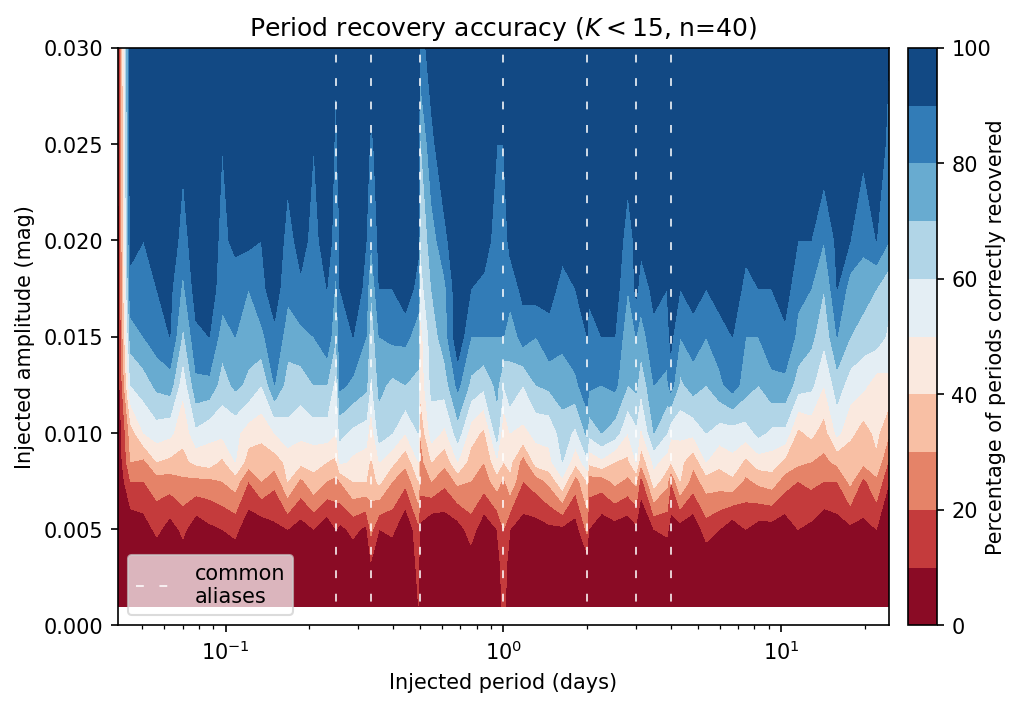

In [15]:
plt.style.use('default')

mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.top'] = False
mpl.rcParams['ytick.right'] = False


fig, ax = plt.subplots(1, figsize=(8,5), dpi=150)
plt.contourf(periods_denser, amplitudes_denser, 100*np.array(output_denser[0]).T, levels=100*np.linspace(0,1,11), cmap='RdBu')
plt.ylim(0,0.03)
plt.xlabel("Injected period (days)")
plt.ylabel("Injected amplitude (mag)")
plt.title(r"Period recovery accuracy ($K < 15$, n=40)")
plt.semilogx()
# plt.xlim(None,2.6)
cbar = plt.colorbar(pad=0.02)
cbar.set_label("Percentage of periods correctly recovered", labelpad=-2.5)

for per in extra_periods:
    plt.axvline(per, lw=0.75, ls='--', color='w', dashes=(5, 10))
    
plt.plot([0, 0], [0, 0], lw=0.75, ls='--', color='w', dashes=(5, 10), label='common\naliases')
plt.legend(loc='lower left', framealpha=0.7)
    
fig.savefig("period_recovery_grid_WSERV5.png")
fig.savefig("period_recovery_grid_WSERV5.pdf")

In [16]:
alias_scores = output_denser[3]
alias_scores = np.array(alias_scores)

np.max(alias_scores[2:,:])

0.55

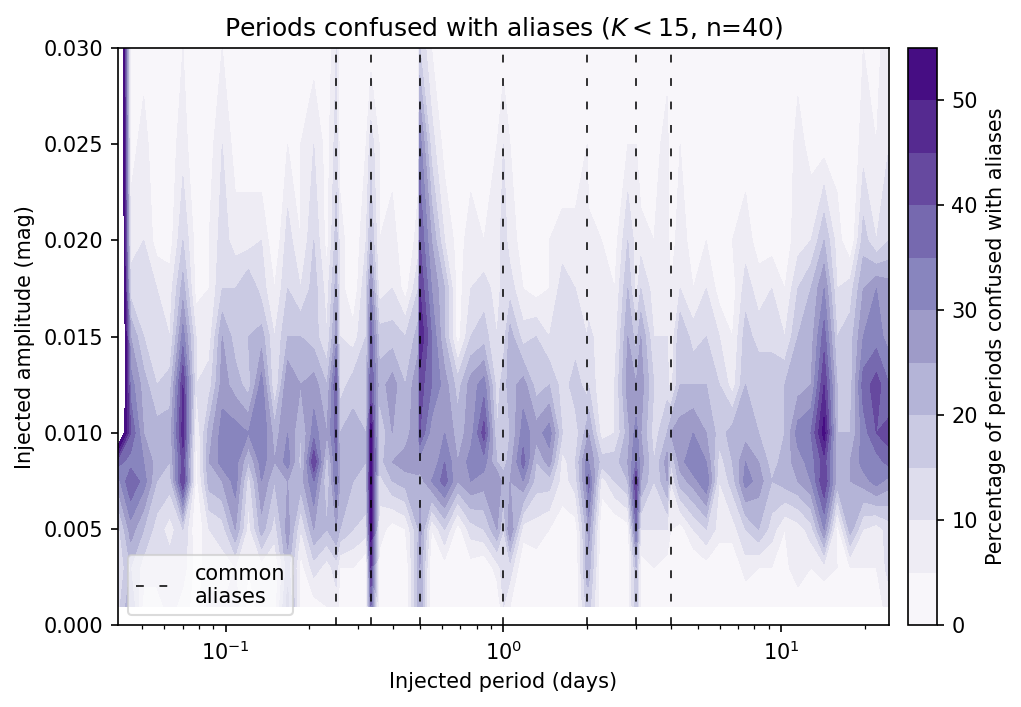

In [17]:
plt.style.use('default')

mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.top'] = False
mpl.rcParams['ytick.right'] = False

# this one is for aliases:
alias_scores = np.array(output_denser[3])
max_alias_score = np.max(alias_scores[2:,:])

fig, ax = plt.subplots(1, figsize=(8,5), dpi=150)
plt.contourf(periods_denser, amplitudes_denser, 100*np.array(output_denser[3]).T, levels=100*np.linspace(0,0.55,12), cmap='Purples')
plt.ylim(0,None)
plt.xlabel("Injected period (days)")
plt.ylabel("Injected amplitude (mag)")
plt.title(r"Periods confused with aliases ($K < 15$, n=40)")
plt.semilogx()
# plt.xlim(None,2.6)
cbar = plt.colorbar(pad=0.02)
cbar.set_label("Percentage of periods confused with aliases")

for per in extra_periods:
    plt.axvline(per, lw=0.75, ls='--', color='k', dashes=(5, 10))
    
plt.plot([0, 0], [0, 0], lw=0.75, ls='--', color='k', dashes=(5, 10), label='common\naliases')
plt.legend(loc='lower left', framealpha=0.7)

fig.savefig("period_alias_grid_WSERV5.png")
fig.savefig("period_alias_grid_WSERV5.pdf")

In [18]:
for i, output_item in enumerate(output_denser):
    np.save(f"output_denser_W5_{i}_20211010.npy", np.array(output_item))

In [19]:
output_reconstructed = []

for i, output_item in enumerate(output_denser):
    a = np.load(f"output_denser_W5_{i}_20211010.npy")
    output_reconstructed.append(a)

In [20]:
output_reconstructed[1] == np.array(output_denser[1])

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  Tr